In [39]:
# Importing important libraries
import pandas as pd
from sklearn.datasets import make_circles
from keras.models import Sequential
from tensorflow.keras.layers import Dense, GaussianNoise, Activation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define Parameters
n_samples = 100
param_noise = 0.1
param_random = 1

# Create Data
X_train, y_train = make_circles(n_samples=n_samples, 
                                noise=param_noise, 
                                random_state=param_random)

In [5]:
# Checking X_train
print(X_train.shape)

(100, 2)


In [6]:
# Checking X_train
print(y_train.shape)

(100,)


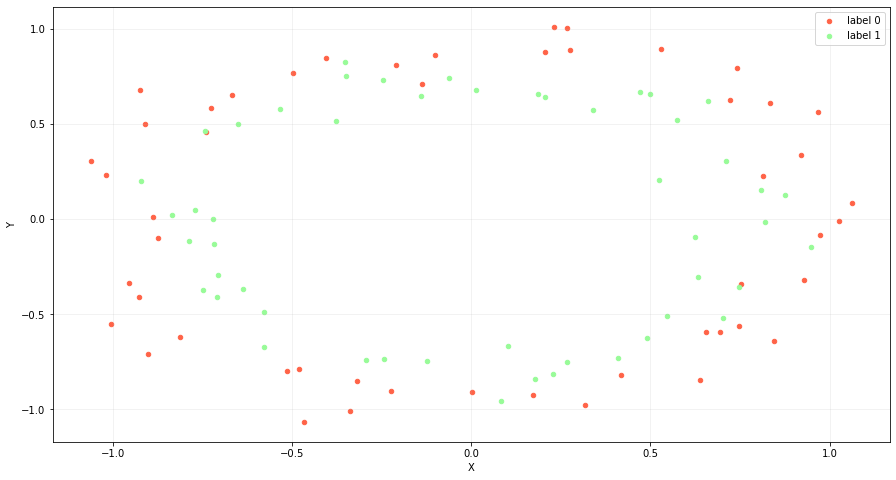

In [11]:
# Plot
# We group the data
df = pd.DataFrame(dict(X=X_train[:,0], Y=X_train[:,1], label=y_train))
colors = {0:'tomato', 1:'palegreen'}
fig, ax = plt.subplots(figsize=(15, 8))
grouped = df.groupby('label')

# For each group, we add it
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='X', y='Y', s=20, label='label ' + str(key), color=colors[key])
plt.grid(alpha=0.2)
plt.show()

In [13]:
# Percentage for test
test_perc = 0.7

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, 
                                                    test_size=test_perc, 
                                                    random_state=42)

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("")
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (30, 2)
Shape of y_train:  (30,)

Shape of X_test:  (70, 2)
Shape of y_test:  (70,)


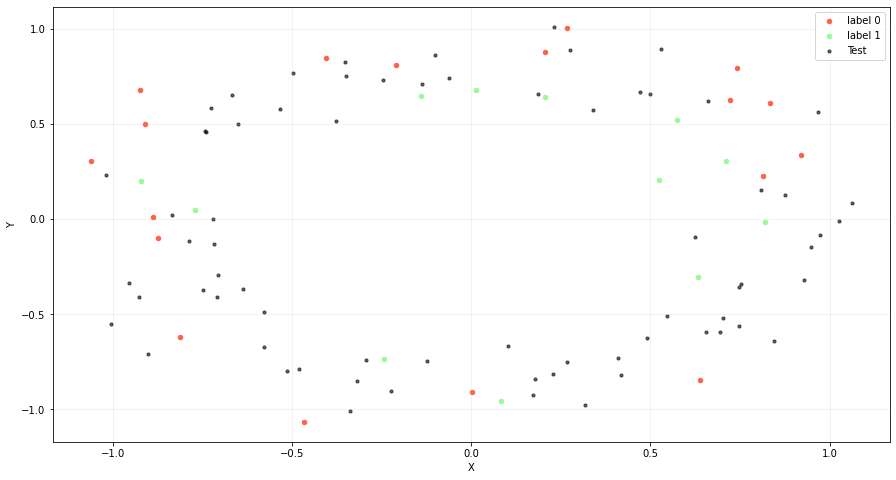

In [15]:
# Plot
# We define a dataframe to group our data into 2 classes
df = pd.DataFrame(dict(X=X_train[:,0], Y=X_train[:,1], label=y_train))
# Define color for each label
colors = {0:'tomato', 1:'palegreen'}
fig, ax = plt.subplots(figsize=(15, 8))
grouped = df.groupby('label')

# For each group, we plot it
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='X', y='Y', s=20, label='label ' + str(key), color=colors[key])

plt.scatter(X_test[:,0], X_test[:, 1], s=10, c='black', alpha=0.6, marker='o', label='Test')
plt.grid(alpha=0.2)
plt.legend()

plt.show()

In [20]:
# Training the basic MLP model
model_basic = Sequential()
model_basic.add(Dense(400, input_dim = X_train.shape[1], activation='relu'))
model_basic.add(Dense(1, activation='sigmoid'))
model_basic.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# Printing the model summary
model_basic.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 401       
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Training the model
hist_basic = model_basic.fit(X_train, y_train, 
                             validation_data=(X_test, y_test),
                             epochs=5000, 
                             verbose=1)

Epoch 1/5000
1/1 [==============================] - 0s 331ms/step - loss: 0.6996 - accuracy: 0.4667 - val_loss: 0.6917 - val_accuracy: 0.5143
Epoch 2/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.6947 - accuracy: 0.4667 - val_loss: 0.6926 - val_accuracy: 0.5286
Epoch 3/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.6901 - accuracy: 0.4667 - val_loss: 0.6937 - val_accuracy: 0.4429
Epoch 4/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.6858 - accuracy: 0.5333 - val_loss: 0.6950 - val_accuracy: 0.4571
Epoch 5/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.6817 - accuracy: 0.6000 - val_loss: 0.6964 - val_accuracy: 0.4571
Epoch 6/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.6779 - accuracy: 0.6000 - val_loss: 0.6980 - val_accuracy: 0.4571
Epoch 7/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.6743 - accuracy: 0.6000 - val_loss: 0.6996 - val_accuracy: 0.4571
Epoch 8/5000

Epoch 59/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.6006 - accuracy: 0.6667 - val_loss: 0.7467 - val_accuracy: 0.4857
Epoch 60/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.5995 - accuracy: 0.6667 - val_loss: 0.7462 - val_accuracy: 0.4857
Epoch 61/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.5984 - accuracy: 0.6667 - val_loss: 0.7457 - val_accuracy: 0.4857
Epoch 62/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.5973 - accuracy: 0.6667 - val_loss: 0.7453 - val_accuracy: 0.4857
Epoch 63/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.5962 - accuracy: 0.6667 - val_loss: 0.7448 - val_accuracy: 0.5000
Epoch 64/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.5951 - accuracy: 0.6667 - val_loss: 0.7444 - val_accuracy: 0.5000
Epoch 65/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.5940 - accuracy: 0.6667 - val_loss: 0.7439 - val_accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 26ms/step - loss: 0.5269 - accuracy: 0.6333 - val_loss: 0.7217 - val_accuracy: 0.4857
Epoch 117/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.5254 - accuracy: 0.6333 - val_loss: 0.7211 - val_accuracy: 0.4857
Epoch 118/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.5239 - accuracy: 0.6333 - val_loss: 0.7204 - val_accuracy: 0.4857
Epoch 119/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.5224 - accuracy: 0.6667 - val_loss: 0.7196 - val_accuracy: 0.4857
Epoch 120/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.5209 - accuracy: 0.6667 - val_loss: 0.7188 - val_accuracy: 0.4857
Epoch 121/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.5194 - accuracy: 0.6667 - val_loss: 0.7180 - val_accuracy: 0.4857
Epoch 122/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.5178 - accuracy: 0.6667 - val_loss: 0.7171 - val_accuracy: 0.4857
Epoch 123/5000

1/1 [==============================] - 0s 28ms/step - loss: 0.4347 - accuracy: 0.8333 - val_loss: 0.6769 - val_accuracy: 0.5571
Epoch 174/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.4331 - accuracy: 0.8333 - val_loss: 0.6761 - val_accuracy: 0.5571
Epoch 175/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4315 - accuracy: 0.8333 - val_loss: 0.6754 - val_accuracy: 0.5571
Epoch 176/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4299 - accuracy: 0.8333 - val_loss: 0.6747 - val_accuracy: 0.5571
Epoch 177/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.4283 - accuracy: 0.8333 - val_loss: 0.6741 - val_accuracy: 0.5571
Epoch 178/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.4267 - accuracy: 0.8333 - val_loss: 0.6736 - val_accuracy: 0.5571
Epoch 179/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.4252 - accuracy: 0.8333 - val_loss: 0.6730 - val_accuracy: 0.5571
Epoch 180/5000

1/1 [==============================] - 0s 31ms/step - loss: 0.3516 - accuracy: 0.8333 - val_loss: 0.6343 - val_accuracy: 0.5857
Epoch 231/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3503 - accuracy: 0.8333 - val_loss: 0.6335 - val_accuracy: 0.6000
Epoch 232/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3490 - accuracy: 0.8333 - val_loss: 0.6326 - val_accuracy: 0.6000
Epoch 233/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3478 - accuracy: 0.8333 - val_loss: 0.6319 - val_accuracy: 0.6000
Epoch 234/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3466 - accuracy: 0.8333 - val_loss: 0.6312 - val_accuracy: 0.6000
Epoch 235/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3453 - accuracy: 0.8333 - val_loss: 0.6305 - val_accuracy: 0.6000
Epoch 236/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3441 - accuracy: 0.8333 - val_loss: 0.6299 - val_accuracy: 0.6000
Epoch 237/5000

1/1 [==============================] - 0s 24ms/step - loss: 0.2887 - accuracy: 0.9000 - val_loss: 0.5964 - val_accuracy: 0.6143
Epoch 288/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2877 - accuracy: 0.9000 - val_loss: 0.5960 - val_accuracy: 0.6143
Epoch 289/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2868 - accuracy: 0.9000 - val_loss: 0.5955 - val_accuracy: 0.6286
Epoch 290/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2859 - accuracy: 0.9000 - val_loss: 0.5951 - val_accuracy: 0.6286
Epoch 291/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2850 - accuracy: 0.9000 - val_loss: 0.5946 - val_accuracy: 0.6286
Epoch 292/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2840 - accuracy: 0.9000 - val_loss: 0.5942 - val_accuracy: 0.6286
Epoch 293/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.2831 - accuracy: 0.9000 - val_loss: 0.5939 - val_accuracy: 0.6286
Epoch 294/5000

1/1 [==============================] - 0s 33ms/step - loss: 0.2425 - accuracy: 0.9333 - val_loss: 0.5783 - val_accuracy: 0.6429
Epoch 345/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2418 - accuracy: 0.9333 - val_loss: 0.5784 - val_accuracy: 0.6571
Epoch 346/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2412 - accuracy: 0.9333 - val_loss: 0.5783 - val_accuracy: 0.6571
Epoch 347/5000
1/1 [==============================] - 0s 63ms/step - loss: 0.2405 - accuracy: 0.9333 - val_loss: 0.5781 - val_accuracy: 0.6571
Epoch 348/5000
1/1 [==============================] - 0s 65ms/step - loss: 0.2398 - accuracy: 0.9333 - val_loss: 0.5776 - val_accuracy: 0.6714
Epoch 349/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.2392 - accuracy: 0.9333 - val_loss: 0.5772 - val_accuracy: 0.6714
Epoch 350/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2385 - accuracy: 0.9333 - val_loss: 0.5769 - val_accuracy: 0.6714
Epoch 351/5000

1/1 [==============================] - 0s 29ms/step - loss: 0.2095 - accuracy: 0.9667 - val_loss: 0.5761 - val_accuracy: 0.7143
Epoch 402/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2091 - accuracy: 0.9667 - val_loss: 0.5763 - val_accuracy: 0.7143
Epoch 403/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2086 - accuracy: 0.9667 - val_loss: 0.5764 - val_accuracy: 0.7143
Epoch 404/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2081 - accuracy: 0.9667 - val_loss: 0.5764 - val_accuracy: 0.7143
Epoch 405/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2076 - accuracy: 0.9667 - val_loss: 0.5765 - val_accuracy: 0.7143
Epoch 406/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2071 - accuracy: 0.9667 - val_loss: 0.5765 - val_accuracy: 0.7143
Epoch 407/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2067 - accuracy: 0.9667 - val_loss: 0.5765 - val_accuracy: 0.7143
Epoch 408/5000

1/1 [==============================] - 0s 25ms/step - loss: 0.1853 - accuracy: 0.9667 - val_loss: 0.5856 - val_accuracy: 0.7000
Epoch 459/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1849 - accuracy: 0.9667 - val_loss: 0.5860 - val_accuracy: 0.7000
Epoch 460/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.1846 - accuracy: 0.9667 - val_loss: 0.5865 - val_accuracy: 0.7000
Epoch 461/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.1842 - accuracy: 0.9667 - val_loss: 0.5871 - val_accuracy: 0.7000
Epoch 462/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1838 - accuracy: 0.9667 - val_loss: 0.5876 - val_accuracy: 0.7000
Epoch 463/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.1835 - accuracy: 0.9667 - val_loss: 0.5880 - val_accuracy: 0.7000
Epoch 464/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.1831 - accuracy: 0.9667 - val_loss: 0.5883 - val_accuracy: 0.7000
Epoch 465/5000

1/1 [==============================] - 0s 34ms/step - loss: 0.1666 - accuracy: 0.9667 - val_loss: 0.6053 - val_accuracy: 0.7143
Epoch 516/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.1663 - accuracy: 0.9667 - val_loss: 0.6059 - val_accuracy: 0.7143
Epoch 517/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.1660 - accuracy: 0.9667 - val_loss: 0.6065 - val_accuracy: 0.7143
Epoch 518/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.1657 - accuracy: 0.9667 - val_loss: 0.6073 - val_accuracy: 0.7143
Epoch 519/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.1655 - accuracy: 0.9667 - val_loss: 0.6079 - val_accuracy: 0.7143
Epoch 520/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1652 - accuracy: 0.9667 - val_loss: 0.6084 - val_accuracy: 0.7143
Epoch 521/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1649 - accuracy: 0.9667 - val_loss: 0.6089 - val_accuracy: 0.7143
Epoch 522/5000

1/1 [==============================] - 0s 25ms/step - loss: 0.1517 - accuracy: 0.9667 - val_loss: 0.6355 - val_accuracy: 0.7000
Epoch 573/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.1515 - accuracy: 0.9667 - val_loss: 0.6361 - val_accuracy: 0.7000
Epoch 574/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1512 - accuracy: 0.9667 - val_loss: 0.6368 - val_accuracy: 0.7000
Epoch 575/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.1510 - accuracy: 0.9667 - val_loss: 0.6374 - val_accuracy: 0.7000
Epoch 576/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.1508 - accuracy: 0.9667 - val_loss: 0.6380 - val_accuracy: 0.7000
Epoch 577/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.1505 - accuracy: 0.9667 - val_loss: 0.6386 - val_accuracy: 0.7000
Epoch 578/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.1503 - accuracy: 0.9667 - val_loss: 0.6393 - val_accuracy: 0.7000
Epoch 579/5000

1/1 [==============================] - 0s 28ms/step - loss: 0.1395 - accuracy: 0.9667 - val_loss: 0.6731 - val_accuracy: 0.7000
Epoch 630/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.1393 - accuracy: 0.9667 - val_loss: 0.6739 - val_accuracy: 0.7000
Epoch 631/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.1391 - accuracy: 0.9667 - val_loss: 0.6747 - val_accuracy: 0.7000
Epoch 632/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1389 - accuracy: 0.9667 - val_loss: 0.6754 - val_accuracy: 0.7000
Epoch 633/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1387 - accuracy: 0.9667 - val_loss: 0.6760 - val_accuracy: 0.7000
Epoch 634/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1386 - accuracy: 0.9667 - val_loss: 0.6764 - val_accuracy: 0.7000
Epoch 635/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.1383 - accuracy: 0.9667 - val_loss: 0.6770 - val_accuracy: 0.7000
Epoch 636/500

1/1 [==============================] - 0s 32ms/step - loss: 0.1293 - accuracy: 0.9667 - val_loss: 0.7169 - val_accuracy: 0.6857
Epoch 687/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.1291 - accuracy: 0.9667 - val_loss: 0.7181 - val_accuracy: 0.6857
Epoch 688/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.1290 - accuracy: 0.9667 - val_loss: 0.7191 - val_accuracy: 0.6857
Epoch 689/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.1288 - accuracy: 0.9667 - val_loss: 0.7199 - val_accuracy: 0.6857
Epoch 690/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.1287 - accuracy: 0.9667 - val_loss: 0.7206 - val_accuracy: 0.6857
Epoch 691/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1285 - accuracy: 0.9667 - val_loss: 0.7210 - val_accuracy: 0.6857
Epoch 692/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.1283 - accuracy: 0.9667 - val_loss: 0.7213 - val_accuracy: 0.6857
Epoch 693/5000

1/1 [==============================] - 0s 30ms/step - loss: 0.1207 - accuracy: 0.9667 - val_loss: 0.7654 - val_accuracy: 0.6857
Epoch 744/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1205 - accuracy: 0.9667 - val_loss: 0.7665 - val_accuracy: 0.6857
Epoch 745/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.1204 - accuracy: 0.9667 - val_loss: 0.7675 - val_accuracy: 0.6857
Epoch 746/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.1202 - accuracy: 0.9667 - val_loss: 0.7683 - val_accuracy: 0.6857
Epoch 747/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1201 - accuracy: 0.9667 - val_loss: 0.7691 - val_accuracy: 0.6857
Epoch 748/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.1200 - accuracy: 0.9667 - val_loss: 0.7698 - val_accuracy: 0.6857
Epoch 749/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1198 - accuracy: 0.9667 - val_loss: 0.7707 - val_accuracy: 0.6857
Epoch 750/5000

1/1 [==============================] - 0s 27ms/step - loss: 0.1132 - accuracy: 0.9667 - val_loss: 0.8169 - val_accuracy: 0.6714
Epoch 801/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1130 - accuracy: 0.9667 - val_loss: 0.8180 - val_accuracy: 0.6714
Epoch 802/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1129 - accuracy: 0.9667 - val_loss: 0.8189 - val_accuracy: 0.6714
Epoch 803/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.1128 - accuracy: 0.9667 - val_loss: 0.8200 - val_accuracy: 0.6714
Epoch 804/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.1127 - accuracy: 0.9667 - val_loss: 0.8211 - val_accuracy: 0.6714
Epoch 805/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1126 - accuracy: 0.9667 - val_loss: 0.8222 - val_accuracy: 0.6714
Epoch 806/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1124 - accuracy: 0.9667 - val_loss: 0.8231 - val_accuracy: 0.6714
Epoch 807/5000

1/1 [==============================] - 0s 30ms/step - loss: 0.1067 - accuracy: 0.9667 - val_loss: 0.8730 - val_accuracy: 0.6714
Epoch 858/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.1066 - accuracy: 0.9667 - val_loss: 0.8735 - val_accuracy: 0.6714
Epoch 859/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1064 - accuracy: 0.9667 - val_loss: 0.8743 - val_accuracy: 0.6714
Epoch 860/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.1063 - accuracy: 0.9667 - val_loss: 0.8754 - val_accuracy: 0.6714
Epoch 861/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.1062 - accuracy: 0.9667 - val_loss: 0.8766 - val_accuracy: 0.6714
Epoch 862/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1061 - accuracy: 0.9667 - val_loss: 0.8777 - val_accuracy: 0.6714
Epoch 863/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1060 - accuracy: 0.9667 - val_loss: 0.8788 - val_accuracy: 0.6714
Epoch 864/5000

1/1 [==============================] - 0s 46ms/step - loss: 0.1009 - accuracy: 0.9667 - val_loss: 0.9301 - val_accuracy: 0.6714
Epoch 915/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1008 - accuracy: 0.9667 - val_loss: 0.9312 - val_accuracy: 0.6714
Epoch 916/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.1007 - accuracy: 0.9667 - val_loss: 0.9323 - val_accuracy: 0.6714
Epoch 917/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1006 - accuracy: 0.9667 - val_loss: 0.9333 - val_accuracy: 0.6714
Epoch 918/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1005 - accuracy: 0.9667 - val_loss: 0.9344 - val_accuracy: 0.6714
Epoch 919/5000
1/1 [==============================] - ETA: 0s - loss: 0.1005 - accuracy: 0.96 - 0s 30ms/step - loss: 0.1005 - accuracy: 0.9667 - val_loss: 0.9354 - val_accuracy: 0.6714
Epoch 920/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1004 - accuracy: 0.9667 - val_loss: 0.

Epoch 971/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0958 - accuracy: 0.9667 - val_loss: 0.9889 - val_accuracy: 0.6714
Epoch 972/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0958 - accuracy: 0.9667 - val_loss: 0.9900 - val_accuracy: 0.6714
Epoch 973/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0957 - accuracy: 0.9667 - val_loss: 0.9910 - val_accuracy: 0.6714
Epoch 974/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0956 - accuracy: 0.9667 - val_loss: 0.9921 - val_accuracy: 0.6714
Epoch 975/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0955 - accuracy: 0.9667 - val_loss: 0.9931 - val_accuracy: 0.6714
Epoch 976/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0954 - accuracy: 0.9667 - val_loss: 0.9941 - val_accuracy: 0.6714
Epoch 977/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0953 - accuracy: 0.9667 - val_loss: 0.9951 - val_accuracy: 0.6714

1/1 [==============================] - 0s 31ms/step - loss: 0.0913 - accuracy: 0.9667 - val_loss: 1.0496 - val_accuracy: 0.6571
Epoch 1029/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0913 - accuracy: 0.9667 - val_loss: 1.0512 - val_accuracy: 0.6571
Epoch 1030/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0912 - accuracy: 0.9667 - val_loss: 1.0527 - val_accuracy: 0.6571
Epoch 1031/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0911 - accuracy: 0.9667 - val_loss: 1.0541 - val_accuracy: 0.6571
Epoch 1032/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0910 - accuracy: 0.9667 - val_loss: 1.0552 - val_accuracy: 0.6571
Epoch 1033/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0910 - accuracy: 0.9667 - val_loss: 1.0562 - val_accuracy: 0.6571
Epoch 1034/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0909 - accuracy: 0.9667 - val_loss: 1.0574 - val_accuracy: 0.6571
Epoch 10

1/1 [==============================] - 0s 28ms/step - loss: 0.0874 - accuracy: 0.9667 - val_loss: 1.1136 - val_accuracy: 0.6429
Epoch 1086/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0873 - accuracy: 0.9667 - val_loss: 1.1152 - val_accuracy: 0.6429
Epoch 1087/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0873 - accuracy: 0.9667 - val_loss: 1.1165 - val_accuracy: 0.6429
Epoch 1088/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0872 - accuracy: 0.9667 - val_loss: 1.1176 - val_accuracy: 0.6429
Epoch 1089/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0871 - accuracy: 0.9667 - val_loss: 1.1182 - val_accuracy: 0.6429
Epoch 1090/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0871 - accuracy: 0.9667 - val_loss: 1.1189 - val_accuracy: 0.6429
Epoch 1091/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0870 - accuracy: 0.9667 - val_loss: 1.1197 - val_accuracy: 0.6429
Epoch 10

1/1 [==============================] - 0s 24ms/step - loss: 0.0839 - accuracy: 0.9667 - val_loss: 1.1766 - val_accuracy: 0.6429
Epoch 1143/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0839 - accuracy: 0.9667 - val_loss: 1.1778 - val_accuracy: 0.6429
Epoch 1144/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0838 - accuracy: 0.9667 - val_loss: 1.1789 - val_accuracy: 0.6429
Epoch 1145/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0838 - accuracy: 0.9667 - val_loss: 1.1796 - val_accuracy: 0.6429
Epoch 1146/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0837 - accuracy: 0.9667 - val_loss: 1.1805 - val_accuracy: 0.6429
Epoch 1147/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0837 - accuracy: 0.9667 - val_loss: 1.1815 - val_accuracy: 0.6429
Epoch 1148/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0836 - accuracy: 0.9667 - val_loss: 1.1827 - val_accuracy: 0.6429
Epoch 11

1/1 [==============================] - 0s 24ms/step - loss: 0.0810 - accuracy: 0.9667 - val_loss: 1.2385 - val_accuracy: 0.6286
Epoch 1199/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0809 - accuracy: 0.9667 - val_loss: 1.2396 - val_accuracy: 0.6286
Epoch 1200/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0809 - accuracy: 0.9667 - val_loss: 1.2408 - val_accuracy: 0.6286
Epoch 1201/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0808 - accuracy: 0.9667 - val_loss: 1.2420 - val_accuracy: 0.6286
Epoch 1202/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0808 - accuracy: 0.9667 - val_loss: 1.2434 - val_accuracy: 0.6286
Epoch 1203/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0807 - accuracy: 0.9667 - val_loss: 1.2444 - val_accuracy: 0.6286
Epoch 1204/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0807 - accuracy: 0.9667 - val_loss: 1.2453 - val_accuracy: 0.6286
Epoch 12

1/1 [==============================] - 0s 32ms/step - loss: 0.0783 - accuracy: 0.9667 - val_loss: 1.3005 - val_accuracy: 0.6286
Epoch 1256/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0782 - accuracy: 0.9667 - val_loss: 1.3018 - val_accuracy: 0.6286
Epoch 1257/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0782 - accuracy: 0.9667 - val_loss: 1.3030 - val_accuracy: 0.6286
Epoch 1258/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0782 - accuracy: 0.9667 - val_loss: 1.3041 - val_accuracy: 0.6286
Epoch 1259/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0781 - accuracy: 0.9667 - val_loss: 1.3049 - val_accuracy: 0.6286
Epoch 1260/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0781 - accuracy: 0.9667 - val_loss: 1.3056 - val_accuracy: 0.6286
Epoch 1261/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0780 - accuracy: 0.9667 - val_loss: 1.3062 - val_accuracy: 0.6286
Epoch 12

1/1 [==============================] - 0s 30ms/step - loss: 0.0759 - accuracy: 0.9667 - val_loss: 1.3624 - val_accuracy: 0.6286
Epoch 1313/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0759 - accuracy: 0.9667 - val_loss: 1.3636 - val_accuracy: 0.6286
Epoch 1314/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0758 - accuracy: 0.9667 - val_loss: 1.3646 - val_accuracy: 0.6286
Epoch 1315/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0758 - accuracy: 0.9667 - val_loss: 1.3656 - val_accuracy: 0.6286
Epoch 1316/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0758 - accuracy: 0.9667 - val_loss: 1.3668 - val_accuracy: 0.6286
Epoch 1317/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.0757 - accuracy: 0.9667 - val_loss: 1.3679 - val_accuracy: 0.6286
Epoch 1318/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0757 - accuracy: 0.9667 - val_loss: 1.3689 - val_accuracy: 0.6286
Epoch 13

Epoch 1369/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0738 - accuracy: 0.9667 - val_loss: 1.4209 - val_accuracy: 0.6286
Epoch 1370/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0737 - accuracy: 0.9667 - val_loss: 1.4220 - val_accuracy: 0.6286
Epoch 1371/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0737 - accuracy: 0.9667 - val_loss: 1.4229 - val_accuracy: 0.6286
Epoch 1372/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0737 - accuracy: 0.9667 - val_loss: 1.4238 - val_accuracy: 0.6286
Epoch 1373/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0736 - accuracy: 0.9667 - val_loss: 1.4245 - val_accuracy: 0.6286
Epoch 1374/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0736 - accuracy: 0.9667 - val_loss: 1.4251 - val_accuracy: 0.6286
Epoch 1375/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0736 - accuracy: 0.9667 - val_loss: 1.4258 - val_accuracy:

Epoch 1426/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0719 - accuracy: 0.9667 - val_loss: 1.4786 - val_accuracy: 0.6286
Epoch 1427/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0718 - accuracy: 0.9667 - val_loss: 1.4796 - val_accuracy: 0.6286
Epoch 1428/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0718 - accuracy: 0.9667 - val_loss: 1.4808 - val_accuracy: 0.6286
Epoch 1429/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0718 - accuracy: 0.9667 - val_loss: 1.4821 - val_accuracy: 0.6286
Epoch 1430/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0717 - accuracy: 0.9667 - val_loss: 1.4834 - val_accuracy: 0.6286
Epoch 1431/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0717 - accuracy: 0.9667 - val_loss: 1.4846 - val_accuracy: 0.6286
Epoch 1432/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0717 - accuracy: 0.9667 - val_loss: 1.4856 - val_accuracy:

1/1 [==============================] - 0s 29ms/step - loss: 0.0701 - accuracy: 0.9667 - val_loss: 1.5352 - val_accuracy: 0.6286
Epoch 1483/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0701 - accuracy: 0.9667 - val_loss: 1.5361 - val_accuracy: 0.6286
Epoch 1484/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0700 - accuracy: 0.9667 - val_loss: 1.5370 - val_accuracy: 0.6286
Epoch 1485/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0700 - accuracy: 0.9667 - val_loss: 1.5379 - val_accuracy: 0.6286
Epoch 1486/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0700 - accuracy: 0.9667 - val_loss: 1.5388 - val_accuracy: 0.6286
Epoch 1487/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0700 - accuracy: 0.9667 - val_loss: 1.5397 - val_accuracy: 0.6286
Epoch 1488/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0699 - accuracy: 0.9667 - val_loss: 1.5406 - val_accuracy: 0.6286
Epoch 14

1/1 [==============================] - 0s 26ms/step - loss: 0.0684 - accuracy: 0.9667 - val_loss: 1.5899 - val_accuracy: 0.6000
Epoch 1540/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0684 - accuracy: 0.9667 - val_loss: 1.5910 - val_accuracy: 0.6000
Epoch 1541/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0684 - accuracy: 0.9667 - val_loss: 1.5922 - val_accuracy: 0.6000
Epoch 1542/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0684 - accuracy: 0.9667 - val_loss: 1.5933 - val_accuracy: 0.6000
Epoch 1543/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0683 - accuracy: 0.9667 - val_loss: 1.5944 - val_accuracy: 0.6000
Epoch 1544/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0683 - accuracy: 0.9667 - val_loss: 1.5954 - val_accuracy: 0.6000
Epoch 1545/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0683 - accuracy: 0.9667 - val_loss: 1.5963 - val_accuracy: 0.6000
Epoch 15

1/1 [==============================] - 0s 27ms/step - loss: 0.0669 - accuracy: 0.9667 - val_loss: 1.6411 - val_accuracy: 0.6000
Epoch 1597/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0669 - accuracy: 0.9667 - val_loss: 1.6420 - val_accuracy: 0.6000
Epoch 1598/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0668 - accuracy: 0.9667 - val_loss: 1.6427 - val_accuracy: 0.6000
Epoch 1599/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0668 - accuracy: 0.9667 - val_loss: 1.6434 - val_accuracy: 0.6000
Epoch 1600/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0668 - accuracy: 0.9667 - val_loss: 1.6439 - val_accuracy: 0.6000
Epoch 1601/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0668 - accuracy: 0.9667 - val_loss: 1.6443 - val_accuracy: 0.6000
Epoch 1602/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0667 - accuracy: 0.9667 - val_loss: 1.6449 - val_accuracy: 0.6000
Epoch 16

1/1 [==============================] - 0s 26ms/step - loss: 0.0654 - accuracy: 0.9667 - val_loss: 1.6915 - val_accuracy: 0.6000
Epoch 1654/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0654 - accuracy: 0.9667 - val_loss: 1.6926 - val_accuracy: 0.6000
Epoch 1655/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0654 - accuracy: 0.9667 - val_loss: 1.6934 - val_accuracy: 0.6000
Epoch 1656/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0653 - accuracy: 0.9667 - val_loss: 1.6941 - val_accuracy: 0.6000
Epoch 1657/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0653 - accuracy: 0.9667 - val_loss: 1.6949 - val_accuracy: 0.6000
Epoch 1658/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0653 - accuracy: 0.9667 - val_loss: 1.6959 - val_accuracy: 0.6000
Epoch 1659/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0653 - accuracy: 0.9667 - val_loss: 1.6971 - val_accuracy: 0.6000
Epoch 16

1/1 [==============================] - 0s 28ms/step - loss: 0.0640 - accuracy: 0.9667 - val_loss: 1.7404 - val_accuracy: 0.6000
Epoch 1711/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0640 - accuracy: 0.9667 - val_loss: 1.7410 - val_accuracy: 0.6000
Epoch 1712/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0639 - accuracy: 0.9667 - val_loss: 1.7416 - val_accuracy: 0.6000
Epoch 1713/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0639 - accuracy: 0.9667 - val_loss: 1.7422 - val_accuracy: 0.6000
Epoch 1714/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0639 - accuracy: 0.9667 - val_loss: 1.7429 - val_accuracy: 0.6000
Epoch 1715/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0639 - accuracy: 0.9667 - val_loss: 1.7441 - val_accuracy: 0.6000
Epoch 1716/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0638 - accuracy: 0.9667 - val_loss: 1.7453 - val_accuracy: 0.6000
Epoch 17

1/1 [==============================] - 0s 25ms/step - loss: 0.0626 - accuracy: 0.9667 - val_loss: 1.7887 - val_accuracy: 0.6000
Epoch 1768/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0626 - accuracy: 0.9667 - val_loss: 1.7895 - val_accuracy: 0.6000
Epoch 1769/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0626 - accuracy: 0.9667 - val_loss: 1.7903 - val_accuracy: 0.6000
Epoch 1770/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0626 - accuracy: 0.9667 - val_loss: 1.7911 - val_accuracy: 0.6000
Epoch 1771/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0625 - accuracy: 0.9667 - val_loss: 1.7918 - val_accuracy: 0.6000
Epoch 1772/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0625 - accuracy: 0.9667 - val_loss: 1.7927 - val_accuracy: 0.6000
Epoch 1773/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0625 - accuracy: 0.9667 - val_loss: 1.7938 - val_accuracy: 0.6000
Epoch 17

1/1 [==============================] - 0s 25ms/step - loss: 0.0613 - accuracy: 0.9667 - val_loss: 1.8372 - val_accuracy: 0.6000
Epoch 1825/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0613 - accuracy: 0.9667 - val_loss: 1.8377 - val_accuracy: 0.6000
Epoch 1826/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0613 - accuracy: 0.9667 - val_loss: 1.8383 - val_accuracy: 0.6000
Epoch 1827/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0612 - accuracy: 0.9667 - val_loss: 1.8390 - val_accuracy: 0.6000
Epoch 1828/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0612 - accuracy: 0.9667 - val_loss: 1.8397 - val_accuracy: 0.6000
Epoch 1829/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0612 - accuracy: 0.9667 - val_loss: 1.8407 - val_accuracy: 0.6000
Epoch 1830/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0612 - accuracy: 0.9667 - val_loss: 1.8418 - val_accuracy: 0.6000
Epoch 18

1/1 [==============================] - 0s 26ms/step - loss: 0.0600 - accuracy: 0.9667 - val_loss: 1.8794 - val_accuracy: 0.6000
Epoch 1882/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0600 - accuracy: 0.9667 - val_loss: 1.8804 - val_accuracy: 0.6000
Epoch 1883/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0600 - accuracy: 0.9667 - val_loss: 1.8814 - val_accuracy: 0.6000
Epoch 1884/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0600 - accuracy: 0.9667 - val_loss: 1.8825 - val_accuracy: 0.6000
Epoch 1885/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0599 - accuracy: 0.9667 - val_loss: 1.8835 - val_accuracy: 0.6000
Epoch 1886/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0599 - accuracy: 0.9667 - val_loss: 1.8844 - val_accuracy: 0.6000
Epoch 1887/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0599 - accuracy: 0.9667 - val_loss: 1.8849 - val_accuracy: 0.6000
Epoch 18

Epoch 1938/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0588 - accuracy: 0.9667 - val_loss: 1.9240 - val_accuracy: 0.6000
Epoch 1939/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0587 - accuracy: 0.9667 - val_loss: 1.9246 - val_accuracy: 0.6000
Epoch 1940/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0587 - accuracy: 0.9667 - val_loss: 1.9252 - val_accuracy: 0.6000
Epoch 1941/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0587 - accuracy: 0.9667 - val_loss: 1.9256 - val_accuracy: 0.6000
Epoch 1942/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0587 - accuracy: 0.9667 - val_loss: 1.9259 - val_accuracy: 0.6000
Epoch 1943/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0587 - accuracy: 0.9667 - val_loss: 1.9264 - val_accuracy: 0.6000
Epoch 1944/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.0587 - accuracy: 0.9667 - val_loss: 1.9272 - val_accuracy:

Epoch 1995/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0575 - accuracy: 0.9667 - val_loss: 1.9660 - val_accuracy: 0.6143
Epoch 1996/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0575 - accuracy: 0.9667 - val_loss: 1.9670 - val_accuracy: 0.6143
Epoch 1997/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0575 - accuracy: 0.9667 - val_loss: 1.9679 - val_accuracy: 0.6143
Epoch 1998/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0575 - accuracy: 0.9667 - val_loss: 1.9688 - val_accuracy: 0.6143
Epoch 1999/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0575 - accuracy: 0.9667 - val_loss: 1.9697 - val_accuracy: 0.6143
Epoch 2000/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0574 - accuracy: 0.9667 - val_loss: 1.9706 - val_accuracy: 0.6143
Epoch 2001/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0574 - accuracy: 0.9667 - val_loss: 1.9713 - val_accuracy:

Epoch 2052/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0563 - accuracy: 0.9667 - val_loss: 2.0097 - val_accuracy: 0.6143
Epoch 2053/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0563 - accuracy: 0.9667 - val_loss: 2.0104 - val_accuracy: 0.6143
Epoch 2054/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0563 - accuracy: 0.9667 - val_loss: 2.0110 - val_accuracy: 0.6143
Epoch 2055/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0563 - accuracy: 0.9667 - val_loss: 2.0116 - val_accuracy: 0.6143
Epoch 2056/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0562 - accuracy: 0.9667 - val_loss: 2.0122 - val_accuracy: 0.6143
Epoch 2057/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0562 - accuracy: 0.9667 - val_loss: 2.0127 - val_accuracy: 0.6143
Epoch 2058/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0562 - accuracy: 0.9667 - val_loss: 2.0133 - val_accuracy:

Epoch 2109/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0551 - accuracy: 0.9667 - val_loss: 2.0483 - val_accuracy: 0.6143
Epoch 2110/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0551 - accuracy: 0.9667 - val_loss: 2.0492 - val_accuracy: 0.6143
Epoch 2111/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0551 - accuracy: 0.9667 - val_loss: 2.0501 - val_accuracy: 0.6143
Epoch 2112/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0550 - accuracy: 0.9667 - val_loss: 2.0510 - val_accuracy: 0.6143
Epoch 2113/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0550 - accuracy: 0.9667 - val_loss: 2.0518 - val_accuracy: 0.6143
Epoch 2114/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0550 - accuracy: 0.9667 - val_loss: 2.0524 - val_accuracy: 0.6143
Epoch 2115/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0550 - accuracy: 0.9667 - val_loss: 2.0531 - val_accuracy:

Epoch 2166/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0539 - accuracy: 0.9667 - val_loss: 2.0911 - val_accuracy: 0.6143
Epoch 2167/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0538 - accuracy: 0.9667 - val_loss: 2.0917 - val_accuracy: 0.6143
Epoch 2168/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0538 - accuracy: 0.9667 - val_loss: 2.0923 - val_accuracy: 0.6143
Epoch 2169/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0538 - accuracy: 0.9667 - val_loss: 2.0930 - val_accuracy: 0.6143
Epoch 2170/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0538 - accuracy: 0.9667 - val_loss: 2.0937 - val_accuracy: 0.6143
Epoch 2171/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0538 - accuracy: 0.9667 - val_loss: 2.0943 - val_accuracy: 0.6143
Epoch 2172/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0537 - accuracy: 0.9667 - val_loss: 2.0949 - val_accuracy:

Epoch 2223/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0526 - accuracy: 0.9667 - val_loss: 2.1307 - val_accuracy: 0.6143
Epoch 2224/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0526 - accuracy: 0.9667 - val_loss: 2.1316 - val_accuracy: 0.6143
Epoch 2225/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0526 - accuracy: 0.9667 - val_loss: 2.1324 - val_accuracy: 0.6143
Epoch 2226/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0525 - accuracy: 0.9667 - val_loss: 2.1333 - val_accuracy: 0.6143
Epoch 2227/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0525 - accuracy: 0.9667 - val_loss: 2.1341 - val_accuracy: 0.6143
Epoch 2228/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0525 - accuracy: 0.9667 - val_loss: 2.1347 - val_accuracy: 0.6143
Epoch 2229/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0525 - accuracy: 0.9667 - val_loss: 2.1353 - val_accuracy:

Epoch 2280/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0513 - accuracy: 0.9667 - val_loss: 2.1690 - val_accuracy: 0.6143
Epoch 2281/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0513 - accuracy: 0.9667 - val_loss: 2.1699 - val_accuracy: 0.6143
Epoch 2282/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0513 - accuracy: 0.9667 - val_loss: 2.1706 - val_accuracy: 0.6143
Epoch 2283/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0512 - accuracy: 0.9667 - val_loss: 2.1710 - val_accuracy: 0.6143
Epoch 2284/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0512 - accuracy: 0.9667 - val_loss: 2.1714 - val_accuracy: 0.6143
Epoch 2285/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0512 - accuracy: 0.9667 - val_loss: 2.1719 - val_accuracy: 0.6143
Epoch 2286/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0512 - accuracy: 0.9667 - val_loss: 2.1724 - val_accuracy:

Epoch 2337/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0500 - accuracy: 0.9667 - val_loss: 2.2021 - val_accuracy: 0.6143
Epoch 2338/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0500 - accuracy: 0.9667 - val_loss: 2.2024 - val_accuracy: 0.6143
Epoch 2339/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0500 - accuracy: 0.9667 - val_loss: 2.2029 - val_accuracy: 0.6143
Epoch 2340/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0499 - accuracy: 0.9667 - val_loss: 2.2033 - val_accuracy: 0.6143
Epoch 2341/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0499 - accuracy: 0.9667 - val_loss: 2.2036 - val_accuracy: 0.6143
Epoch 2342/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0499 - accuracy: 0.9667 - val_loss: 2.2043 - val_accuracy: 0.6143
Epoch 2343/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0499 - accuracy: 0.9667 - val_loss: 2.2051 - val_accuracy:

1/1 [==============================] - 0s 29ms/step - loss: 0.0487 - accuracy: 0.9667 - val_loss: 2.2396 - val_accuracy: 0.6143
Epoch 2394/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0486 - accuracy: 0.9667 - val_loss: 2.2399 - val_accuracy: 0.6143
Epoch 2395/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0486 - accuracy: 0.9667 - val_loss: 2.2403 - val_accuracy: 0.6143
Epoch 2396/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0486 - accuracy: 0.9667 - val_loss: 2.2406 - val_accuracy: 0.6143
Epoch 2397/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0486 - accuracy: 0.9667 - val_loss: 2.2409 - val_accuracy: 0.6143
Epoch 2398/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0485 - accuracy: 0.9667 - val_loss: 2.2416 - val_accuracy: 0.6143
Epoch 2399/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0485 - accuracy: 0.9667 - val_loss: 2.2424 - val_accuracy: 0.6143
Epoch 24

1/1 [==============================] - 0s 26ms/step - loss: 0.0473 - accuracy: 1.0000 - val_loss: 2.2733 - val_accuracy: 0.6143
Epoch 2451/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 2.2737 - val_accuracy: 0.6143
Epoch 2452/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 2.2743 - val_accuracy: 0.6143
Epoch 2453/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 2.2752 - val_accuracy: 0.6143
Epoch 2454/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 2.2760 - val_accuracy: 0.6143
Epoch 2455/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0471 - accuracy: 1.0000 - val_loss: 2.2767 - val_accuracy: 0.6143
Epoch 2456/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0471 - accuracy: 1.0000 - val_loss: 2.2774 - val_accuracy: 0.6143
Epoch 24

Epoch 2507/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0458 - accuracy: 1.0000 - val_loss: 2.3156 - val_accuracy: 0.6286
Epoch 2508/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0458 - accuracy: 1.0000 - val_loss: 2.3160 - val_accuracy: 0.6286
Epoch 2509/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0458 - accuracy: 1.0000 - val_loss: 2.3167 - val_accuracy: 0.6286
Epoch 2510/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0458 - accuracy: 1.0000 - val_loss: 2.3173 - val_accuracy: 0.6286
Epoch 2511/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0457 - accuracy: 1.0000 - val_loss: 2.3178 - val_accuracy: 0.6286
Epoch 2512/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0457 - accuracy: 1.0000 - val_loss: 2.3185 - val_accuracy: 0.6286
Epoch 2513/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0457 - accuracy: 1.0000 - val_loss: 2.3190 - val_accuracy:

Epoch 2564/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0444 - accuracy: 1.0000 - val_loss: 2.3477 - val_accuracy: 0.6286
Epoch 2565/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0444 - accuracy: 1.0000 - val_loss: 2.3483 - val_accuracy: 0.6286
Epoch 2566/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0443 - accuracy: 1.0000 - val_loss: 2.3489 - val_accuracy: 0.6286
Epoch 2567/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0443 - accuracy: 1.0000 - val_loss: 2.3495 - val_accuracy: 0.6286
Epoch 2568/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0443 - accuracy: 1.0000 - val_loss: 2.3501 - val_accuracy: 0.6286
Epoch 2569/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0443 - accuracy: 1.0000 - val_loss: 2.3505 - val_accuracy: 0.6286
Epoch 2570/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0442 - accuracy: 1.0000 - val_loss: 2.3510 - val_accuracy:

1/1 [==============================] - 0s 31ms/step - loss: 0.0430 - accuracy: 1.0000 - val_loss: 2.3833 - val_accuracy: 0.6286
Epoch 2621/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0429 - accuracy: 1.0000 - val_loss: 2.3837 - val_accuracy: 0.6286
Epoch 2622/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0429 - accuracy: 1.0000 - val_loss: 2.3842 - val_accuracy: 0.6286
Epoch 2623/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0429 - accuracy: 1.0000 - val_loss: 2.3846 - val_accuracy: 0.6286
Epoch 2624/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0429 - accuracy: 1.0000 - val_loss: 2.3852 - val_accuracy: 0.6286
Epoch 2625/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0428 - accuracy: 1.0000 - val_loss: 2.3857 - val_accuracy: 0.6286
Epoch 2626/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0428 - accuracy: 1.0000 - val_loss: 2.3863 - val_accuracy: 0.6286
Epoch 26

1/1 [==============================] - 0s 26ms/step - loss: 0.0415 - accuracy: 1.0000 - val_loss: 2.4180 - val_accuracy: 0.6000
Epoch 2678/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0415 - accuracy: 1.0000 - val_loss: 2.4186 - val_accuracy: 0.6000
Epoch 2679/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0414 - accuracy: 1.0000 - val_loss: 2.4196 - val_accuracy: 0.6000
Epoch 2680/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0414 - accuracy: 1.0000 - val_loss: 2.4206 - val_accuracy: 0.6000
Epoch 2681/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0414 - accuracy: 1.0000 - val_loss: 2.4216 - val_accuracy: 0.6000
Epoch 2682/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0413 - accuracy: 1.0000 - val_loss: 2.4224 - val_accuracy: 0.6000
Epoch 2683/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0413 - accuracy: 1.0000 - val_loss: 2.4232 - val_accuracy: 0.6000
Epoch 26

Epoch 2734/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0400 - accuracy: 1.0000 - val_loss: 2.4523 - val_accuracy: 0.5857
Epoch 2735/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0400 - accuracy: 1.0000 - val_loss: 2.4527 - val_accuracy: 0.5857
Epoch 2736/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0400 - accuracy: 1.0000 - val_loss: 2.4534 - val_accuracy: 0.5857
Epoch 2737/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0399 - accuracy: 1.0000 - val_loss: 2.4539 - val_accuracy: 0.5857
Epoch 2738/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0399 - accuracy: 1.0000 - val_loss: 2.4544 - val_accuracy: 0.5857
Epoch 2739/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0399 - accuracy: 1.0000 - val_loss: 2.4552 - val_accuracy: 0.5857
Epoch 2740/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0399 - accuracy: 1.0000 - val_loss: 2.4559 - val_accuracy:

Epoch 2791/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0385 - accuracy: 1.0000 - val_loss: 2.4795 - val_accuracy: 0.5857
Epoch 2792/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0385 - accuracy: 1.0000 - val_loss: 2.4800 - val_accuracy: 0.5857
Epoch 2793/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0385 - accuracy: 1.0000 - val_loss: 2.4807 - val_accuracy: 0.5857
Epoch 2794/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0385 - accuracy: 1.0000 - val_loss: 2.4813 - val_accuracy: 0.5857
Epoch 2795/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0384 - accuracy: 1.0000 - val_loss: 2.4822 - val_accuracy: 0.5857
Epoch 2796/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0384 - accuracy: 1.0000 - val_loss: 2.4830 - val_accuracy: 0.5857
Epoch 2797/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0384 - accuracy: 1.0000 - val_loss: 2.4839 - val_accuracy:

Epoch 2848/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0371 - accuracy: 1.0000 - val_loss: 2.5093 - val_accuracy: 0.6000
Epoch 2849/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0371 - accuracy: 1.0000 - val_loss: 2.5094 - val_accuracy: 0.6000
Epoch 2850/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0370 - accuracy: 1.0000 - val_loss: 2.5098 - val_accuracy: 0.6000
Epoch 2851/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0370 - accuracy: 1.0000 - val_loss: 2.5103 - val_accuracy: 0.6000
Epoch 2852/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0370 - accuracy: 1.0000 - val_loss: 2.5106 - val_accuracy: 0.6000
Epoch 2853/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0370 - accuracy: 1.0000 - val_loss: 2.5109 - val_accuracy: 0.6000
Epoch 2854/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0369 - accuracy: 1.0000 - val_loss: 2.5111 - val_accuracy:

Epoch 2905/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0357 - accuracy: 1.0000 - val_loss: 2.5362 - val_accuracy: 0.6000
Epoch 2906/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 2.5371 - val_accuracy: 0.6000
Epoch 2907/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 2.5380 - val_accuracy: 0.6000
Epoch 2908/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 2.5389 - val_accuracy: 0.6000
Epoch 2909/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 2.5394 - val_accuracy: 0.6000
Epoch 2910/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 2.5397 - val_accuracy: 0.6000
Epoch 2911/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 2.5400 - val_accuracy:

Epoch 2962/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 2.5644 - val_accuracy: 0.6000
Epoch 2963/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 2.5652 - val_accuracy: 0.6000
Epoch 2964/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 2.5656 - val_accuracy: 0.6000
Epoch 2965/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 2.5660 - val_accuracy: 0.6000
Epoch 2966/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 2.5663 - val_accuracy: 0.6000
Epoch 2967/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0341 - accuracy: 1.0000 - val_loss: 2.5666 - val_accuracy: 0.6000
Epoch 2968/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0341 - accuracy: 1.0000 - val_loss: 2.5671 - val_accuracy:

Epoch 3019/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 2.5951 - val_accuracy: 0.6000
Epoch 3020/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 2.5957 - val_accuracy: 0.6000
Epoch 3021/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 2.5964 - val_accuracy: 0.6000
Epoch 3022/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 2.5969 - val_accuracy: 0.6000
Epoch 3023/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 2.5975 - val_accuracy: 0.6000
Epoch 3024/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 2.5979 - val_accuracy: 0.6000
Epoch 3025/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0327 - accuracy: 1.0000 - val_loss: 2.5982 - val_accuracy:

Epoch 3076/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0316 - accuracy: 1.0000 - val_loss: 2.6288 - val_accuracy: 0.6000
Epoch 3077/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 2.6288 - val_accuracy: 0.6000
Epoch 3078/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 2.6289 - val_accuracy: 0.6000
Epoch 3079/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 2.6294 - val_accuracy: 0.6000
Epoch 3080/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 2.6298 - val_accuracy: 0.6000
Epoch 3081/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0314 - accuracy: 1.0000 - val_loss: 2.6306 - val_accuracy: 0.6000
Epoch 3082/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0314 - accuracy: 1.0000 - val_loss: 2.6312 - val_accuracy:

Epoch 3133/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 2.6674 - val_accuracy: 0.6000
Epoch 3134/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 2.6681 - val_accuracy: 0.6000
Epoch 3135/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 2.6686 - val_accuracy: 0.6000
Epoch 3136/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 2.6690 - val_accuracy: 0.6000
Epoch 3137/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 2.6694 - val_accuracy: 0.6000
Epoch 3138/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0301 - accuracy: 1.0000 - val_loss: 2.6696 - val_accuracy: 0.6000
Epoch 3139/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0301 - accuracy: 1.0000 - val_loss: 2.6699 - val_accuracy:

Epoch 3190/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0290 - accuracy: 1.0000 - val_loss: 2.6930 - val_accuracy: 0.6000
Epoch 3191/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0290 - accuracy: 1.0000 - val_loss: 2.6932 - val_accuracy: 0.6000
Epoch 3192/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0290 - accuracy: 1.0000 - val_loss: 2.6931 - val_accuracy: 0.6000
Epoch 3193/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 2.6933 - val_accuracy: 0.6000
Epoch 3194/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 2.6937 - val_accuracy: 0.6000
Epoch 3195/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 2.6939 - val_accuracy: 0.6000
Epoch 3196/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 2.6945 - val_accuracy:

1/1 [==============================] - 0s 33ms/step - loss: 0.0278 - accuracy: 1.0000 - val_loss: 2.7146 - val_accuracy: 0.6000
Epoch 3247/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0278 - accuracy: 1.0000 - val_loss: 2.7147 - val_accuracy: 0.6000
Epoch 3248/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0278 - accuracy: 1.0000 - val_loss: 2.7154 - val_accuracy: 0.6000
Epoch 3249/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 2.7163 - val_accuracy: 0.6000
Epoch 3250/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 2.7173 - val_accuracy: 0.6000
Epoch 3251/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 2.7184 - val_accuracy: 0.6000
Epoch 3252/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 2.7190 - val_accuracy: 0.6000
Epoch 32

Epoch 3303/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 2.7440 - val_accuracy: 0.6000
Epoch 3304/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 2.7444 - val_accuracy: 0.6000
Epoch 3305/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 2.7448 - val_accuracy: 0.6000
Epoch 3306/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 2.7457 - val_accuracy: 0.6000
Epoch 3307/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 2.7468 - val_accuracy: 0.6000
Epoch 3308/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 2.7477 - val_accuracy: 0.6000
Epoch 3309/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 2.7483 - val_accuracy:

Epoch 3360/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 2.7732 - val_accuracy: 0.6000
Epoch 3361/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 2.7737 - val_accuracy: 0.6000
Epoch 3362/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 2.7739 - val_accuracy: 0.6000
Epoch 3363/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 2.7743 - val_accuracy: 0.6000
Epoch 3364/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 2.7745 - val_accuracy: 0.6000
Epoch 3365/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 2.7749 - val_accuracy: 0.6000
Epoch 3366/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 2.7751 - val_accuracy:

1/1 [==============================] - 0s 51ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 2.8013 - val_accuracy: 0.6000
Epoch 3417/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 2.8019 - val_accuracy: 0.6000
Epoch 3418/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 2.8026 - val_accuracy: 0.6000
Epoch 3419/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 2.8035 - val_accuracy: 0.6000
Epoch 3420/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 2.8044 - val_accuracy: 0.6000
Epoch 3421/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 2.8049 - val_accuracy: 0.6000
Epoch 3422/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 2.8057 - val_accuracy: 0.6000
Epoch 34

1/1 [==============================] - 0s 25ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 2.8376 - val_accuracy: 0.6000
Epoch 3474/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 2.8377 - val_accuracy: 0.6000
Epoch 3475/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 2.8378 - val_accuracy: 0.6000
Epoch 3476/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 2.8387 - val_accuracy: 0.6000
Epoch 3477/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 2.8393 - val_accuracy: 0.6000
Epoch 3478/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 2.8403 - val_accuracy: 0.6000
Epoch 3479/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 2.8409 - val_accuracy: 0.6000
Epoch 34

1/1 [==============================] - 0s 32ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 2.8707 - val_accuracy: 0.6000
Epoch 3531/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 2.8705 - val_accuracy: 0.6000
Epoch 3532/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 2.8710 - val_accuracy: 0.6000
Epoch 3533/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 2.8714 - val_accuracy: 0.6000
Epoch 3534/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 2.8721 - val_accuracy: 0.6000
Epoch 3535/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 2.8727 - val_accuracy: 0.6000
Epoch 3536/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 2.8730 - val_accuracy: 0.6000
Epoch 35

Epoch 3587/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 2.9019 - val_accuracy: 0.6000
Epoch 3588/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 2.9024 - val_accuracy: 0.6000
Epoch 3589/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 2.9029 - val_accuracy: 0.6000
Epoch 3590/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 2.9036 - val_accuracy: 0.6000
Epoch 3591/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 2.9040 - val_accuracy: 0.6000
Epoch 3592/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 2.9047 - val_accuracy: 0.6000
Epoch 3593/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 2.9046 - val_accuracy:

Epoch 3644/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 2.9286 - val_accuracy: 0.6000
Epoch 3645/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 2.9297 - val_accuracy: 0.6000
Epoch 3646/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 2.9303 - val_accuracy: 0.6000
Epoch 3647/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 2.9311 - val_accuracy: 0.6000
Epoch 3648/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 2.9315 - val_accuracy: 0.6000
Epoch 3649/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 2.9320 - val_accuracy: 0.6000
Epoch 3650/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 2.9325 - val_accuracy:

Epoch 3701/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 2.9569 - val_accuracy: 0.6000
Epoch 3702/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 2.9574 - val_accuracy: 0.6000
Epoch 3703/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 2.9584 - val_accuracy: 0.6000
Epoch 3704/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 2.9589 - val_accuracy: 0.6000
Epoch 3705/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 2.9596 - val_accuracy: 0.6000
Epoch 3706/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 2.9600 - val_accuracy: 0.6000
Epoch 3707/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 2.9605 - val_accuracy:

1/1 [==============================] - 0s 24ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 2.9840 - val_accuracy: 0.6000
Epoch 3758/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 2.9851 - val_accuracy: 0.6000
Epoch 3759/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 2.9851 - val_accuracy: 0.6000
Epoch 3760/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 2.9861 - val_accuracy: 0.6000
Epoch 3761/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 2.9859 - val_accuracy: 0.6000
Epoch 3762/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 2.9863 - val_accuracy: 0.6000
Epoch 3763/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0186 - accuracy: 1.0000 - val_loss: 2.9862 - val_accuracy: 0.6000
Epoch 37

1/1 [==============================] - 0s 31ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 3.0194 - val_accuracy: 0.6000
Epoch 3815/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 3.0199 - val_accuracy: 0.6000
Epoch 3816/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 3.0201 - val_accuracy: 0.6000
Epoch 3817/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 3.0199 - val_accuracy: 0.6000
Epoch 3818/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 3.0200 - val_accuracy: 0.6000
Epoch 3819/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 3.0199 - val_accuracy: 0.6000
Epoch 3820/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 3.0203 - val_accuracy: 0.6000
Epoch 38

1/1 [==============================] - 0s 25ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 3.0481 - val_accuracy: 0.6000
Epoch 3872/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 3.0483 - val_accuracy: 0.6000
Epoch 3873/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 3.0485 - val_accuracy: 0.6000
Epoch 3874/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 3.0489 - val_accuracy: 0.6000
Epoch 3875/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 3.0493 - val_accuracy: 0.6000
Epoch 3876/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 3.0503 - val_accuracy: 0.6000
Epoch 3877/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 3.0512 - val_accuracy: 0.6000
Epoch 38

1/1 [==============================] - 0s 27ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 3.0770 - val_accuracy: 0.6000
Epoch 3929/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 3.0776 - val_accuracy: 0.6000
Epoch 3930/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 3.0779 - val_accuracy: 0.6000
Epoch 3931/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 3.0783 - val_accuracy: 0.6000
Epoch 3932/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 3.0786 - val_accuracy: 0.6000
Epoch 3933/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 3.0795 - val_accuracy: 0.6000
Epoch 3934/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 3.0802 - val_accuracy: 0.6000
Epoch 39

1/1 [==============================] - 0s 35ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 3.1080 - val_accuracy: 0.6000
Epoch 3986/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 3.1084 - val_accuracy: 0.6000
Epoch 3987/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 3.1098 - val_accuracy: 0.6000
Epoch 3988/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 3.1103 - val_accuracy: 0.6000
Epoch 3989/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 3.1114 - val_accuracy: 0.6000
Epoch 3990/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 3.1118 - val_accuracy: 0.6000
Epoch 3991/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 3.1125 - val_accuracy: 0.6000
Epoch 39

1/1 [==============================] - 0s 28ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 3.1330 - val_accuracy: 0.6000
Epoch 4043/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 3.1329 - val_accuracy: 0.6000
Epoch 4044/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 3.1328 - val_accuracy: 0.6000
Epoch 4045/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 3.1326 - val_accuracy: 0.6000
Epoch 4046/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 3.1331 - val_accuracy: 0.6000
Epoch 4047/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 3.1332 - val_accuracy: 0.6000
Epoch 4048/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 3.1338 - val_accuracy: 0.6000
Epoch 40

Epoch 4099/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 3.1562 - val_accuracy: 0.6000
Epoch 4100/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 3.1564 - val_accuracy: 0.6000
Epoch 4101/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 3.1572 - val_accuracy: 0.6000
Epoch 4102/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 3.1577 - val_accuracy: 0.6000
Epoch 4103/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 3.1585 - val_accuracy: 0.6000
Epoch 4104/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 3.1595 - val_accuracy: 0.6000
Epoch 4105/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 3.1600 - val_accuracy:

Epoch 4156/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 3.1879 - val_accuracy: 0.6000
Epoch 4157/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 3.1884 - val_accuracy: 0.6000
Epoch 4158/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 3.1894 - val_accuracy: 0.6000
Epoch 4159/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 3.1898 - val_accuracy: 0.6000
Epoch 4160/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 3.1907 - val_accuracy: 0.6000
Epoch 4161/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 3.1907 - val_accuracy: 0.6000
Epoch 4162/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 3.1913 - val_accuracy:

Epoch 4213/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 3.2146 - val_accuracy: 0.6000
Epoch 4214/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 3.2152 - val_accuracy: 0.6000
Epoch 4215/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 3.2156 - val_accuracy: 0.6000
Epoch 4216/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 3.2162 - val_accuracy: 0.6000
Epoch 4217/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 3.2165 - val_accuracy: 0.6000
Epoch 4218/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 3.2169 - val_accuracy: 0.6143
Epoch 4219/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 3.2173 - val_accuracy:

Epoch 4270/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 3.2488 - val_accuracy: 0.6143
Epoch 4271/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 3.2495 - val_accuracy: 0.6143
Epoch 4272/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 3.2504 - val_accuracy: 0.6143
Epoch 4273/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 3.2515 - val_accuracy: 0.6143
Epoch 4274/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 3.2517 - val_accuracy: 0.6143
Epoch 4275/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 3.2527 - val_accuracy: 0.6143
Epoch 4276/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 3.2527 - val_accuracy:

Epoch 4327/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 3.2789 - val_accuracy: 0.6143
Epoch 4328/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 3.2794 - val_accuracy: 0.6143
Epoch 4329/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 3.2797 - val_accuracy: 0.6143
Epoch 4330/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 3.2803 - val_accuracy: 0.6143
Epoch 4331/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 3.2808 - val_accuracy: 0.6143
Epoch 4332/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 3.2815 - val_accuracy: 0.6143
Epoch 4333/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 3.2822 - val_accuracy:

Epoch 4384/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 3.3050 - val_accuracy: 0.6143
Epoch 4385/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 3.3051 - val_accuracy: 0.6143
Epoch 4386/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 3.3055 - val_accuracy: 0.6143
Epoch 4387/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 3.3061 - val_accuracy: 0.6143
Epoch 4388/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 3.3068 - val_accuracy: 0.6143
Epoch 4389/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 3.3078 - val_accuracy: 0.6143
Epoch 4390/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 3.3087 - val_accuracy:

Epoch 4441/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 3.3343 - val_accuracy: 0.6143
Epoch 4442/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 3.3343 - val_accuracy: 0.6143
Epoch 4443/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 3.3349 - val_accuracy: 0.6143
Epoch 4444/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 3.3349 - val_accuracy: 0.6143
Epoch 4445/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 3.3351 - val_accuracy: 0.6143
Epoch 4446/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 3.3352 - val_accuracy: 0.6143
Epoch 4447/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 3.3355 - val_accuracy:

Epoch 4498/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 3.3589 - val_accuracy: 0.6143
Epoch 4499/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 3.3591 - val_accuracy: 0.6143
Epoch 4500/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 3.3593 - val_accuracy: 0.6143
Epoch 4501/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 3.3597 - val_accuracy: 0.6143
Epoch 4502/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 3.3598 - val_accuracy: 0.6143
Epoch 4503/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 3.3599 - val_accuracy: 0.6143
Epoch 4504/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 3.3600 - val_accuracy:

1/1 [==============================] - 0s 26ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 3.3811 - val_accuracy: 0.6143
Epoch 4555/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 3.3818 - val_accuracy: 0.6143
Epoch 4556/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 3.3826 - val_accuracy: 0.6143
Epoch 4557/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 3.3832 - val_accuracy: 0.6143
Epoch 4558/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 3.3838 - val_accuracy: 0.6143
Epoch 4559/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 3.3841 - val_accuracy: 0.6143
Epoch 4560/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 3.3843 - val_accuracy: 0.6143
Epoch 45

1/1 [==============================] - 0s 29ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 3.4092 - val_accuracy: 0.6286
Epoch 4612/5000
1/1 [==============================] - ETA: 0s - loss: 0.0097 - accuracy: 1.00 - 0s 26ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 3.4100 - val_accuracy: 0.6286
Epoch 4613/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 3.4106 - val_accuracy: 0.6286
Epoch 4614/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 3.4112 - val_accuracy: 0.6286
Epoch 4615/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 3.4123 - val_accuracy: 0.6286
Epoch 4616/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 3.4127 - val_accuracy: 0.6286
Epoch 4617/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0096 - accuracy: 1.0000 - val_lo

Epoch 4668/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 3.4353 - val_accuracy: 0.6286
Epoch 4669/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 3.4363 - val_accuracy: 0.6286
Epoch 4670/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 3.4365 - val_accuracy: 0.6286
Epoch 4671/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 3.4375 - val_accuracy: 0.6286
Epoch 4672/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 3.4382 - val_accuracy: 0.6286
Epoch 4673/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 3.4390 - val_accuracy: 0.6286
Epoch 4674/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 3.4399 - val_accuracy:

Epoch 4725/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 3.4682 - val_accuracy: 0.6286
Epoch 4726/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 3.4686 - val_accuracy: 0.6286
Epoch 4727/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 3.4693 - val_accuracy: 0.6286
Epoch 4728/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 3.4701 - val_accuracy: 0.6286
Epoch 4729/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 3.4705 - val_accuracy: 0.6286
Epoch 4730/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 3.4711 - val_accuracy: 0.6286
Epoch 4731/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 3.4712 - val_accuracy:

1/1 [==============================] - 0s 30ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 3.4890 - val_accuracy: 0.6429
Epoch 4782/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 3.4892 - val_accuracy: 0.6429
Epoch 4783/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 3.4899 - val_accuracy: 0.6429
Epoch 4784/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 3.4902 - val_accuracy: 0.6429
Epoch 4785/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 3.4914 - val_accuracy: 0.6429
Epoch 4786/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 3.4914 - val_accuracy: 0.6429
Epoch 4787/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 3.4923 - val_accuracy: 0.6429
Epoch 47

Epoch 4838/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 3.5192 - val_accuracy: 0.6429
Epoch 4839/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 3.5193 - val_accuracy: 0.6429
Epoch 4840/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 3.5200 - val_accuracy: 0.6429
Epoch 4841/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 3.5204 - val_accuracy: 0.6429
Epoch 4842/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 3.5209 - val_accuracy: 0.6429
Epoch 4843/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 3.5216 - val_accuracy: 0.6429
Epoch 4844/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 3.5219 - val_accuracy:

Epoch 4895/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 3.5402 - val_accuracy: 0.6429
Epoch 4896/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 3.5406 - val_accuracy: 0.6429
Epoch 4897/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 3.5413 - val_accuracy: 0.6429
Epoch 4898/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 3.5420 - val_accuracy: 0.6429
Epoch 4899/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 3.5423 - val_accuracy: 0.6429
Epoch 4900/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 3.5428 - val_accuracy: 0.6429
Epoch 4901/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 3.5429 - val_accuracy:

Epoch 4952/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 3.5680 - val_accuracy: 0.6429
Epoch 4953/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 3.5693 - val_accuracy: 0.6429
Epoch 4954/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 3.5702 - val_accuracy: 0.6429
Epoch 4955/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 3.5710 - val_accuracy: 0.6429
Epoch 4956/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 3.5718 - val_accuracy: 0.6429
Epoch 4957/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 3.5723 - val_accuracy: 0.6429
Epoch 4958/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 3.5731 - val_accuracy:

In [24]:
# Create model
model_noise_in = Sequential()
# GaussianLayer with standard deviation of 0.1
model_noise_in.add(GaussianNoise(0.1, input_shape=(2,)))
model_noise_in.add(Dense(400, activation='relu'))
model_noise_in.add(Dense(1, activation='sigmoid'))
model_noise_in.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Printing the model summary
model_noise_in.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise (GaussianNois (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               1200      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 401       
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Train model
hist_noise_in = model_noise_in.fit(X_train, y_train, 
                                   validation_data=(X_test, y_test),
                                   epochs=5000, verbose=1)

Epoch 1/5000
1/1 [==============================] - 0s 238ms/step - loss: 0.6795 - accuracy: 0.6000 - val_loss: 0.6952 - val_accuracy: 0.4571
Epoch 2/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.6751 - accuracy: 0.6000 - val_loss: 0.6965 - val_accuracy: 0.4571
Epoch 3/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.6749 - accuracy: 0.6000 - val_loss: 0.6980 - val_accuracy: 0.4571
Epoch 4/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.6706 - accuracy: 0.6000 - val_loss: 0.6995 - val_accuracy: 0.4571
Epoch 5/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.6637 - accuracy: 0.6000 - val_loss: 0.7011 - val_accuracy: 0.4571
Epoch 6/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.6665 - accuracy: 0.6000 - val_loss: 0.7029 - val_accuracy: 0.4571
Epoch 7/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.6609 - accuracy: 0.6000 - val_loss: 0.7047 - val_accuracy: 0.4571
Epoch 8/5000

Epoch 59/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.6021 - accuracy: 0.6667 - val_loss: 0.7433 - val_accuracy: 0.4714
Epoch 60/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.6000 - accuracy: 0.6667 - val_loss: 0.7426 - val_accuracy: 0.4714
Epoch 61/5000
1/1 [==============================] - 0s 55ms/step - loss: 0.5946 - accuracy: 0.6333 - val_loss: 0.7418 - val_accuracy: 0.4714
Epoch 62/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.5899 - accuracy: 0.6333 - val_loss: 0.7411 - val_accuracy: 0.4714
Epoch 63/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.5921 - accuracy: 0.6333 - val_loss: 0.7406 - val_accuracy: 0.4857
Epoch 64/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.5953 - accuracy: 0.6333 - val_loss: 0.7400 - val_accuracy: 0.5000
Epoch 65/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.6108 - accuracy: 0.6000 - val_loss: 0.7393 - val_accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 36ms/step - loss: 0.5174 - accuracy: 0.7000 - val_loss: 0.7041 - val_accuracy: 0.5143
Epoch 117/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.5498 - accuracy: 0.7000 - val_loss: 0.7023 - val_accuracy: 0.5143
Epoch 118/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.5265 - accuracy: 0.7000 - val_loss: 0.7007 - val_accuracy: 0.5143
Epoch 119/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.5470 - accuracy: 0.7000 - val_loss: 0.7000 - val_accuracy: 0.5143
Epoch 120/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.5434 - accuracy: 0.7333 - val_loss: 0.6997 - val_accuracy: 0.5143
Epoch 121/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.5202 - accuracy: 0.7667 - val_loss: 0.6992 - val_accuracy: 0.5143
Epoch 122/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.5388 - accuracy: 0.7333 - val_loss: 0.6987 - val_accuracy: 0.5143
Epoch 123/5000

1/1 [==============================] - 0s 31ms/step - loss: 0.5166 - accuracy: 0.7667 - val_loss: 0.6807 - val_accuracy: 0.5571
Epoch 174/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4728 - accuracy: 0.8000 - val_loss: 0.6801 - val_accuracy: 0.5571
Epoch 175/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.4363 - accuracy: 0.9333 - val_loss: 0.6795 - val_accuracy: 0.5571
Epoch 176/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4910 - accuracy: 0.7667 - val_loss: 0.6791 - val_accuracy: 0.5714
Epoch 177/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.4597 - accuracy: 0.7667 - val_loss: 0.6797 - val_accuracy: 0.5571
Epoch 178/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4612 - accuracy: 0.8333 - val_loss: 0.6811 - val_accuracy: 0.5571
Epoch 179/5000
1/1 [==============================] - ETA: 0s - loss: 0.4663 - accuracy: 0.83 - 0s 29ms/step - loss: 0.4663 - accuracy: 0.8333 - val_loss: 0.

1/1 [==============================] - 0s 25ms/step - loss: 0.4229 - accuracy: 0.8000 - val_loss: 0.6457 - val_accuracy: 0.6000
Epoch 231/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.4157 - accuracy: 0.8333 - val_loss: 0.6420 - val_accuracy: 0.6000
Epoch 232/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.4554 - accuracy: 0.7333 - val_loss: 0.6398 - val_accuracy: 0.6000
Epoch 233/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.4704 - accuracy: 0.8000 - val_loss: 0.6381 - val_accuracy: 0.6000
Epoch 234/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4529 - accuracy: 0.8333 - val_loss: 0.6361 - val_accuracy: 0.6000
Epoch 235/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4415 - accuracy: 0.9000 - val_loss: 0.6364 - val_accuracy: 0.6000
Epoch 236/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.4881 - accuracy: 0.8000 - val_loss: 0.6366 - val_accuracy: 0.6000
Epoch 237/5000

1/1 [==============================] - 0s 36ms/step - loss: 0.4016 - accuracy: 0.8333 - val_loss: 0.6299 - val_accuracy: 0.6286
Epoch 288/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.4152 - accuracy: 0.8667 - val_loss: 0.6295 - val_accuracy: 0.6286
Epoch 289/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4136 - accuracy: 0.8667 - val_loss: 0.6293 - val_accuracy: 0.6429
Epoch 290/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.4150 - accuracy: 0.8333 - val_loss: 0.6286 - val_accuracy: 0.6429
Epoch 291/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.4628 - accuracy: 0.7667 - val_loss: 0.6272 - val_accuracy: 0.6429
Epoch 292/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.4097 - accuracy: 0.8000 - val_loss: 0.6264 - val_accuracy: 0.6429
Epoch 293/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.4252 - accuracy: 0.8000 - val_loss: 0.6271 - val_accuracy: 0.6429
Epoch 294/5000

1/1 [==============================] - 0s 31ms/step - loss: 0.4555 - accuracy: 0.7667 - val_loss: 0.6323 - val_accuracy: 0.6286
Epoch 345/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3263 - accuracy: 0.8667 - val_loss: 0.6329 - val_accuracy: 0.6286
Epoch 346/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.4335 - accuracy: 0.8000 - val_loss: 0.6302 - val_accuracy: 0.6286
Epoch 347/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3786 - accuracy: 0.7667 - val_loss: 0.6269 - val_accuracy: 0.6286
Epoch 348/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3587 - accuracy: 0.8000 - val_loss: 0.6256 - val_accuracy: 0.6286
Epoch 349/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.4500 - accuracy: 0.7333 - val_loss: 0.6233 - val_accuracy: 0.6286
Epoch 350/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3655 - accuracy: 0.8333 - val_loss: 0.6198 - val_accuracy: 0.6286
Epoch 351/5000

1/1 [==============================] - 0s 30ms/step - loss: 0.4538 - accuracy: 0.7333 - val_loss: 0.5981 - val_accuracy: 0.6143
Epoch 402/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3604 - accuracy: 0.8333 - val_loss: 0.5977 - val_accuracy: 0.6143
Epoch 403/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3108 - accuracy: 0.8333 - val_loss: 0.5992 - val_accuracy: 0.6143
Epoch 404/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4664 - accuracy: 0.7667 - val_loss: 0.5987 - val_accuracy: 0.6143
Epoch 405/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.4396 - accuracy: 0.7667 - val_loss: 0.5981 - val_accuracy: 0.6143
Epoch 406/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4395 - accuracy: 0.7333 - val_loss: 0.6001 - val_accuracy: 0.6143
Epoch 407/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3401 - accuracy: 0.9000 - val_loss: 0.6023 - val_accuracy: 0.6286
Epoch 408/5000

1/1 [==============================] - 0s 28ms/step - loss: 0.2861 - accuracy: 0.9333 - val_loss: 0.5883 - val_accuracy: 0.6286
Epoch 459/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4479 - accuracy: 0.8000 - val_loss: 0.5900 - val_accuracy: 0.6286
Epoch 460/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3902 - accuracy: 0.8000 - val_loss: 0.5925 - val_accuracy: 0.6286
Epoch 461/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3556 - accuracy: 0.8667 - val_loss: 0.5943 - val_accuracy: 0.6143
Epoch 462/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2345 - accuracy: 0.9000 - val_loss: 0.5983 - val_accuracy: 0.6000
Epoch 463/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4437 - accuracy: 0.8000 - val_loss: 0.6026 - val_accuracy: 0.6143
Epoch 464/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.4761 - accuracy: 0.7333 - val_loss: 0.6083 - val_accuracy: 0.6429
Epoch 465/5000

1/1 [==============================] - 0s 23ms/step - loss: 0.3604 - accuracy: 0.8333 - val_loss: 0.5976 - val_accuracy: 0.6143
Epoch 516/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3651 - accuracy: 0.9333 - val_loss: 0.6023 - val_accuracy: 0.6143
Epoch 517/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.4582 - accuracy: 0.7333 - val_loss: 0.6092 - val_accuracy: 0.6143
Epoch 518/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.4266 - accuracy: 0.7000 - val_loss: 0.6155 - val_accuracy: 0.6143
Epoch 519/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2360 - accuracy: 0.9333 - val_loss: 0.6221 - val_accuracy: 0.6286
Epoch 520/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.4137 - accuracy: 0.8333 - val_loss: 0.6251 - val_accuracy: 0.6429
Epoch 521/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4385 - accuracy: 0.7667 - val_loss: 0.6252 - val_accuracy: 0.6429
Epoch 522/5000

1/1 [==============================] - 0s 29ms/step - loss: 0.3247 - accuracy: 0.9000 - val_loss: 0.6223 - val_accuracy: 0.6429
Epoch 573/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.4225 - accuracy: 0.8333 - val_loss: 0.6276 - val_accuracy: 0.6429
Epoch 574/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3193 - accuracy: 0.8000 - val_loss: 0.6281 - val_accuracy: 0.6429
Epoch 575/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3193 - accuracy: 0.8667 - val_loss: 0.6296 - val_accuracy: 0.6429
Epoch 576/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2420 - accuracy: 0.9000 - val_loss: 0.6291 - val_accuracy: 0.6429
Epoch 577/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.4303 - accuracy: 0.7333 - val_loss: 0.6251 - val_accuracy: 0.6429
Epoch 578/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3747 - accuracy: 0.8333 - val_loss: 0.6182 - val_accuracy: 0.6571
Epoch 579/5000

1/1 [==============================] - 0s 29ms/step - loss: 0.3020 - accuracy: 0.8667 - val_loss: 0.5871 - val_accuracy: 0.6857
Epoch 630/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3741 - accuracy: 0.8333 - val_loss: 0.5867 - val_accuracy: 0.6714
Epoch 631/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2814 - accuracy: 0.9000 - val_loss: 0.5878 - val_accuracy: 0.6429
Epoch 632/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.4356 - accuracy: 0.7333 - val_loss: 0.5925 - val_accuracy: 0.6429
Epoch 633/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3318 - accuracy: 0.8333 - val_loss: 0.5961 - val_accuracy: 0.6429
Epoch 634/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2921 - accuracy: 0.8667 - val_loss: 0.5982 - val_accuracy: 0.6286
Epoch 635/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3933 - accuracy: 0.7667 - val_loss: 0.6015 - val_accuracy: 0.6286
Epoch 636/5000

1/1 [==============================] - 0s 29ms/step - loss: 0.4334 - accuracy: 0.8000 - val_loss: 0.5980 - val_accuracy: 0.6286
Epoch 687/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3153 - accuracy: 0.8333 - val_loss: 0.5934 - val_accuracy: 0.6286
Epoch 688/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4691 - accuracy: 0.7333 - val_loss: 0.5870 - val_accuracy: 0.6286
Epoch 689/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4667 - accuracy: 0.7333 - val_loss: 0.5819 - val_accuracy: 0.6286
Epoch 690/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2499 - accuracy: 0.9333 - val_loss: 0.5776 - val_accuracy: 0.6429
Epoch 691/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4757 - accuracy: 0.7333 - val_loss: 0.5738 - val_accuracy: 0.6571
Epoch 692/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3246 - accuracy: 0.8667 - val_loss: 0.5715 - val_accuracy: 0.6571
Epoch 693/5000

1/1 [==============================] - 0s 28ms/step - loss: 0.4053 - accuracy: 0.8000 - val_loss: 0.5896 - val_accuracy: 0.7000
Epoch 744/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.4118 - accuracy: 0.7667 - val_loss: 0.5915 - val_accuracy: 0.7000
Epoch 745/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4782 - accuracy: 0.7333 - val_loss: 0.5961 - val_accuracy: 0.6857
Epoch 746/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3674 - accuracy: 0.8000 - val_loss: 0.5985 - val_accuracy: 0.6714
Epoch 747/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3160 - accuracy: 0.8000 - val_loss: 0.6004 - val_accuracy: 0.6714
Epoch 748/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3762 - accuracy: 0.7333 - val_loss: 0.6020 - val_accuracy: 0.6714
Epoch 749/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3641 - accuracy: 0.8333 - val_loss: 0.6048 - val_accuracy: 0.6714
Epoch 750/5000

1/1 [==============================] - 0s 53ms/step - loss: 0.4633 - accuracy: 0.7333 - val_loss: 0.5482 - val_accuracy: 0.6714
Epoch 801/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.3687 - accuracy: 0.9000 - val_loss: 0.5523 - val_accuracy: 0.7000
Epoch 802/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.4248 - accuracy: 0.8667 - val_loss: 0.5585 - val_accuracy: 0.6857
Epoch 803/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.3096 - accuracy: 0.9000 - val_loss: 0.5651 - val_accuracy: 0.6857
Epoch 804/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2867 - accuracy: 0.8667 - val_loss: 0.5741 - val_accuracy: 0.6857
Epoch 805/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3989 - accuracy: 0.8333 - val_loss: 0.5830 - val_accuracy: 0.6857
Epoch 806/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3120 - accuracy: 0.9000 - val_loss: 0.5922 - val_accuracy: 0.6714
Epoch 807/500

1/1 [==============================] - 0s 27ms/step - loss: 0.2539 - accuracy: 0.9333 - val_loss: 0.5435 - val_accuracy: 0.6714
Epoch 858/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3651 - accuracy: 0.8333 - val_loss: 0.5465 - val_accuracy: 0.6714
Epoch 859/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3849 - accuracy: 0.7000 - val_loss: 0.5492 - val_accuracy: 0.6714
Epoch 860/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.3224 - accuracy: 0.8667 - val_loss: 0.5510 - val_accuracy: 0.6571
Epoch 861/5000
1/1 [==============================] - 0s 53ms/step - loss: 0.4429 - accuracy: 0.7333 - val_loss: 0.5507 - val_accuracy: 0.6571
Epoch 862/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.4560 - accuracy: 0.8333 - val_loss: 0.5505 - val_accuracy: 0.6571
Epoch 863/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.4104 - accuracy: 0.8000 - val_loss: 0.5516 - val_accuracy: 0.6571
Epoch 864/5000

1/1 [==============================] - 0s 28ms/step - loss: 0.4015 - accuracy: 0.7667 - val_loss: 0.6032 - val_accuracy: 0.6429
Epoch 915/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3580 - accuracy: 0.8333 - val_loss: 0.5993 - val_accuracy: 0.6429
Epoch 916/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3465 - accuracy: 0.8667 - val_loss: 0.5960 - val_accuracy: 0.6429
Epoch 917/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4594 - accuracy: 0.7667 - val_loss: 0.5915 - val_accuracy: 0.6429
Epoch 918/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3390 - accuracy: 0.8000 - val_loss: 0.5865 - val_accuracy: 0.6429
Epoch 919/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4036 - accuracy: 0.7667 - val_loss: 0.5846 - val_accuracy: 0.6429
Epoch 920/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4059 - accuracy: 0.8000 - val_loss: 0.5813 - val_accuracy: 0.6429
Epoch 921/5000

1/1 [==============================] - 0s 31ms/step - loss: 0.2882 - accuracy: 0.9000 - val_loss: 0.5669 - val_accuracy: 0.6857
Epoch 972/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3993 - accuracy: 0.8667 - val_loss: 0.5673 - val_accuracy: 0.6714
Epoch 973/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.4691 - accuracy: 0.7333 - val_loss: 0.5711 - val_accuracy: 0.6714
Epoch 974/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4026 - accuracy: 0.7333 - val_loss: 0.5733 - val_accuracy: 0.6714
Epoch 975/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2984 - accuracy: 0.9000 - val_loss: 0.5775 - val_accuracy: 0.6714
Epoch 976/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3713 - accuracy: 0.8333 - val_loss: 0.5816 - val_accuracy: 0.6714
Epoch 977/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3483 - accuracy: 0.8333 - val_loss: 0.5870 - val_accuracy: 0.6714
Epoch 978/5000

1/1 [==============================] - 0s 26ms/step - loss: 0.3192 - accuracy: 0.8667 - val_loss: 0.5760 - val_accuracy: 0.6857
Epoch 1029/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3382 - accuracy: 0.8333 - val_loss: 0.5739 - val_accuracy: 0.6857
Epoch 1030/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3456 - accuracy: 0.8000 - val_loss: 0.5736 - val_accuracy: 0.6857
Epoch 1031/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3866 - accuracy: 0.8667 - val_loss: 0.5734 - val_accuracy: 0.7000
Epoch 1032/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3447 - accuracy: 0.8000 - val_loss: 0.5732 - val_accuracy: 0.7000
Epoch 1033/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3121 - accuracy: 0.8333 - val_loss: 0.5746 - val_accuracy: 0.7143
Epoch 1034/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3613 - accuracy: 0.8000 - val_loss: 0.5745 - val_accuracy: 0.7143
Epoch 10

1/1 [==============================] - 0s 44ms/step - loss: 0.3116 - accuracy: 0.8333 - val_loss: 0.5892 - val_accuracy: 0.6714
Epoch 1086/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.3339 - accuracy: 0.9000 - val_loss: 0.5857 - val_accuracy: 0.6714
Epoch 1087/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3324 - accuracy: 0.8000 - val_loss: 0.5816 - val_accuracy: 0.6857
Epoch 1088/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2556 - accuracy: 0.8333 - val_loss: 0.5759 - val_accuracy: 0.6857
Epoch 1089/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3334 - accuracy: 0.8000 - val_loss: 0.5706 - val_accuracy: 0.6857
Epoch 1090/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3343 - accuracy: 0.8667 - val_loss: 0.5651 - val_accuracy: 0.7000
Epoch 1091/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2881 - accuracy: 0.8333 - val_loss: 0.5618 - val_accuracy: 0.7000
Epoch 10

1/1 [==============================] - 0s 24ms/step - loss: 0.4008 - accuracy: 0.8667 - val_loss: 0.5673 - val_accuracy: 0.6571
Epoch 1143/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2821 - accuracy: 0.8333 - val_loss: 0.5690 - val_accuracy: 0.6571
Epoch 1144/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3922 - accuracy: 0.8000 - val_loss: 0.5719 - val_accuracy: 0.6571
Epoch 1145/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3306 - accuracy: 0.7333 - val_loss: 0.5747 - val_accuracy: 0.6571
Epoch 1146/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3927 - accuracy: 0.8000 - val_loss: 0.5756 - val_accuracy: 0.6571
Epoch 1147/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3338 - accuracy: 0.8333 - val_loss: 0.5752 - val_accuracy: 0.6571
Epoch 1148/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4252 - accuracy: 0.8000 - val_loss: 0.5757 - val_accuracy: 0.6571
Epoch 11

Epoch 1199/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3137 - accuracy: 0.8667 - val_loss: 0.5844 - val_accuracy: 0.6429
Epoch 1200/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3159 - accuracy: 0.8333 - val_loss: 0.5889 - val_accuracy: 0.6714
Epoch 1201/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3126 - accuracy: 0.8667 - val_loss: 0.5938 - val_accuracy: 0.6857
Epoch 1202/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2819 - accuracy: 0.8667 - val_loss: 0.5999 - val_accuracy: 0.7000
Epoch 1203/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3171 - accuracy: 0.8333 - val_loss: 0.6080 - val_accuracy: 0.7000
Epoch 1204/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3109 - accuracy: 0.8667 - val_loss: 0.6144 - val_accuracy: 0.7000
Epoch 1205/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3380 - accuracy: 0.8333 - val_loss: 0.6222 - val_accuracy:

1/1 [==============================] - 0s 24ms/step - loss: 0.2265 - accuracy: 0.9000 - val_loss: 0.5497 - val_accuracy: 0.6714
Epoch 1256/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3383 - accuracy: 0.8000 - val_loss: 0.5517 - val_accuracy: 0.6714
Epoch 1257/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4103 - accuracy: 0.8333 - val_loss: 0.5581 - val_accuracy: 0.6714
Epoch 1258/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3253 - accuracy: 0.7667 - val_loss: 0.5654 - val_accuracy: 0.6714
Epoch 1259/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3087 - accuracy: 0.8333 - val_loss: 0.5717 - val_accuracy: 0.6571
Epoch 1260/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3950 - accuracy: 0.7333 - val_loss: 0.5771 - val_accuracy: 0.6571
Epoch 1261/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.2102 - accuracy: 0.9000 - val_loss: 0.5831 - val_accuracy: 0.6571
Epoch 12

Epoch 1312/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.4191 - accuracy: 0.7667 - val_loss: 0.5656 - val_accuracy: 0.6571
Epoch 1313/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3731 - accuracy: 0.8000 - val_loss: 0.5628 - val_accuracy: 0.6571
Epoch 1314/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3815 - accuracy: 0.8000 - val_loss: 0.5623 - val_accuracy: 0.6571
Epoch 1315/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2438 - accuracy: 0.8667 - val_loss: 0.5618 - val_accuracy: 0.6571
Epoch 1316/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3523 - accuracy: 0.8667 - val_loss: 0.5638 - val_accuracy: 0.6571
Epoch 1317/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.5536 - accuracy: 0.7333 - val_loss: 0.5652 - val_accuracy: 0.6571
Epoch 1318/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3113 - accuracy: 0.8667 - val_loss: 0.5663 - val_accuracy:

Epoch 1369/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.4899 - accuracy: 0.8333 - val_loss: 0.5406 - val_accuracy: 0.6571
Epoch 1370/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.4112 - accuracy: 0.8000 - val_loss: 0.5410 - val_accuracy: 0.6714
Epoch 1371/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2817 - accuracy: 0.8667 - val_loss: 0.5416 - val_accuracy: 0.6714
Epoch 1372/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3155 - accuracy: 0.9000 - val_loss: 0.5419 - val_accuracy: 0.6857
Epoch 1373/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2729 - accuracy: 0.8667 - val_loss: 0.5445 - val_accuracy: 0.6857
Epoch 1374/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4887 - accuracy: 0.7333 - val_loss: 0.5499 - val_accuracy: 0.6714
Epoch 1375/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.3460 - accuracy: 0.8667 - val_loss: 0.5567 - val_accuracy:

Epoch 1426/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4260 - accuracy: 0.8333 - val_loss: 0.5792 - val_accuracy: 0.6286
Epoch 1427/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3099 - accuracy: 0.8000 - val_loss: 0.5815 - val_accuracy: 0.6286
Epoch 1428/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4393 - accuracy: 0.8000 - val_loss: 0.5818 - val_accuracy: 0.6286
Epoch 1429/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2206 - accuracy: 0.9000 - val_loss: 0.5796 - val_accuracy: 0.6286
Epoch 1430/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2589 - accuracy: 0.9000 - val_loss: 0.5802 - val_accuracy: 0.6286
Epoch 1431/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3220 - accuracy: 0.8667 - val_loss: 0.5774 - val_accuracy: 0.6286
Epoch 1432/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3514 - accuracy: 0.8333 - val_loss: 0.5738 - val_accuracy:

Epoch 1483/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4003 - accuracy: 0.8000 - val_loss: 0.5829 - val_accuracy: 0.6857
Epoch 1484/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3997 - accuracy: 0.7667 - val_loss: 0.5797 - val_accuracy: 0.6857
Epoch 1485/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.5280 - accuracy: 0.7333 - val_loss: 0.5751 - val_accuracy: 0.6857
Epoch 1486/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2831 - accuracy: 0.8333 - val_loss: 0.5716 - val_accuracy: 0.6857
Epoch 1487/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3215 - accuracy: 0.8000 - val_loss: 0.5678 - val_accuracy: 0.7000
Epoch 1488/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2828 - accuracy: 0.8333 - val_loss: 0.5647 - val_accuracy: 0.7143
Epoch 1489/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3092 - accuracy: 0.9000 - val_loss: 0.5640 - val_accuracy:

Epoch 1540/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.2574 - accuracy: 0.8667 - val_loss: 0.6036 - val_accuracy: 0.6857
Epoch 1541/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2801 - accuracy: 0.8333 - val_loss: 0.5983 - val_accuracy: 0.6857
Epoch 1542/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3068 - accuracy: 0.8000 - val_loss: 0.5932 - val_accuracy: 0.7000
Epoch 1543/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.2504 - accuracy: 0.8333 - val_loss: 0.5891 - val_accuracy: 0.6857
Epoch 1544/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3474 - accuracy: 0.8667 - val_loss: 0.5849 - val_accuracy: 0.6857
Epoch 1545/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4154 - accuracy: 0.7333 - val_loss: 0.5793 - val_accuracy: 0.6857
Epoch 1546/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.4526 - accuracy: 0.8333 - val_loss: 0.5727 - val_accuracy:

Epoch 1597/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3813 - accuracy: 0.7667 - val_loss: 0.5634 - val_accuracy: 0.6714
Epoch 1598/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3504 - accuracy: 0.8667 - val_loss: 0.5676 - val_accuracy: 0.6857
Epoch 1599/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3077 - accuracy: 0.8667 - val_loss: 0.5731 - val_accuracy: 0.6714
Epoch 1600/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3976 - accuracy: 0.8000 - val_loss: 0.5809 - val_accuracy: 0.6857
Epoch 1601/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4001 - accuracy: 0.7667 - val_loss: 0.5857 - val_accuracy: 0.6857
Epoch 1602/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3245 - accuracy: 0.8667 - val_loss: 0.5911 - val_accuracy: 0.7000
Epoch 1603/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3117 - accuracy: 0.9000 - val_loss: 0.5928 - val_accuracy:

Epoch 1654/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2675 - accuracy: 0.9333 - val_loss: 0.6047 - val_accuracy: 0.6857
Epoch 1655/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4051 - accuracy: 0.8333 - val_loss: 0.6060 - val_accuracy: 0.6714
Epoch 1656/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3083 - accuracy: 0.8000 - val_loss: 0.6089 - val_accuracy: 0.6857
Epoch 1657/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.4082 - accuracy: 0.8667 - val_loss: 0.6074 - val_accuracy: 0.6857
Epoch 1658/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.4667 - accuracy: 0.7667 - val_loss: 0.6070 - val_accuracy: 0.7000
Epoch 1659/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3661 - accuracy: 0.8333 - val_loss: 0.6042 - val_accuracy: 0.6857
Epoch 1660/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3100 - accuracy: 0.8667 - val_loss: 0.5991 - val_accuracy:

Epoch 1711/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2839 - accuracy: 0.8667 - val_loss: 0.6063 - val_accuracy: 0.6571
Epoch 1712/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2787 - accuracy: 0.8667 - val_loss: 0.6038 - val_accuracy: 0.6571
Epoch 1713/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4679 - accuracy: 0.7000 - val_loss: 0.5983 - val_accuracy: 0.6571
Epoch 1714/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4085 - accuracy: 0.8667 - val_loss: 0.5927 - val_accuracy: 0.6571
Epoch 1715/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.4933 - accuracy: 0.8333 - val_loss: 0.5843 - val_accuracy: 0.6714
Epoch 1716/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3506 - accuracy: 0.8333 - val_loss: 0.5790 - val_accuracy: 0.6857
Epoch 1717/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4052 - accuracy: 0.7667 - val_loss: 0.5743 - val_accuracy:

Epoch 1768/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2628 - accuracy: 0.9000 - val_loss: 0.5601 - val_accuracy: 0.6857
Epoch 1769/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2103 - accuracy: 0.9000 - val_loss: 0.5602 - val_accuracy: 0.6857
Epoch 1770/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3931 - accuracy: 0.7333 - val_loss: 0.5597 - val_accuracy: 0.6857
Epoch 1771/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3404 - accuracy: 0.8000 - val_loss: 0.5584 - val_accuracy: 0.6857
Epoch 1772/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3000 - accuracy: 0.8333 - val_loss: 0.5563 - val_accuracy: 0.6857
Epoch 1773/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2695 - accuracy: 0.9000 - val_loss: 0.5533 - val_accuracy: 0.6714
Epoch 1774/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3717 - accuracy: 0.8333 - val_loss: 0.5497 - val_accuracy:

Epoch 1825/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3087 - accuracy: 0.8667 - val_loss: 0.5699 - val_accuracy: 0.6714
Epoch 1826/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3521 - accuracy: 0.7667 - val_loss: 0.5791 - val_accuracy: 0.6857
Epoch 1827/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3845 - accuracy: 0.8333 - val_loss: 0.5898 - val_accuracy: 0.7000
Epoch 1828/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.5577 - accuracy: 0.7667 - val_loss: 0.5973 - val_accuracy: 0.7143
Epoch 1829/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3147 - accuracy: 0.8333 - val_loss: 0.6029 - val_accuracy: 0.7143
Epoch 1830/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2665 - accuracy: 0.8667 - val_loss: 0.6070 - val_accuracy: 0.7000
Epoch 1831/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3782 - accuracy: 0.7667 - val_loss: 0.6100 - val_accuracy:

Epoch 1882/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4334 - accuracy: 0.8000 - val_loss: 0.5482 - val_accuracy: 0.6714
Epoch 1883/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4014 - accuracy: 0.7667 - val_loss: 0.5510 - val_accuracy: 0.6714
Epoch 1884/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.4398 - accuracy: 0.8000 - val_loss: 0.5553 - val_accuracy: 0.6714
Epoch 1885/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.5286 - accuracy: 0.7333 - val_loss: 0.5583 - val_accuracy: 0.6714
Epoch 1886/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3187 - accuracy: 0.8000 - val_loss: 0.5610 - val_accuracy: 0.6714
Epoch 1887/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2687 - accuracy: 0.8333 - val_loss: 0.5652 - val_accuracy: 0.6714
Epoch 1888/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2103 - accuracy: 0.9000 - val_loss: 0.5696 - val_accuracy:

Epoch 1939/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3364 - accuracy: 0.8000 - val_loss: 0.5760 - val_accuracy: 0.6571
Epoch 1940/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3428 - accuracy: 0.9000 - val_loss: 0.5795 - val_accuracy: 0.6571
Epoch 1941/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.4159 - accuracy: 0.8000 - val_loss: 0.5818 - val_accuracy: 0.6571
Epoch 1942/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4023 - accuracy: 0.8000 - val_loss: 0.5824 - val_accuracy: 0.6571
Epoch 1943/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.4058 - accuracy: 0.7667 - val_loss: 0.5828 - val_accuracy: 0.6571
Epoch 1944/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3075 - accuracy: 0.8000 - val_loss: 0.5819 - val_accuracy: 0.6571
Epoch 1945/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3594 - accuracy: 0.8333 - val_loss: 0.5834 - val_accuracy:

Epoch 1996/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3492 - accuracy: 0.8333 - val_loss: 0.5736 - val_accuracy: 0.6857
Epoch 1997/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3601 - accuracy: 0.8000 - val_loss: 0.5792 - val_accuracy: 0.6857
Epoch 1998/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2519 - accuracy: 0.8667 - val_loss: 0.5835 - val_accuracy: 0.6857
Epoch 1999/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4077 - accuracy: 0.8667 - val_loss: 0.5892 - val_accuracy: 0.7000
Epoch 2000/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3328 - accuracy: 0.8667 - val_loss: 0.5932 - val_accuracy: 0.7000
Epoch 2001/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3129 - accuracy: 0.9000 - val_loss: 0.5965 - val_accuracy: 0.7000
Epoch 2002/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3787 - accuracy: 0.8000 - val_loss: 0.5983 - val_accuracy:

Epoch 2053/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2607 - accuracy: 0.9000 - val_loss: 0.6035 - val_accuracy: 0.7000
Epoch 2054/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.2827 - accuracy: 0.8333 - val_loss: 0.6061 - val_accuracy: 0.7000
Epoch 2055/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.2772 - accuracy: 0.8667 - val_loss: 0.6054 - val_accuracy: 0.7143
Epoch 2056/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2740 - accuracy: 0.9333 - val_loss: 0.6047 - val_accuracy: 0.7143
Epoch 2057/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.3758 - accuracy: 0.8333 - val_loss: 0.6013 - val_accuracy: 0.7143
Epoch 2058/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2403 - accuracy: 0.9333 - val_loss: 0.5959 - val_accuracy: 0.7000
Epoch 2059/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.3127 - accuracy: 0.9000 - val_loss: 0.5908 - val_accuracy:

Epoch 2110/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.2728 - accuracy: 0.8667 - val_loss: 0.5653 - val_accuracy: 0.7000
Epoch 2111/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.3618 - accuracy: 0.8333 - val_loss: 0.5666 - val_accuracy: 0.6857
Epoch 2112/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.2962 - accuracy: 0.8333 - val_loss: 0.5673 - val_accuracy: 0.6857
Epoch 2113/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.3113 - accuracy: 0.8667 - val_loss: 0.5671 - val_accuracy: 0.6857
Epoch 2114/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.4207 - accuracy: 0.7667 - val_loss: 0.5677 - val_accuracy: 0.6857
Epoch 2115/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.5041 - accuracy: 0.7667 - val_loss: 0.5688 - val_accuracy: 0.6857
Epoch 2116/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.3121 - accuracy: 0.9000 - val_loss: 0.5707 - val_accuracy:

1/1 [==============================] - 0s 41ms/step - loss: 0.3737 - accuracy: 0.8333 - val_loss: 0.5538 - val_accuracy: 0.6714
Epoch 2167/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.3466 - accuracy: 0.9000 - val_loss: 0.5654 - val_accuracy: 0.6714
Epoch 2168/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.2689 - accuracy: 0.8667 - val_loss: 0.5765 - val_accuracy: 0.6571
Epoch 2169/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.4507 - accuracy: 0.8000 - val_loss: 0.5884 - val_accuracy: 0.6571
Epoch 2170/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3767 - accuracy: 0.8000 - val_loss: 0.5982 - val_accuracy: 0.6714
Epoch 2171/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.3254 - accuracy: 0.9000 - val_loss: 0.6099 - val_accuracy: 0.6714
Epoch 2172/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.5493 - accuracy: 0.7333 - val_loss: 0.6209 - val_accuracy: 0.6571
Epoch 21

Epoch 2223/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.3878 - accuracy: 0.8000 - val_loss: 0.5885 - val_accuracy: 0.6857
Epoch 2224/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.2566 - accuracy: 0.8333 - val_loss: 0.5913 - val_accuracy: 0.7000
Epoch 2225/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.4463 - accuracy: 0.7667 - val_loss: 0.5910 - val_accuracy: 0.7000
Epoch 2226/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.2939 - accuracy: 0.8667 - val_loss: 0.5879 - val_accuracy: 0.7000
Epoch 2227/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.3620 - accuracy: 0.8333 - val_loss: 0.5864 - val_accuracy: 0.7000
Epoch 2228/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.3576 - accuracy: 0.7333 - val_loss: 0.5839 - val_accuracy: 0.7000
Epoch 2229/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.2714 - accuracy: 0.8667 - val_loss: 0.5791 - val_accuracy:

Epoch 2280/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2673 - accuracy: 0.8333 - val_loss: 0.6123 - val_accuracy: 0.6857
Epoch 2281/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3991 - accuracy: 0.8000 - val_loss: 0.6092 - val_accuracy: 0.6714
Epoch 2282/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2757 - accuracy: 0.8333 - val_loss: 0.6064 - val_accuracy: 0.6714
Epoch 2283/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2665 - accuracy: 0.9000 - val_loss: 0.6037 - val_accuracy: 0.6714
Epoch 2284/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3720 - accuracy: 0.8667 - val_loss: 0.5971 - val_accuracy: 0.6571
Epoch 2285/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2976 - accuracy: 0.8667 - val_loss: 0.5923 - val_accuracy: 0.6571
Epoch 2286/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3502 - accuracy: 0.8000 - val_loss: 0.5869 - val_accuracy:

Epoch 2337/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3548 - accuracy: 0.8667 - val_loss: 0.5835 - val_accuracy: 0.6714
Epoch 2338/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3730 - accuracy: 0.8667 - val_loss: 0.5783 - val_accuracy: 0.6857
Epoch 2339/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4115 - accuracy: 0.8000 - val_loss: 0.5731 - val_accuracy: 0.6857
Epoch 2340/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3466 - accuracy: 0.8000 - val_loss: 0.5682 - val_accuracy: 0.6857
Epoch 2341/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3838 - accuracy: 0.7667 - val_loss: 0.5623 - val_accuracy: 0.6857
Epoch 2342/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3435 - accuracy: 0.8333 - val_loss: 0.5587 - val_accuracy: 0.6857
Epoch 2343/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4954 - accuracy: 0.6667 - val_loss: 0.5566 - val_accuracy:

Epoch 2394/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.2036 - accuracy: 0.9000 - val_loss: 0.6195 - val_accuracy: 0.6714
Epoch 2395/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.2389 - accuracy: 0.9333 - val_loss: 0.6189 - val_accuracy: 0.6714
Epoch 2396/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.1969 - accuracy: 0.9667 - val_loss: 0.6168 - val_accuracy: 0.7000
Epoch 2397/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3233 - accuracy: 0.8333 - val_loss: 0.6184 - val_accuracy: 0.6857
Epoch 2398/5000
1/1 [==============================] - ETA: 0s - loss: 0.3842 - accuracy: 0.80 - 0s 49ms/step - loss: 0.3842 - accuracy: 0.8000 - val_loss: 0.6175 - val_accuracy: 0.7000
Epoch 2399/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.4216 - accuracy: 0.8000 - val_loss: 0.6125 - val_accuracy: 0.6857
Epoch 2400/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.2349 - accuracy:

1/1 [==============================] - 0s 37ms/step - loss: 0.3201 - accuracy: 0.8667 - val_loss: 0.5863 - val_accuracy: 0.6571
Epoch 2451/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2987 - accuracy: 0.9000 - val_loss: 0.5867 - val_accuracy: 0.6571
Epoch 2452/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.2754 - accuracy: 0.9000 - val_loss: 0.5885 - val_accuracy: 0.6571
Epoch 2453/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3204 - accuracy: 0.9333 - val_loss: 0.5889 - val_accuracy: 0.6571
Epoch 2454/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.3721 - accuracy: 0.8000 - val_loss: 0.5920 - val_accuracy: 0.6571
Epoch 2455/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.3753 - accuracy: 0.8333 - val_loss: 0.5957 - val_accuracy: 0.6571
Epoch 2456/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.3350 - accuracy: 0.9000 - val_loss: 0.5980 - val_accuracy: 0.6571
Epoch 24

1/1 [==============================] - 0s 52ms/step - loss: 0.2687 - accuracy: 0.8667 - val_loss: 0.6000 - val_accuracy: 0.6857
Epoch 2508/5000
1/1 [==============================] - 0s 55ms/step - loss: 0.2858 - accuracy: 0.9000 - val_loss: 0.5942 - val_accuracy: 0.6714
Epoch 2509/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.2711 - accuracy: 0.8667 - val_loss: 0.5903 - val_accuracy: 0.6571
Epoch 2510/5000
1/1 [==============================] - 0s 65ms/step - loss: 0.3072 - accuracy: 0.9000 - val_loss: 0.5874 - val_accuracy: 0.6571
Epoch 2511/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.4237 - accuracy: 0.7667 - val_loss: 0.5875 - val_accuracy: 0.6571
Epoch 2512/5000
1/1 [==============================] - 0s 62ms/step - loss: 0.4052 - accuracy: 0.8000 - val_loss: 0.5867 - val_accuracy: 0.6571
Epoch 2513/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.5703 - accuracy: 0.7333 - val_loss: 0.5878 - val_accuracy: 0.6571
Epoch 25

1/1 [==============================] - 0s 28ms/step - loss: 0.3174 - accuracy: 0.8333 - val_loss: 0.6206 - val_accuracy: 0.6857
Epoch 2565/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3158 - accuracy: 0.8000 - val_loss: 0.6216 - val_accuracy: 0.6714
Epoch 2566/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.2684 - accuracy: 0.9000 - val_loss: 0.6241 - val_accuracy: 0.6714
Epoch 2567/5000
1/1 [==============================] - 0s 113ms/step - loss: 0.5477 - accuracy: 0.7000 - val_loss: 0.6224 - val_accuracy: 0.6714
Epoch 2568/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.2883 - accuracy: 0.8667 - val_loss: 0.6218 - val_accuracy: 0.6714
Epoch 2569/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.4334 - accuracy: 0.7667 - val_loss: 0.6212 - val_accuracy: 0.6571
Epoch 2570/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3297 - accuracy: 0.8667 - val_loss: 0.6175 - val_accuracy: 0.6571
Epoch 2

Epoch 2621/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3486 - accuracy: 0.8667 - val_loss: 0.5801 - val_accuracy: 0.6857
Epoch 2622/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.3694 - accuracy: 0.8333 - val_loss: 0.5789 - val_accuracy: 0.6857
Epoch 2623/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.4057 - accuracy: 0.8000 - val_loss: 0.5786 - val_accuracy: 0.6857
Epoch 2624/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.5166 - accuracy: 0.7333 - val_loss: 0.5806 - val_accuracy: 0.6857
Epoch 2625/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.3383 - accuracy: 0.8000 - val_loss: 0.5823 - val_accuracy: 0.6857
Epoch 2626/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.3386 - accuracy: 0.7667 - val_loss: 0.5858 - val_accuracy: 0.6857
Epoch 2627/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.3454 - accuracy: 0.8667 - val_loss: 0.5886 - val_accuracy:

Epoch 2678/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.3407 - accuracy: 0.8000 - val_loss: 0.5487 - val_accuracy: 0.7000
Epoch 2679/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2983 - accuracy: 0.8667 - val_loss: 0.5444 - val_accuracy: 0.7143
Epoch 2680/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2921 - accuracy: 0.9000 - val_loss: 0.5419 - val_accuracy: 0.7143
Epoch 2681/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4519 - accuracy: 0.8000 - val_loss: 0.5429 - val_accuracy: 0.7143
Epoch 2682/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.1799 - accuracy: 0.9333 - val_loss: 0.5455 - val_accuracy: 0.7143
Epoch 2683/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3619 - accuracy: 0.8000 - val_loss: 0.5515 - val_accuracy: 0.6714
Epoch 2684/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3738 - accuracy: 0.8667 - val_loss: 0.5602 - val_accuracy:

1/1 [==============================] - 0s 39ms/step - loss: 0.2916 - accuracy: 0.9000 - val_loss: 0.5934 - val_accuracy: 0.7000
Epoch 2735/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.3124 - accuracy: 0.8333 - val_loss: 0.5910 - val_accuracy: 0.6857
Epoch 2736/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.4250 - accuracy: 0.8000 - val_loss: 0.5901 - val_accuracy: 0.6857
Epoch 2737/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3119 - accuracy: 0.9000 - val_loss: 0.5895 - val_accuracy: 0.6857
Epoch 2738/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.2109 - accuracy: 0.9000 - val_loss: 0.5858 - val_accuracy: 0.7000
Epoch 2739/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2776 - accuracy: 0.8667 - val_loss: 0.5824 - val_accuracy: 0.7000
Epoch 2740/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3431 - accuracy: 0.8667 - val_loss: 0.5799 - val_accuracy: 0.6857
Epoch 27

Epoch 2791/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.2929 - accuracy: 0.8667 - val_loss: 0.5649 - val_accuracy: 0.6857
Epoch 2792/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.5029 - accuracy: 0.8333 - val_loss: 0.5650 - val_accuracy: 0.7000
Epoch 2793/5000
1/1 [==============================] - 0s 147ms/step - loss: 0.3541 - accuracy: 0.8333 - val_loss: 0.5654 - val_accuracy: 0.7143
Epoch 2794/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3964 - accuracy: 0.8000 - val_loss: 0.5662 - val_accuracy: 0.7143
Epoch 2795/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3698 - accuracy: 0.8667 - val_loss: 0.5682 - val_accuracy: 0.7143
Epoch 2796/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4171 - accuracy: 0.8667 - val_loss: 0.5729 - val_accuracy: 0.7286
Epoch 2797/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3071 - accuracy: 0.9333 - val_loss: 0.5772 - val_accuracy

Epoch 2848/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.1848 - accuracy: 0.9333 - val_loss: 0.5694 - val_accuracy: 0.6857
Epoch 2849/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4320 - accuracy: 0.8667 - val_loss: 0.5760 - val_accuracy: 0.6857
Epoch 2850/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3255 - accuracy: 0.9000 - val_loss: 0.5822 - val_accuracy: 0.6714
Epoch 2851/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3058 - accuracy: 0.8667 - val_loss: 0.5857 - val_accuracy: 0.6714
Epoch 2852/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3175 - accuracy: 0.8667 - val_loss: 0.5891 - val_accuracy: 0.6714
Epoch 2853/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3779 - accuracy: 0.7333 - val_loss: 0.5943 - val_accuracy: 0.6714
Epoch 2854/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3810 - accuracy: 0.7667 - val_loss: 0.5964 - val_accuracy:

1/1 [==============================] - 0s 36ms/step - loss: 0.3193 - accuracy: 0.9000 - val_loss: 0.6458 - val_accuracy: 0.6429
Epoch 2905/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.2713 - accuracy: 0.8667 - val_loss: 0.6475 - val_accuracy: 0.6429
Epoch 2906/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2529 - accuracy: 0.9000 - val_loss: 0.6511 - val_accuracy: 0.6429
Epoch 2907/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.3349 - accuracy: 0.7000 - val_loss: 0.6544 - val_accuracy: 0.6429
Epoch 2908/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.4323 - accuracy: 0.8000 - val_loss: 0.6511 - val_accuracy: 0.6429
Epoch 2909/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.4863 - accuracy: 0.7667 - val_loss: 0.6463 - val_accuracy: 0.6429
Epoch 2910/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2812 - accuracy: 0.8667 - val_loss: 0.6369 - val_accuracy: 0.6429
Epoch 29

1/1 [==============================] - 0s 52ms/step - loss: 0.2420 - accuracy: 0.8667 - val_loss: 0.5935 - val_accuracy: 0.6429
Epoch 2962/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.2640 - accuracy: 0.8667 - val_loss: 0.5958 - val_accuracy: 0.6571
Epoch 2963/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.3038 - accuracy: 0.8333 - val_loss: 0.5981 - val_accuracy: 0.6429
Epoch 2964/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.2037 - accuracy: 0.9000 - val_loss: 0.5982 - val_accuracy: 0.6429
Epoch 2965/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.2380 - accuracy: 0.9000 - val_loss: 0.5978 - val_accuracy: 0.6571
Epoch 2966/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.3646 - accuracy: 0.8000 - val_loss: 0.5981 - val_accuracy: 0.6429
Epoch 2967/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.3842 - accuracy: 0.8333 - val_loss: 0.5967 - val_accuracy: 0.6429
Epoch 29

1/1 [==============================] - 0s 37ms/step - loss: 0.3092 - accuracy: 0.8333 - val_loss: 0.6114 - val_accuracy: 0.6571
Epoch 3019/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2463 - accuracy: 0.8333 - val_loss: 0.6195 - val_accuracy: 0.6429
Epoch 3020/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.3008 - accuracy: 0.9000 - val_loss: 0.6251 - val_accuracy: 0.6429
Epoch 3021/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.3786 - accuracy: 0.8333 - val_loss: 0.6279 - val_accuracy: 0.6571
Epoch 3022/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.4599 - accuracy: 0.8000 - val_loss: 0.6272 - val_accuracy: 0.6571
Epoch 3023/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.4192 - accuracy: 0.8000 - val_loss: 0.6228 - val_accuracy: 0.6571
Epoch 3024/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.3325 - accuracy: 0.9000 - val_loss: 0.6188 - val_accuracy: 0.6571
Epoch 30

1/1 [==============================] - 0s 37ms/step - loss: 0.3572 - accuracy: 0.8667 - val_loss: 0.6028 - val_accuracy: 0.6571
Epoch 3076/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.2992 - accuracy: 0.9333 - val_loss: 0.5972 - val_accuracy: 0.6571
Epoch 3077/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3534 - accuracy: 0.8667 - val_loss: 0.5914 - val_accuracy: 0.6714
Epoch 3078/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.3737 - accuracy: 0.8667 - val_loss: 0.5838 - val_accuracy: 0.6714
Epoch 3079/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2906 - accuracy: 0.9333 - val_loss: 0.5771 - val_accuracy: 0.6714
Epoch 3080/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.4822 - accuracy: 0.6333 - val_loss: 0.5706 - val_accuracy: 0.6714
Epoch 3081/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.4373 - accuracy: 0.6667 - val_loss: 0.5663 - val_accuracy: 0.6714
Epoch 30

Epoch 3132/5000
1/1 [==============================] - 0s 64ms/step - loss: 0.2187 - accuracy: 0.9333 - val_loss: 0.5970 - val_accuracy: 0.6714
Epoch 3133/5000
1/1 [==============================] - 0s 118ms/step - loss: 0.1721 - accuracy: 0.9333 - val_loss: 0.5950 - val_accuracy: 0.6857
Epoch 3134/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.2744 - accuracy: 0.8667 - val_loss: 0.5926 - val_accuracy: 0.6857
Epoch 3135/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2575 - accuracy: 0.9000 - val_loss: 0.5895 - val_accuracy: 0.6857
Epoch 3136/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.4306 - accuracy: 0.8333 - val_loss: 0.5859 - val_accuracy: 0.6857
Epoch 3137/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.2290 - accuracy: 0.9333 - val_loss: 0.5831 - val_accuracy: 0.7000
Epoch 3138/5000
1/1 [==============================] - 0s 66ms/step - loss: 0.3359 - accuracy: 0.8667 - val_loss: 0.5807 - val_accuracy

Epoch 3189/5000
1/1 [==============================] - 0s 74ms/step - loss: 0.3928 - accuracy: 0.8000 - val_loss: 0.6339 - val_accuracy: 0.6714
Epoch 3190/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4632 - accuracy: 0.7333 - val_loss: 0.6318 - val_accuracy: 0.6714
Epoch 3191/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2667 - accuracy: 0.9000 - val_loss: 0.6285 - val_accuracy: 0.6714
Epoch 3192/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3539 - accuracy: 0.8667 - val_loss: 0.6229 - val_accuracy: 0.6714
Epoch 3193/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2840 - accuracy: 0.8667 - val_loss: 0.6182 - val_accuracy: 0.6714
Epoch 3194/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.5322 - accuracy: 0.7667 - val_loss: 0.6109 - val_accuracy: 0.6714
Epoch 3195/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.2765 - accuracy: 0.8000 - val_loss: 0.6024 - val_accuracy:

Epoch 3246/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2857 - accuracy: 0.9667 - val_loss: 0.5967 - val_accuracy: 0.6714
Epoch 3247/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2763 - accuracy: 0.8333 - val_loss: 0.6057 - val_accuracy: 0.6571
Epoch 3248/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3726 - accuracy: 0.8333 - val_loss: 0.6148 - val_accuracy: 0.6571
Epoch 3249/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3749 - accuracy: 0.8333 - val_loss: 0.6230 - val_accuracy: 0.6714
Epoch 3250/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3371 - accuracy: 0.8667 - val_loss: 0.6293 - val_accuracy: 0.6714
Epoch 3251/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3540 - accuracy: 0.8000 - val_loss: 0.6281 - val_accuracy: 0.6714
Epoch 3252/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3058 - accuracy: 0.8667 - val_loss: 0.6256 - val_accuracy:

1/1 [==============================] - 0s 31ms/step - loss: 0.5418 - accuracy: 0.7000 - val_loss: 0.6036 - val_accuracy: 0.6857
Epoch 3303/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2592 - accuracy: 0.8667 - val_loss: 0.6027 - val_accuracy: 0.6857
Epoch 3304/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3666 - accuracy: 0.8000 - val_loss: 0.6003 - val_accuracy: 0.6857
Epoch 3305/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.4227 - accuracy: 0.8000 - val_loss: 0.5976 - val_accuracy: 0.6857
Epoch 3306/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3510 - accuracy: 0.8333 - val_loss: 0.5972 - val_accuracy: 0.6857
Epoch 3307/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4339 - accuracy: 0.8000 - val_loss: 0.5948 - val_accuracy: 0.6714
Epoch 3308/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2764 - accuracy: 0.9000 - val_loss: 0.5945 - val_accuracy: 0.6714
Epoch 33

1/1 [==============================] - 0s 27ms/step - loss: 0.3842 - accuracy: 0.8667 - val_loss: 0.5799 - val_accuracy: 0.6857
Epoch 3360/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3246 - accuracy: 0.8667 - val_loss: 0.5862 - val_accuracy: 0.6857
Epoch 3361/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2726 - accuracy: 0.8667 - val_loss: 0.5949 - val_accuracy: 0.7000
Epoch 3362/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2641 - accuracy: 0.9333 - val_loss: 0.6017 - val_accuracy: 0.7000
Epoch 3363/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2682 - accuracy: 0.8667 - val_loss: 0.6093 - val_accuracy: 0.7000
Epoch 3364/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2931 - accuracy: 0.9000 - val_loss: 0.6196 - val_accuracy: 0.7143
Epoch 3365/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3614 - accuracy: 0.8333 - val_loss: 0.6274 - val_accuracy: 0.7143
Epoch 33

Epoch 3416/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3581 - accuracy: 0.8667 - val_loss: 0.5648 - val_accuracy: 0.7000
Epoch 3417/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2057 - accuracy: 0.9000 - val_loss: 0.5639 - val_accuracy: 0.7000
Epoch 3418/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2350 - accuracy: 0.9000 - val_loss: 0.5647 - val_accuracy: 0.7000
Epoch 3419/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2710 - accuracy: 0.8667 - val_loss: 0.5658 - val_accuracy: 0.7000
Epoch 3420/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.5069 - accuracy: 0.8333 - val_loss: 0.5670 - val_accuracy: 0.6857
Epoch 3421/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2968 - accuracy: 0.8333 - val_loss: 0.5677 - val_accuracy: 0.6857
Epoch 3422/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3214 - accuracy: 0.8333 - val_loss: 0.5694 - val_accuracy:

Epoch 3473/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2996 - accuracy: 0.8333 - val_loss: 0.5904 - val_accuracy: 0.6857
Epoch 3474/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2873 - accuracy: 0.8667 - val_loss: 0.6019 - val_accuracy: 0.6857
Epoch 3475/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3204 - accuracy: 0.8333 - val_loss: 0.6103 - val_accuracy: 0.6857
Epoch 3476/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3103 - accuracy: 0.8333 - val_loss: 0.6196 - val_accuracy: 0.6714
Epoch 3477/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3446 - accuracy: 0.8333 - val_loss: 0.6254 - val_accuracy: 0.6714
Epoch 3478/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3609 - accuracy: 0.8333 - val_loss: 0.6302 - val_accuracy: 0.6714
Epoch 3479/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4451 - accuracy: 0.7667 - val_loss: 0.6353 - val_accuracy:

Epoch 3530/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2641 - accuracy: 0.9000 - val_loss: 0.5964 - val_accuracy: 0.6857
Epoch 3531/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4923 - accuracy: 0.8333 - val_loss: 0.5989 - val_accuracy: 0.6857
Epoch 3532/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3338 - accuracy: 0.8667 - val_loss: 0.6001 - val_accuracy: 0.6714
Epoch 3533/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.5358 - accuracy: 0.8000 - val_loss: 0.6009 - val_accuracy: 0.6714
Epoch 3534/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4147 - accuracy: 0.8000 - val_loss: 0.5988 - val_accuracy: 0.6857
Epoch 3535/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.4008 - accuracy: 0.8333 - val_loss: 0.5926 - val_accuracy: 0.7000
Epoch 3536/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3179 - accuracy: 0.8000 - val_loss: 0.5855 - val_accuracy:

Epoch 3587/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3326 - accuracy: 0.8000 - val_loss: 0.5751 - val_accuracy: 0.6857
Epoch 3588/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3727 - accuracy: 0.8667 - val_loss: 0.5758 - val_accuracy: 0.6857
Epoch 3589/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.4795 - accuracy: 0.7000 - val_loss: 0.5792 - val_accuracy: 0.6857
Epoch 3590/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2320 - accuracy: 0.9000 - val_loss: 0.5821 - val_accuracy: 0.6857
Epoch 3591/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.4176 - accuracy: 0.8000 - val_loss: 0.5839 - val_accuracy: 0.7000
Epoch 3592/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3739 - accuracy: 0.8000 - val_loss: 0.5878 - val_accuracy: 0.6857
Epoch 3593/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.4391 - accuracy: 0.7667 - val_loss: 0.5908 - val_accuracy:

Epoch 3644/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3320 - accuracy: 0.8333 - val_loss: 0.6122 - val_accuracy: 0.6857
Epoch 3645/5000
1/1 [==============================] - ETA: 0s - loss: 0.3365 - accuracy: 0.86 - 0s 29ms/step - loss: 0.3365 - accuracy: 0.8667 - val_loss: 0.6067 - val_accuracy: 0.6857
Epoch 3646/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3855 - accuracy: 0.7333 - val_loss: 0.6049 - val_accuracy: 0.6857
Epoch 3647/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2342 - accuracy: 0.9667 - val_loss: 0.6026 - val_accuracy: 0.6857
Epoch 3648/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2403 - accuracy: 0.9000 - val_loss: 0.5985 - val_accuracy: 0.7000
Epoch 3649/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4412 - accuracy: 0.8000 - val_loss: 0.5935 - val_accuracy: 0.7000
Epoch 3650/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3996 - accuracy:

1/1 [==============================] - 0s 30ms/step - loss: 0.3177 - accuracy: 0.7667 - val_loss: 0.6231 - val_accuracy: 0.6714
Epoch 3701/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3176 - accuracy: 0.8000 - val_loss: 0.6300 - val_accuracy: 0.6857
Epoch 3702/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3517 - accuracy: 0.8333 - val_loss: 0.6333 - val_accuracy: 0.6857
Epoch 3703/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3223 - accuracy: 0.9000 - val_loss: 0.6348 - val_accuracy: 0.6857
Epoch 3704/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2834 - accuracy: 0.8667 - val_loss: 0.6359 - val_accuracy: 0.6857
Epoch 3705/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3057 - accuracy: 0.8333 - val_loss: 0.6341 - val_accuracy: 0.6857
Epoch 3706/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3519 - accuracy: 0.8667 - val_loss: 0.6325 - val_accuracy: 0.6714
Epoch 37

1/1 [==============================] - 0s 35ms/step - loss: 0.4111 - accuracy: 0.7667 - val_loss: 0.5952 - val_accuracy: 0.6571
Epoch 3758/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3957 - accuracy: 0.8667 - val_loss: 0.6006 - val_accuracy: 0.6571
Epoch 3759/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2792 - accuracy: 0.8667 - val_loss: 0.6056 - val_accuracy: 0.6714
Epoch 3760/5000
1/1 [==============================] - ETA: 0s - loss: 0.3891 - accuracy: 0.76 - 0s 44ms/step - loss: 0.3891 - accuracy: 0.7667 - val_loss: 0.6114 - val_accuracy: 0.6714
Epoch 3761/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.2609 - accuracy: 0.8667 - val_loss: 0.6129 - val_accuracy: 0.6714
Epoch 3762/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3513 - accuracy: 0.7667 - val_loss: 0.6154 - val_accuracy: 0.6714
Epoch 3763/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2630 - accuracy: 0.8667 - val_lo

1/1 [==============================] - 0s 34ms/step - loss: 0.2776 - accuracy: 0.9000 - val_loss: 0.5954 - val_accuracy: 0.7000
Epoch 3814/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3108 - accuracy: 0.8667 - val_loss: 0.5934 - val_accuracy: 0.7000
Epoch 3815/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3133 - accuracy: 0.8000 - val_loss: 0.5906 - val_accuracy: 0.7000
Epoch 3816/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.3441 - accuracy: 0.8000 - val_loss: 0.5891 - val_accuracy: 0.7000
Epoch 3817/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.4125 - accuracy: 0.8333 - val_loss: 0.5834 - val_accuracy: 0.7000
Epoch 3818/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.3038 - accuracy: 0.8000 - val_loss: 0.5771 - val_accuracy: 0.7000
Epoch 3819/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.2504 - accuracy: 0.8333 - val_loss: 0.5705 - val_accuracy: 0.7000
Epoch 38

1/1 [==============================] - 0s 24ms/step - loss: 0.5047 - accuracy: 0.7000 - val_loss: 0.6051 - val_accuracy: 0.6571
Epoch 3871/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.5207 - accuracy: 0.8000 - val_loss: 0.6070 - val_accuracy: 0.6571
Epoch 3872/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.4671 - accuracy: 0.7333 - val_loss: 0.6081 - val_accuracy: 0.6571
Epoch 3873/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4954 - accuracy: 0.8000 - val_loss: 0.6107 - val_accuracy: 0.6571
Epoch 3874/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3476 - accuracy: 0.8333 - val_loss: 0.6110 - val_accuracy: 0.6571
Epoch 3875/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.2474 - accuracy: 0.9000 - val_loss: 0.6092 - val_accuracy: 0.6571
Epoch 3876/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2460 - accuracy: 0.8667 - val_loss: 0.6078 - val_accuracy: 0.6571
Epoch 38

1/1 [==============================] - 0s 36ms/step - loss: 0.3093 - accuracy: 0.8333 - val_loss: 0.6136 - val_accuracy: 0.6429
Epoch 3928/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2461 - accuracy: 0.9000 - val_loss: 0.6135 - val_accuracy: 0.6714
Epoch 3929/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3453 - accuracy: 0.8333 - val_loss: 0.6112 - val_accuracy: 0.6857
Epoch 3930/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3781 - accuracy: 0.8333 - val_loss: 0.6108 - val_accuracy: 0.6857
Epoch 3931/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3471 - accuracy: 0.7667 - val_loss: 0.6094 - val_accuracy: 0.6857
Epoch 3932/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2876 - accuracy: 0.8333 - val_loss: 0.6074 - val_accuracy: 0.6857
Epoch 3933/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2826 - accuracy: 0.8667 - val_loss: 0.6064 - val_accuracy: 0.6857
Epoch 39

1/1 [==============================] - 0s 24ms/step - loss: 0.5089 - accuracy: 0.7000 - val_loss: 0.5816 - val_accuracy: 0.6571
Epoch 3985/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2598 - accuracy: 0.8000 - val_loss: 0.5741 - val_accuracy: 0.6571
Epoch 3986/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3962 - accuracy: 0.7667 - val_loss: 0.5704 - val_accuracy: 0.6571
Epoch 3987/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2489 - accuracy: 0.8667 - val_loss: 0.5697 - val_accuracy: 0.6571
Epoch 3988/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3329 - accuracy: 0.8667 - val_loss: 0.5706 - val_accuracy: 0.6571
Epoch 3989/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3290 - accuracy: 0.9000 - val_loss: 0.5716 - val_accuracy: 0.6571
Epoch 3990/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.4457 - accuracy: 0.7667 - val_loss: 0.5729 - val_accuracy: 0.6571
Epoch 39

Epoch 4041/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4425 - accuracy: 0.7333 - val_loss: 0.5579 - val_accuracy: 0.6857
Epoch 4042/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.5027 - accuracy: 0.7667 - val_loss: 0.5632 - val_accuracy: 0.6857
Epoch 4043/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.2471 - accuracy: 0.9333 - val_loss: 0.5694 - val_accuracy: 0.6857
Epoch 4044/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3169 - accuracy: 0.8333 - val_loss: 0.5743 - val_accuracy: 0.6714
Epoch 4045/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.4421 - accuracy: 0.8000 - val_loss: 0.5796 - val_accuracy: 0.6714
Epoch 4046/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.3365 - accuracy: 0.8000 - val_loss: 0.5874 - val_accuracy: 0.6857
Epoch 4047/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.3508 - accuracy: 0.8333 - val_loss: 0.5937 - val_accuracy:

1/1 [==============================] - 0s 24ms/step - loss: 0.3772 - accuracy: 0.8667 - val_loss: 0.5699 - val_accuracy: 0.6857
Epoch 4098/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2282 - accuracy: 0.8667 - val_loss: 0.5748 - val_accuracy: 0.6857
Epoch 4099/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3068 - accuracy: 0.8667 - val_loss: 0.5808 - val_accuracy: 0.6857
Epoch 4100/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3591 - accuracy: 0.8333 - val_loss: 0.5850 - val_accuracy: 0.6714
Epoch 4101/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4235 - accuracy: 0.8000 - val_loss: 0.5859 - val_accuracy: 0.6714
Epoch 4102/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3338 - accuracy: 0.8333 - val_loss: 0.5847 - val_accuracy: 0.6714
Epoch 4103/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3603 - accuracy: 0.8333 - val_loss: 0.5839 - val_accuracy: 0.6714
Epoch 41

Epoch 4154/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4275 - accuracy: 0.7667 - val_loss: 0.6427 - val_accuracy: 0.6714
Epoch 4155/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3701 - accuracy: 0.8000 - val_loss: 0.6359 - val_accuracy: 0.6714
Epoch 4156/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2574 - accuracy: 0.9000 - val_loss: 0.6308 - val_accuracy: 0.6571
Epoch 4157/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3433 - accuracy: 0.8667 - val_loss: 0.6260 - val_accuracy: 0.6429
Epoch 4158/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2216 - accuracy: 0.9333 - val_loss: 0.6203 - val_accuracy: 0.6571
Epoch 4159/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3322 - accuracy: 0.8667 - val_loss: 0.6117 - val_accuracy: 0.6571
Epoch 4160/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3618 - accuracy: 0.8667 - val_loss: 0.6014 - val_accuracy:

Epoch 4211/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3569 - accuracy: 0.8333 - val_loss: 0.5988 - val_accuracy: 0.6571
Epoch 4212/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.1870 - accuracy: 0.9333 - val_loss: 0.5980 - val_accuracy: 0.6571
Epoch 4213/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2464 - accuracy: 0.9000 - val_loss: 0.5958 - val_accuracy: 0.6571
Epoch 4214/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2833 - accuracy: 0.8333 - val_loss: 0.5962 - val_accuracy: 0.6571
Epoch 4215/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3732 - accuracy: 0.8000 - val_loss: 0.5975 - val_accuracy: 0.6571
Epoch 4216/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3350 - accuracy: 0.7667 - val_loss: 0.6006 - val_accuracy: 0.6571
Epoch 4217/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3386 - accuracy: 0.8333 - val_loss: 0.6049 - val_accuracy:

1/1 [==============================] - 0s 26ms/step - loss: 0.4240 - accuracy: 0.7667 - val_loss: 0.5797 - val_accuracy: 0.6857
Epoch 4268/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2563 - accuracy: 0.9000 - val_loss: 0.5823 - val_accuracy: 0.6714
Epoch 4269/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.3378 - accuracy: 0.7667 - val_loss: 0.5858 - val_accuracy: 0.6714
Epoch 4270/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2670 - accuracy: 0.9000 - val_loss: 0.5899 - val_accuracy: 0.6714
Epoch 4271/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3407 - accuracy: 0.7667 - val_loss: 0.5882 - val_accuracy: 0.6714
Epoch 4272/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3745 - accuracy: 0.8000 - val_loss: 0.5891 - val_accuracy: 0.6714
Epoch 4273/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2453 - accuracy: 0.9667 - val_loss: 0.5916 - val_accuracy: 0.6714
Epoch 42

1/1 [==============================] - 0s 25ms/step - loss: 0.3085 - accuracy: 0.7667 - val_loss: 0.6155 - val_accuracy: 0.6857
Epoch 4325/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4289 - accuracy: 0.7333 - val_loss: 0.6142 - val_accuracy: 0.6857
Epoch 4326/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2521 - accuracy: 0.8667 - val_loss: 0.6119 - val_accuracy: 0.6714
Epoch 4327/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3986 - accuracy: 0.8333 - val_loss: 0.6125 - val_accuracy: 0.6714
Epoch 4328/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3217 - accuracy: 0.8333 - val_loss: 0.6124 - val_accuracy: 0.6857
Epoch 4329/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3968 - accuracy: 0.8333 - val_loss: 0.6115 - val_accuracy: 0.6857
Epoch 4330/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.2852 - accuracy: 0.8667 - val_loss: 0.6076 - val_accuracy: 0.6714
Epoch 43

Epoch 4381/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3186 - accuracy: 0.8667 - val_loss: 0.6063 - val_accuracy: 0.6857
Epoch 4382/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5009 - accuracy: 0.7667 - val_loss: 0.6086 - val_accuracy: 0.7000
Epoch 4383/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3932 - accuracy: 0.8333 - val_loss: 0.6123 - val_accuracy: 0.7143
Epoch 4384/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.4576 - accuracy: 0.8000 - val_loss: 0.6127 - val_accuracy: 0.7143
Epoch 4385/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2354 - accuracy: 0.9333 - val_loss: 0.6142 - val_accuracy: 0.7143
Epoch 4386/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2485 - accuracy: 0.9000 - val_loss: 0.6165 - val_accuracy: 0.7143
Epoch 4387/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.5196 - accuracy: 0.8000 - val_loss: 0.6189 - val_accuracy:

Epoch 4438/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2645 - accuracy: 0.8667 - val_loss: 0.5992 - val_accuracy: 0.6714
Epoch 4439/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3539 - accuracy: 0.8000 - val_loss: 0.6059 - val_accuracy: 0.6714
Epoch 4440/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2946 - accuracy: 0.8667 - val_loss: 0.6138 - val_accuracy: 0.6571
Epoch 4441/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.5167 - accuracy: 0.7000 - val_loss: 0.6215 - val_accuracy: 0.6571
Epoch 4442/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3837 - accuracy: 0.8000 - val_loss: 0.6324 - val_accuracy: 0.6571
Epoch 4443/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.4477 - accuracy: 0.6667 - val_loss: 0.6443 - val_accuracy: 0.6571
Epoch 4444/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2441 - accuracy: 0.8667 - val_loss: 0.6544 - val_accuracy:

Epoch 4495/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3359 - accuracy: 0.8000 - val_loss: 0.6121 - val_accuracy: 0.6714
Epoch 4496/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4333 - accuracy: 0.8000 - val_loss: 0.6142 - val_accuracy: 0.6714
Epoch 4497/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2560 - accuracy: 0.9000 - val_loss: 0.6163 - val_accuracy: 0.6714
Epoch 4498/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1946 - accuracy: 0.9333 - val_loss: 0.6174 - val_accuracy: 0.6714
Epoch 4499/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2903 - accuracy: 0.9000 - val_loss: 0.6190 - val_accuracy: 0.6714
Epoch 4500/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3680 - accuracy: 0.8333 - val_loss: 0.6196 - val_accuracy: 0.6714
Epoch 4501/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2938 - accuracy: 0.8333 - val_loss: 0.6184 - val_accuracy:

Epoch 4552/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2492 - accuracy: 0.8333 - val_loss: 0.6351 - val_accuracy: 0.6571
Epoch 4553/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3860 - accuracy: 0.7667 - val_loss: 0.6333 - val_accuracy: 0.6429
Epoch 4554/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.2117 - accuracy: 0.9000 - val_loss: 0.6340 - val_accuracy: 0.6429
Epoch 4555/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.1589 - accuracy: 1.0000 - val_loss: 0.6329 - val_accuracy: 0.6429
Epoch 4556/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3077 - accuracy: 0.8333 - val_loss: 0.6328 - val_accuracy: 0.6429
Epoch 4557/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2206 - accuracy: 0.9000 - val_loss: 0.6330 - val_accuracy: 0.6429
Epoch 4558/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3036 - accuracy: 0.8667 - val_loss: 0.6318 - val_accuracy:

Epoch 4609/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3037 - accuracy: 0.8667 - val_loss: 0.6514 - val_accuracy: 0.6857
Epoch 4610/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.4067 - accuracy: 0.8000 - val_loss: 0.6476 - val_accuracy: 0.6857
Epoch 4611/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3096 - accuracy: 0.8667 - val_loss: 0.6406 - val_accuracy: 0.6857
Epoch 4612/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3687 - accuracy: 0.9000 - val_loss: 0.6317 - val_accuracy: 0.6857
Epoch 4613/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3374 - accuracy: 0.8333 - val_loss: 0.6222 - val_accuracy: 0.6714
Epoch 4614/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.5673 - accuracy: 0.6333 - val_loss: 0.6166 - val_accuracy: 0.6714
Epoch 4615/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2287 - accuracy: 0.9333 - val_loss: 0.6116 - val_accuracy:

1/1 [==============================] - 0s 30ms/step - loss: 0.2976 - accuracy: 0.8667 - val_loss: 0.6324 - val_accuracy: 0.6857
Epoch 4666/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.4367 - accuracy: 0.8000 - val_loss: 0.6325 - val_accuracy: 0.6714
Epoch 4667/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2183 - accuracy: 0.9000 - val_loss: 0.6302 - val_accuracy: 0.6429
Epoch 4668/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.2497 - accuracy: 0.9333 - val_loss: 0.6267 - val_accuracy: 0.6571
Epoch 4669/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2969 - accuracy: 0.8667 - val_loss: 0.6267 - val_accuracy: 0.6571
Epoch 4670/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3615 - accuracy: 0.8667 - val_loss: 0.6271 - val_accuracy: 0.6571
Epoch 4671/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3357 - accuracy: 0.8333 - val_loss: 0.6263 - val_accuracy: 0.6571
Epoch 46

Epoch 4722/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2851 - accuracy: 0.8667 - val_loss: 0.6167 - val_accuracy: 0.6571
Epoch 4723/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4273 - accuracy: 0.8667 - val_loss: 0.6186 - val_accuracy: 0.6571
Epoch 4724/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4007 - accuracy: 0.8333 - val_loss: 0.6204 - val_accuracy: 0.6714
Epoch 4725/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3412 - accuracy: 0.8333 - val_loss: 0.6197 - val_accuracy: 0.6714
Epoch 4726/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3250 - accuracy: 0.8667 - val_loss: 0.6188 - val_accuracy: 0.6714
Epoch 4727/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.4001 - accuracy: 0.8667 - val_loss: 0.6194 - val_accuracy: 0.6714
Epoch 4728/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2191 - accuracy: 0.8667 - val_loss: 0.6183 - val_accuracy:

1/1 [==============================] - 0s 28ms/step - loss: 0.3413 - accuracy: 0.8000 - val_loss: 0.6005 - val_accuracy: 0.6714
Epoch 4779/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2733 - accuracy: 0.9333 - val_loss: 0.6005 - val_accuracy: 0.6714
Epoch 4780/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3305 - accuracy: 0.8333 - val_loss: 0.6010 - val_accuracy: 0.6714
Epoch 4781/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2412 - accuracy: 0.9000 - val_loss: 0.6003 - val_accuracy: 0.6714
Epoch 4782/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3864 - accuracy: 0.8000 - val_loss: 0.5982 - val_accuracy: 0.6714
Epoch 4783/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.3032 - accuracy: 0.9333 - val_loss: 0.5979 - val_accuracy: 0.6857
Epoch 4784/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3225 - accuracy: 0.8667 - val_loss: 0.5972 - val_accuracy: 0.6857
Epoch 47

Epoch 4835/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.3387 - accuracy: 0.8333 - val_loss: 0.6233 - val_accuracy: 0.6857
Epoch 4836/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.3879 - accuracy: 0.8333 - val_loss: 0.6201 - val_accuracy: 0.6857
Epoch 4837/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3451 - accuracy: 0.8000 - val_loss: 0.6177 - val_accuracy: 0.6714
Epoch 4838/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2038 - accuracy: 0.9333 - val_loss: 0.6136 - val_accuracy: 0.6714
Epoch 4839/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.2021 - accuracy: 0.9333 - val_loss: 0.6123 - val_accuracy: 0.6714
Epoch 4840/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.3902 - accuracy: 0.8333 - val_loss: 0.6100 - val_accuracy: 0.6714
Epoch 4841/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.3947 - accuracy: 0.8000 - val_loss: 0.6084 - val_accuracy:

Epoch 4892/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.4901 - accuracy: 0.7667 - val_loss: 0.6345 - val_accuracy: 0.6714
Epoch 4893/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.3663 - accuracy: 0.7333 - val_loss: 0.6284 - val_accuracy: 0.6714
Epoch 4894/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.2889 - accuracy: 0.8667 - val_loss: 0.6217 - val_accuracy: 0.6571
Epoch 4895/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3638 - accuracy: 0.8333 - val_loss: 0.6167 - val_accuracy: 0.6571
Epoch 4896/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.1691 - accuracy: 0.9667 - val_loss: 0.6133 - val_accuracy: 0.6429
Epoch 4897/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.3586 - accuracy: 0.8000 - val_loss: 0.6124 - val_accuracy: 0.6571
Epoch 4898/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.1854 - accuracy: 0.9667 - val_loss: 0.6107 - val_accuracy:

Epoch 4949/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.3523 - accuracy: 0.8667 - val_loss: 0.5904 - val_accuracy: 0.6857
Epoch 4950/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.2633 - accuracy: 0.8667 - val_loss: 0.5940 - val_accuracy: 0.6857
Epoch 4951/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2858 - accuracy: 0.9000 - val_loss: 0.5965 - val_accuracy: 0.6857
Epoch 4952/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.2308 - accuracy: 0.8667 - val_loss: 0.5993 - val_accuracy: 0.6857
Epoch 4953/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4719 - accuracy: 0.7333 - val_loss: 0.6081 - val_accuracy: 0.6857
Epoch 4954/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.6110 - accuracy: 0.7000 - val_loss: 0.6141 - val_accuracy: 0.6714
Epoch 4955/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2687 - accuracy: 0.8667 - val_loss: 0.6176 - val_accuracy:

In [32]:
# Create model
model_noise_hid = Sequential()
# GaussianLayer with standard deviation of 0.1
model_noise_hid.add(Dense(400, input_dim = X_train.shape[1]))
model_noise_hid.add(GaussianNoise(0.1))
model_noise_hid.add(Activation('relu'))
model_noise_hid.add(Dense(1, activation='sigmoid'))
model_noise_hid.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
# Printing the model summary
model_noise_hid.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 400)               1200      
_________________________________________________________________
gaussian_noise_5 (GaussianNo (None, 400)               0         
_________________________________________________________________
activation (Activation)      (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 401       
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Train model
hist_noise_hid = model_noise_hid.fit(X_train, y_train,
                                   validation_data=(X_test, y_test),
                                   epochs=5000, verbose=1)

Epoch 1/5000
1/1 [==============================] - 1s 699ms/step - loss: 0.6942 - accuracy: 0.4333 - val_loss: 0.6937 - val_accuracy: 0.4571
Epoch 2/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.6889 - accuracy: 0.6000 - val_loss: 0.6947 - val_accuracy: 0.4571
Epoch 3/5000
1/1 [==============================] - 0s 74ms/step - loss: 0.6850 - accuracy: 0.6333 - val_loss: 0.6959 - val_accuracy: 0.4571
Epoch 4/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.6782 - accuracy: 0.5667 - val_loss: 0.6971 - val_accuracy: 0.4571
Epoch 5/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.6884 - accuracy: 0.6000 - val_loss: 0.6985 - val_accuracy: 0.4571
Epoch 6/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.6743 - accuracy: 0.6000 - val_loss: 0.6999 - val_accuracy: 0.4571
Epoch 7/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.6618 - accuracy: 0.6000 - val_loss: 0.7014 - val_accuracy: 0.4571
Epoch 8/5000

1/1 [==============================] - 0s 38ms/step - loss: 0.6439 - accuracy: 0.6333 - val_loss: 0.7462 - val_accuracy: 0.4571
Epoch 59/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.6340 - accuracy: 0.5333 - val_loss: 0.7463 - val_accuracy: 0.4714
Epoch 60/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.6521 - accuracy: 0.6333 - val_loss: 0.7464 - val_accuracy: 0.4714
Epoch 61/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.6240 - accuracy: 0.6333 - val_loss: 0.7465 - val_accuracy: 0.4714
Epoch 62/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.6454 - accuracy: 0.5667 - val_loss: 0.7466 - val_accuracy: 0.4714
Epoch 63/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.6512 - accuracy: 0.5667 - val_loss: 0.7467 - val_accuracy: 0.4714
Epoch 64/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.6297 - accuracy: 0.6333 - val_loss: 0.7469 - val_accuracy: 0.4714
Epoch 65/5000
1/1 [=

Epoch 116/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.6189 - accuracy: 0.6667 - val_loss: 0.7516 - val_accuracy: 0.4714
Epoch 117/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.6232 - accuracy: 0.6333 - val_loss: 0.7516 - val_accuracy: 0.4714
Epoch 118/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.6183 - accuracy: 0.6667 - val_loss: 0.7517 - val_accuracy: 0.4714
Epoch 119/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.6094 - accuracy: 0.6000 - val_loss: 0.7518 - val_accuracy: 0.4714
Epoch 120/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.6295 - accuracy: 0.6333 - val_loss: 0.7520 - val_accuracy: 0.4714
Epoch 121/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.6265 - accuracy: 0.6000 - val_loss: 0.7521 - val_accuracy: 0.4714
Epoch 122/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.6305 - accuracy: 0.6667 - val_loss: 0.7521 - val_accuracy: 0.4714

Epoch 173/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.6001 - accuracy: 0.6333 - val_loss: 0.7514 - val_accuracy: 0.4714
Epoch 174/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.6163 - accuracy: 0.6333 - val_loss: 0.7512 - val_accuracy: 0.4714
Epoch 175/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.5979 - accuracy: 0.6667 - val_loss: 0.7510 - val_accuracy: 0.4714
Epoch 176/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.6019 - accuracy: 0.6000 - val_loss: 0.7508 - val_accuracy: 0.4714
Epoch 177/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.5945 - accuracy: 0.6667 - val_loss: 0.7506 - val_accuracy: 0.4714
Epoch 178/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.6057 - accuracy: 0.6333 - val_loss: 0.7504 - val_accuracy: 0.4714
Epoch 179/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5963 - accuracy: 0.7000 - val_loss: 0.7501 - val_accuracy: 0.4714

1/1 [==============================] - 0s 24ms/step - loss: 0.5873 - accuracy: 0.6333 - val_loss: 0.7355 - val_accuracy: 0.4857
Epoch 231/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.5849 - accuracy: 0.7000 - val_loss: 0.7354 - val_accuracy: 0.4857
Epoch 232/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.5780 - accuracy: 0.7000 - val_loss: 0.7352 - val_accuracy: 0.5000
Epoch 233/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.5856 - accuracy: 0.6667 - val_loss: 0.7349 - val_accuracy: 0.5000
Epoch 234/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5684 - accuracy: 0.6333 - val_loss: 0.7345 - val_accuracy: 0.5000
Epoch 235/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5637 - accuracy: 0.6667 - val_loss: 0.7341 - val_accuracy: 0.5000
Epoch 236/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5737 - accuracy: 0.7000 - val_loss: 0.7338 - val_accuracy: 0.5000
Epoch 237/5000

Epoch 287/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5625 - accuracy: 0.6333 - val_loss: 0.7117 - val_accuracy: 0.5000
Epoch 288/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.5273 - accuracy: 0.7000 - val_loss: 0.7113 - val_accuracy: 0.5000
Epoch 289/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.5352 - accuracy: 0.6667 - val_loss: 0.7109 - val_accuracy: 0.5143
Epoch 290/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.5636 - accuracy: 0.6333 - val_loss: 0.7105 - val_accuracy: 0.5143
Epoch 291/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.5611 - accuracy: 0.6333 - val_loss: 0.7099 - val_accuracy: 0.5143
Epoch 292/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.5573 - accuracy: 0.6000 - val_loss: 0.7094 - val_accuracy: 0.5143
Epoch 293/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.5368 - accuracy: 0.7000 - val_loss: 0.7090 - val_accuracy: 0.5143

1/1 [==============================] - 0s 35ms/step - loss: 0.5085 - accuracy: 0.6667 - val_loss: 0.6780 - val_accuracy: 0.5286
Epoch 345/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.5389 - accuracy: 0.6333 - val_loss: 0.6775 - val_accuracy: 0.5286
Epoch 346/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.5156 - accuracy: 0.6667 - val_loss: 0.6768 - val_accuracy: 0.5286
Epoch 347/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.4875 - accuracy: 0.7333 - val_loss: 0.6760 - val_accuracy: 0.5286
Epoch 348/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.5020 - accuracy: 0.7000 - val_loss: 0.6752 - val_accuracy: 0.5286
Epoch 349/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4978 - accuracy: 0.7000 - val_loss: 0.6742 - val_accuracy: 0.5286
Epoch 350/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.4867 - accuracy: 0.7667 - val_loss: 0.6734 - val_accuracy: 0.5286
Epoch 351/5000

1/1 [==============================] - 0s 30ms/step - loss: 0.4633 - accuracy: 0.8000 - val_loss: 0.6429 - val_accuracy: 0.5857
Epoch 401/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.4654 - accuracy: 0.7667 - val_loss: 0.6426 - val_accuracy: 0.5857
Epoch 402/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.4665 - accuracy: 0.8333 - val_loss: 0.6426 - val_accuracy: 0.5857
Epoch 403/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.4636 - accuracy: 0.7667 - val_loss: 0.6426 - val_accuracy: 0.5857
Epoch 404/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.4483 - accuracy: 0.8000 - val_loss: 0.6424 - val_accuracy: 0.5857
Epoch 405/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.4433 - accuracy: 0.8000 - val_loss: 0.6420 - val_accuracy: 0.5857
Epoch 406/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.4465 - accuracy: 0.8000 - val_loss: 0.6412 - val_accuracy: 0.5857
Epoch 407/5000

1/1 [==============================] - 0s 26ms/step - loss: 0.4167 - accuracy: 0.8667 - val_loss: 0.6051 - val_accuracy: 0.6286
Epoch 458/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3922 - accuracy: 0.9000 - val_loss: 0.6045 - val_accuracy: 0.6286
Epoch 459/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4312 - accuracy: 0.8333 - val_loss: 0.6042 - val_accuracy: 0.6286
Epoch 460/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3974 - accuracy: 0.8667 - val_loss: 0.6043 - val_accuracy: 0.6286
Epoch 461/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3776 - accuracy: 0.8667 - val_loss: 0.6037 - val_accuracy: 0.6286
Epoch 462/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4066 - accuracy: 0.9000 - val_loss: 0.6035 - val_accuracy: 0.6286
Epoch 463/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4211 - accuracy: 0.8333 - val_loss: 0.6034 - val_accuracy: 0.6429
Epoch 464/5000

1/1 [==============================] - 0s 41ms/step - loss: 0.3988 - accuracy: 0.8000 - val_loss: 0.5820 - val_accuracy: 0.6571
Epoch 515/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3852 - accuracy: 0.8333 - val_loss: 0.5804 - val_accuracy: 0.6714
Epoch 516/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3637 - accuracy: 0.8667 - val_loss: 0.5787 - val_accuracy: 0.6714
Epoch 517/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.3667 - accuracy: 0.9000 - val_loss: 0.5779 - val_accuracy: 0.6714
Epoch 518/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.3596 - accuracy: 0.8667 - val_loss: 0.5777 - val_accuracy: 0.6571
Epoch 519/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3783 - accuracy: 0.8667 - val_loss: 0.5775 - val_accuracy: 0.6571
Epoch 520/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3569 - accuracy: 0.9000 - val_loss: 0.5776 - val_accuracy: 0.6571
Epoch 521/5000

1/1 [==============================] - 0s 29ms/step - loss: 0.3644 - accuracy: 0.8667 - val_loss: 0.5590 - val_accuracy: 0.6571
Epoch 572/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3325 - accuracy: 0.9000 - val_loss: 0.5590 - val_accuracy: 0.6571
Epoch 573/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3495 - accuracy: 0.8000 - val_loss: 0.5588 - val_accuracy: 0.6571
Epoch 574/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3653 - accuracy: 0.8667 - val_loss: 0.5591 - val_accuracy: 0.6571
Epoch 575/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3323 - accuracy: 0.8667 - val_loss: 0.5604 - val_accuracy: 0.6571
Epoch 576/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3604 - accuracy: 0.8667 - val_loss: 0.5614 - val_accuracy: 0.6571
Epoch 577/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3328 - accuracy: 0.8667 - val_loss: 0.5622 - val_accuracy: 0.6571
Epoch 578/5000

1/1 [==============================] - 0s 40ms/step - loss: 0.2981 - accuracy: 0.9333 - val_loss: 0.5632 - val_accuracy: 0.6571
Epoch 629/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3218 - accuracy: 0.8333 - val_loss: 0.5643 - val_accuracy: 0.6571
Epoch 630/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3135 - accuracy: 0.8667 - val_loss: 0.5645 - val_accuracy: 0.6571
Epoch 631/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.2863 - accuracy: 0.9000 - val_loss: 0.5645 - val_accuracy: 0.6571
Epoch 632/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3465 - accuracy: 0.8333 - val_loss: 0.5639 - val_accuracy: 0.6571
Epoch 633/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3195 - accuracy: 0.8333 - val_loss: 0.5636 - val_accuracy: 0.6571
Epoch 634/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3285 - accuracy: 0.8667 - val_loss: 0.5620 - val_accuracy: 0.6571
Epoch 635/5000

1/1 [==============================] - 0s 55ms/step - loss: 0.2832 - accuracy: 0.9333 - val_loss: 0.5425 - val_accuracy: 0.6714
Epoch 686/5000
1/1 [==============================] - 0s 74ms/step - loss: 0.2640 - accuracy: 0.8667 - val_loss: 0.5449 - val_accuracy: 0.6714
Epoch 687/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.2951 - accuracy: 0.8333 - val_loss: 0.5465 - val_accuracy: 0.6714
Epoch 688/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.2712 - accuracy: 0.9000 - val_loss: 0.5474 - val_accuracy: 0.6857
Epoch 689/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.3307 - accuracy: 0.8667 - val_loss: 0.5483 - val_accuracy: 0.6714
Epoch 690/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.2770 - accuracy: 0.8667 - val_loss: 0.5483 - val_accuracy: 0.6714
Epoch 691/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.2953 - accuracy: 0.8667 - val_loss: 0.5485 - val_accuracy: 0.6714
Epoch 692/5000

1/1 [==============================] - 0s 44ms/step - loss: 0.2646 - accuracy: 0.8667 - val_loss: 0.5337 - val_accuracy: 0.7000
Epoch 743/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2949 - accuracy: 0.8333 - val_loss: 0.5347 - val_accuracy: 0.7000
Epoch 744/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2445 - accuracy: 0.9000 - val_loss: 0.5364 - val_accuracy: 0.7000
Epoch 745/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.2641 - accuracy: 0.8667 - val_loss: 0.5377 - val_accuracy: 0.7000
Epoch 746/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.2973 - accuracy: 0.8667 - val_loss: 0.5390 - val_accuracy: 0.7000
Epoch 747/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.3041 - accuracy: 0.8333 - val_loss: 0.5399 - val_accuracy: 0.7000
Epoch 748/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.2989 - accuracy: 0.8667 - val_loss: 0.5407 - val_accuracy: 0.6857
Epoch 749/5000

1/1 [==============================] - 0s 45ms/step - loss: 0.2396 - accuracy: 0.9000 - val_loss: 0.5259 - val_accuracy: 0.7286
Epoch 800/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2305 - accuracy: 0.9000 - val_loss: 0.5266 - val_accuracy: 0.7286
Epoch 801/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.2544 - accuracy: 0.8667 - val_loss: 0.5275 - val_accuracy: 0.7286
Epoch 802/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.2472 - accuracy: 0.9333 - val_loss: 0.5273 - val_accuracy: 0.7429
Epoch 803/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.2678 - accuracy: 0.8667 - val_loss: 0.5264 - val_accuracy: 0.7429
Epoch 804/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2294 - accuracy: 0.9333 - val_loss: 0.5255 - val_accuracy: 0.7429
Epoch 805/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2614 - accuracy: 0.8667 - val_loss: 0.5237 - val_accuracy: 0.7429
Epoch 806/5000

1/1 [==============================] - 0s 29ms/step - loss: 0.2428 - accuracy: 0.9000 - val_loss: 0.5305 - val_accuracy: 0.7286
Epoch 857/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2450 - accuracy: 0.8667 - val_loss: 0.5296 - val_accuracy: 0.7286
Epoch 858/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2324 - accuracy: 0.8667 - val_loss: 0.5291 - val_accuracy: 0.7286
Epoch 859/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2553 - accuracy: 0.8667 - val_loss: 0.5271 - val_accuracy: 0.7429
Epoch 860/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2397 - accuracy: 0.8667 - val_loss: 0.5253 - val_accuracy: 0.7143
Epoch 861/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2095 - accuracy: 0.9000 - val_loss: 0.5243 - val_accuracy: 0.7143
Epoch 862/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2640 - accuracy: 0.8667 - val_loss: 0.5231 - val_accuracy: 0.7143
Epoch 863/5000

1/1 [==============================] - 0s 28ms/step - loss: 0.2508 - accuracy: 0.9000 - val_loss: 0.5272 - val_accuracy: 0.7286
Epoch 914/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.2275 - accuracy: 0.9333 - val_loss: 0.5295 - val_accuracy: 0.7286
Epoch 915/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2173 - accuracy: 0.9333 - val_loss: 0.5301 - val_accuracy: 0.7286
Epoch 916/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2425 - accuracy: 0.9000 - val_loss: 0.5299 - val_accuracy: 0.7143
Epoch 917/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2152 - accuracy: 0.9000 - val_loss: 0.5306 - val_accuracy: 0.7286
Epoch 918/5000
1/1 [==============================] - ETA: 0s - loss: 0.2406 - accuracy: 0.86 - 0s 24ms/step - loss: 0.2406 - accuracy: 0.8667 - val_loss: 0.5311 - val_accuracy: 0.7143
Epoch 919/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2177 - accuracy: 0.8667 - val_loss: 0.

1/1 [==============================] - 0s 32ms/step - loss: 0.2367 - accuracy: 0.8667 - val_loss: 0.5191 - val_accuracy: 0.7286
Epoch 971/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2273 - accuracy: 0.8667 - val_loss: 0.5208 - val_accuracy: 0.7143
Epoch 972/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2015 - accuracy: 0.9000 - val_loss: 0.5216 - val_accuracy: 0.7143
Epoch 973/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2305 - accuracy: 0.8667 - val_loss: 0.5232 - val_accuracy: 0.7143
Epoch 974/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2229 - accuracy: 0.9000 - val_loss: 0.5260 - val_accuracy: 0.7000
Epoch 975/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2350 - accuracy: 0.8667 - val_loss: 0.5281 - val_accuracy: 0.7143
Epoch 976/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1982 - accuracy: 0.9000 - val_loss: 0.5302 - val_accuracy: 0.7000
Epoch 977/5000

1/1 [==============================] - 0s 34ms/step - loss: 0.1632 - accuracy: 1.0000 - val_loss: 0.5274 - val_accuracy: 0.7143
Epoch 1028/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2280 - accuracy: 0.9333 - val_loss: 0.5283 - val_accuracy: 0.7000
Epoch 1029/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2045 - accuracy: 0.9000 - val_loss: 0.5291 - val_accuracy: 0.7000
Epoch 1030/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1939 - accuracy: 0.9333 - val_loss: 0.5301 - val_accuracy: 0.6857
Epoch 1031/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1898 - accuracy: 0.9667 - val_loss: 0.5328 - val_accuracy: 0.7000
Epoch 1032/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2547 - accuracy: 0.8667 - val_loss: 0.5344 - val_accuracy: 0.7000
Epoch 1033/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.1769 - accuracy: 0.9333 - val_loss: 0.5357 - val_accuracy: 0.7000
Epoch 10

Epoch 1084/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1942 - accuracy: 0.9000 - val_loss: 0.5436 - val_accuracy: 0.7143
Epoch 1085/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.2389 - accuracy: 0.8667 - val_loss: 0.5430 - val_accuracy: 0.7143
Epoch 1086/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1683 - accuracy: 0.9000 - val_loss: 0.5440 - val_accuracy: 0.6857
Epoch 1087/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.1956 - accuracy: 0.9333 - val_loss: 0.5452 - val_accuracy: 0.6857
Epoch 1088/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2402 - accuracy: 0.9000 - val_loss: 0.5445 - val_accuracy: 0.6857
Epoch 1089/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2053 - accuracy: 0.9000 - val_loss: 0.5408 - val_accuracy: 0.7000
Epoch 1090/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.1879 - accuracy: 0.9333 - val_loss: 0.5391 - val_accuracy:

Epoch 1141/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.2463 - accuracy: 0.8667 - val_loss: 0.5466 - val_accuracy: 0.7429
Epoch 1142/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.2057 - accuracy: 0.8667 - val_loss: 0.5441 - val_accuracy: 0.7429
Epoch 1143/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2179 - accuracy: 0.9000 - val_loss: 0.5413 - val_accuracy: 0.7286
Epoch 1144/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1813 - accuracy: 0.9333 - val_loss: 0.5352 - val_accuracy: 0.7143
Epoch 1145/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.1647 - accuracy: 0.9333 - val_loss: 0.5302 - val_accuracy: 0.7286
Epoch 1146/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2075 - accuracy: 0.9000 - val_loss: 0.5284 - val_accuracy: 0.7429
Epoch 1147/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1889 - accuracy: 0.8667 - val_loss: 0.5272 - val_accuracy:

Epoch 1198/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1955 - accuracy: 0.9333 - val_loss: 0.5602 - val_accuracy: 0.6857
Epoch 1199/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.1523 - accuracy: 0.9667 - val_loss: 0.5560 - val_accuracy: 0.6857
Epoch 1200/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.1702 - accuracy: 0.9667 - val_loss: 0.5539 - val_accuracy: 0.7000
Epoch 1201/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2047 - accuracy: 0.8667 - val_loss: 0.5514 - val_accuracy: 0.7000
Epoch 1202/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.1697 - accuracy: 0.9333 - val_loss: 0.5500 - val_accuracy: 0.7000
Epoch 1203/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.2084 - accuracy: 0.9000 - val_loss: 0.5481 - val_accuracy: 0.7000
Epoch 1204/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1888 - accuracy: 0.9000 - val_loss: 0.5469 - val_accuracy:

Epoch 1255/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.1692 - accuracy: 0.9000 - val_loss: 0.5607 - val_accuracy: 0.7143
Epoch 1256/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.1657 - accuracy: 0.9333 - val_loss: 0.5598 - val_accuracy: 0.7000
Epoch 1257/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1845 - accuracy: 0.9000 - val_loss: 0.5612 - val_accuracy: 0.7143
Epoch 1258/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1700 - accuracy: 0.9333 - val_loss: 0.5627 - val_accuracy: 0.7000
Epoch 1259/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2049 - accuracy: 0.9000 - val_loss: 0.5605 - val_accuracy: 0.7000
Epoch 1260/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1617 - accuracy: 0.9667 - val_loss: 0.5600 - val_accuracy: 0.7000
Epoch 1261/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1687 - accuracy: 0.9333 - val_loss: 0.5608 - val_accuracy:

Epoch 1312/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.1966 - accuracy: 0.9000 - val_loss: 0.5823 - val_accuracy: 0.7143
Epoch 1313/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1787 - accuracy: 0.9333 - val_loss: 0.5826 - val_accuracy: 0.7286
Epoch 1314/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1940 - accuracy: 0.9333 - val_loss: 0.5839 - val_accuracy: 0.7286
Epoch 1315/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1704 - accuracy: 0.9333 - val_loss: 0.5843 - val_accuracy: 0.7286
Epoch 1316/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1648 - accuracy: 0.9333 - val_loss: 0.5837 - val_accuracy: 0.7286
Epoch 1317/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.1469 - accuracy: 0.9333 - val_loss: 0.5818 - val_accuracy: 0.7286
Epoch 1318/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.1616 - accuracy: 0.9667 - val_loss: 0.5804 - val_accuracy:

1/1 [==============================] - 0s 31ms/step - loss: 0.1632 - accuracy: 0.9333 - val_loss: 0.5718 - val_accuracy: 0.7143
Epoch 1369/5000
1/1 [==============================] - ETA: 0s - loss: 0.1645 - accuracy: 0.96 - 0s 33ms/step - loss: 0.1645 - accuracy: 0.9667 - val_loss: 0.5716 - val_accuracy: 0.7286
Epoch 1370/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.1862 - accuracy: 0.9333 - val_loss: 0.5727 - val_accuracy: 0.7286
Epoch 1371/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.1552 - accuracy: 0.9333 - val_loss: 0.5739 - val_accuracy: 0.7286
Epoch 1372/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1229 - accuracy: 0.9667 - val_loss: 0.5773 - val_accuracy: 0.7286
Epoch 1373/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1858 - accuracy: 0.8667 - val_loss: 0.5786 - val_accuracy: 0.7286
Epoch 1374/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1510 - accuracy: 0.9667 - val_lo

1/1 [==============================] - 0s 25ms/step - loss: 0.1767 - accuracy: 0.9333 - val_loss: 0.6059 - val_accuracy: 0.7000
Epoch 1425/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1519 - accuracy: 0.9667 - val_loss: 0.6092 - val_accuracy: 0.7000
Epoch 1426/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1943 - accuracy: 0.8667 - val_loss: 0.6127 - val_accuracy: 0.7000
Epoch 1427/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1530 - accuracy: 0.9000 - val_loss: 0.6134 - val_accuracy: 0.7143
Epoch 1428/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1364 - accuracy: 0.9333 - val_loss: 0.6147 - val_accuracy: 0.7143
Epoch 1429/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1483 - accuracy: 0.9333 - val_loss: 0.6149 - val_accuracy: 0.7143
Epoch 1430/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.1703 - accuracy: 0.9333 - val_loss: 0.6115 - val_accuracy: 0.7143
Epoch 14

Epoch 1481/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.1358 - accuracy: 0.9667 - val_loss: 0.6072 - val_accuracy: 0.7143
Epoch 1482/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.1720 - accuracy: 0.9667 - val_loss: 0.6094 - val_accuracy: 0.7143
Epoch 1483/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1563 - accuracy: 0.9667 - val_loss: 0.6114 - val_accuracy: 0.7143
Epoch 1484/5000
1/1 [==============================] - 0s 170ms/step - loss: 0.1425 - accuracy: 0.9333 - val_loss: 0.6125 - val_accuracy: 0.7143
Epoch 1485/5000
1/1 [==============================] - 0s 53ms/step - loss: 0.1448 - accuracy: 0.9667 - val_loss: 0.6129 - val_accuracy: 0.7143
Epoch 1486/5000
1/1 [==============================] - 0s 103ms/step - loss: 0.2101 - accuracy: 0.8667 - val_loss: 0.6109 - val_accuracy: 0.7143
Epoch 1487/5000
1/1 [==============================] - 0s 64ms/step - loss: 0.1436 - accuracy: 0.9333 - val_loss: 0.6083 - val_accurac

Epoch 1538/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.1821 - accuracy: 0.9333 - val_loss: 0.6187 - val_accuracy: 0.7000
Epoch 1539/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1677 - accuracy: 0.9333 - val_loss: 0.6239 - val_accuracy: 0.7000
Epoch 1540/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1914 - accuracy: 0.8667 - val_loss: 0.6316 - val_accuracy: 0.7000
Epoch 1541/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.1424 - accuracy: 0.9667 - val_loss: 0.6407 - val_accuracy: 0.6857
Epoch 1542/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.1388 - accuracy: 0.9667 - val_loss: 0.6485 - val_accuracy: 0.7000
Epoch 1543/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1478 - accuracy: 0.9333 - val_loss: 0.6536 - val_accuracy: 0.7143
Epoch 1544/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1717 - accuracy: 0.9000 - val_loss: 0.6551 - val_accuracy:

Epoch 1595/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1461 - accuracy: 0.9333 - val_loss: 0.6418 - val_accuracy: 0.7143
Epoch 1596/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1337 - accuracy: 1.0000 - val_loss: 0.6373 - val_accuracy: 0.7000
Epoch 1597/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.1290 - accuracy: 1.0000 - val_loss: 0.6321 - val_accuracy: 0.6857
Epoch 1598/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1423 - accuracy: 0.9667 - val_loss: 0.6265 - val_accuracy: 0.6857
Epoch 1599/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1342 - accuracy: 0.9667 - val_loss: 0.6216 - val_accuracy: 0.6857
Epoch 1600/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1325 - accuracy: 0.9333 - val_loss: 0.6184 - val_accuracy: 0.7000
Epoch 1601/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1368 - accuracy: 0.9333 - val_loss: 0.6172 - val_accuracy:

Epoch 1652/5000
1/1 [==============================] - 0s 85ms/step - loss: 0.1574 - accuracy: 0.9000 - val_loss: 0.6571 - val_accuracy: 0.6857
Epoch 1653/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.1443 - accuracy: 0.9333 - val_loss: 0.6554 - val_accuracy: 0.6857
Epoch 1654/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.1518 - accuracy: 0.9000 - val_loss: 0.6563 - val_accuracy: 0.6857
Epoch 1655/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.1189 - accuracy: 0.9667 - val_loss: 0.6565 - val_accuracy: 0.6857
Epoch 1656/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.1058 - accuracy: 1.0000 - val_loss: 0.6573 - val_accuracy: 0.6857
Epoch 1657/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1672 - accuracy: 0.9000 - val_loss: 0.6580 - val_accuracy: 0.6857
Epoch 1658/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1177 - accuracy: 0.9667 - val_loss: 0.6569 - val_accuracy:

Epoch 1709/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1601 - accuracy: 0.9000 - val_loss: 0.6673 - val_accuracy: 0.6857
Epoch 1710/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.1298 - accuracy: 0.9333 - val_loss: 0.6674 - val_accuracy: 0.6857
Epoch 1711/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.1400 - accuracy: 0.9333 - val_loss: 0.6683 - val_accuracy: 0.6857
Epoch 1712/5000
1/1 [==============================] - 0s 64ms/step - loss: 0.1376 - accuracy: 0.9333 - val_loss: 0.6702 - val_accuracy: 0.6857
Epoch 1713/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.1474 - accuracy: 0.9333 - val_loss: 0.6721 - val_accuracy: 0.6857
Epoch 1714/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.1133 - accuracy: 1.0000 - val_loss: 0.6748 - val_accuracy: 0.6857
Epoch 1715/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1149 - accuracy: 0.9333 - val_loss: 0.6751 - val_accuracy:

Epoch 1766/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.1519 - accuracy: 0.9667 - val_loss: 0.7260 - val_accuracy: 0.6857
Epoch 1767/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.1327 - accuracy: 0.9333 - val_loss: 0.7178 - val_accuracy: 0.6857
Epoch 1768/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1537 - accuracy: 0.9333 - val_loss: 0.7106 - val_accuracy: 0.6857
Epoch 1769/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1304 - accuracy: 0.9667 - val_loss: 0.7034 - val_accuracy: 0.6857
Epoch 1770/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1149 - accuracy: 0.9667 - val_loss: 0.6975 - val_accuracy: 0.6857
Epoch 1771/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.1489 - accuracy: 0.9333 - val_loss: 0.6941 - val_accuracy: 0.6857
Epoch 1772/5000
1/1 [==============================] - 0s 64ms/step - loss: 0.1472 - accuracy: 0.9333 - val_loss: 0.6896 - val_accuracy:

Epoch 1822/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.1338 - accuracy: 0.9333 - val_loss: 0.7197 - val_accuracy: 0.6857
Epoch 1823/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.1108 - accuracy: 0.9667 - val_loss: 0.7266 - val_accuracy: 0.6857
Epoch 1824/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.1707 - accuracy: 0.9333 - val_loss: 0.7338 - val_accuracy: 0.6857
Epoch 1825/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1331 - accuracy: 0.9333 - val_loss: 0.7404 - val_accuracy: 0.6857
Epoch 1826/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1654 - accuracy: 0.9333 - val_loss: 0.7412 - val_accuracy: 0.6857
Epoch 1827/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.1443 - accuracy: 0.9333 - val_loss: 0.7389 - val_accuracy: 0.6857
Epoch 1828/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.1038 - accuracy: 0.9667 - val_loss: 0.7358 - val_accuracy:

Epoch 1879/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.1183 - accuracy: 0.9667 - val_loss: 0.7090 - val_accuracy: 0.6857
Epoch 1880/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1406 - accuracy: 0.9333 - val_loss: 0.7082 - val_accuracy: 0.6857
Epoch 1881/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.1479 - accuracy: 0.9333 - val_loss: 0.7079 - val_accuracy: 0.6857
Epoch 1882/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1596 - accuracy: 0.9333 - val_loss: 0.7095 - val_accuracy: 0.6857
Epoch 1883/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1050 - accuracy: 1.0000 - val_loss: 0.7108 - val_accuracy: 0.7000
Epoch 1884/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1147 - accuracy: 0.9667 - val_loss: 0.7133 - val_accuracy: 0.7000
Epoch 1885/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1683 - accuracy: 0.8667 - val_loss: 0.7167 - val_accuracy:

Epoch 1936/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1262 - accuracy: 0.9667 - val_loss: 0.7419 - val_accuracy: 0.6714
Epoch 1937/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1331 - accuracy: 0.9333 - val_loss: 0.7445 - val_accuracy: 0.6714
Epoch 1938/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1228 - accuracy: 0.9667 - val_loss: 0.7454 - val_accuracy: 0.6714
Epoch 1939/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.1170 - accuracy: 0.9667 - val_loss: 0.7434 - val_accuracy: 0.6714
Epoch 1940/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1238 - accuracy: 0.9667 - val_loss: 0.7433 - val_accuracy: 0.6857
Epoch 1941/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1468 - accuracy: 0.9333 - val_loss: 0.7424 - val_accuracy: 0.6857
Epoch 1942/5000
1/1 [==============================] - 0s 77ms/step - loss: 0.1221 - accuracy: 0.9667 - val_loss: 0.7423 - val_accuracy:

Epoch 1993/5000
1/1 [==============================] - 0s 54ms/step - loss: 0.1200 - accuracy: 0.9667 - val_loss: 0.7394 - val_accuracy: 0.6857
Epoch 1994/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1370 - accuracy: 0.9667 - val_loss: 0.7455 - val_accuracy: 0.6857
Epoch 1995/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.1248 - accuracy: 0.9333 - val_loss: 0.7485 - val_accuracy: 0.6857
Epoch 1996/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1174 - accuracy: 0.9667 - val_loss: 0.7510 - val_accuracy: 0.6857
Epoch 1997/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.1544 - accuracy: 0.9667 - val_loss: 0.7527 - val_accuracy: 0.6857
Epoch 1998/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.1351 - accuracy: 0.9333 - val_loss: 0.7542 - val_accuracy: 0.6857
Epoch 1999/5000
1/1 [==============================] - 0s 53ms/step - loss: 0.1334 - accuracy: 0.9667 - val_loss: 0.7577 - val_accuracy:

Epoch 2050/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.1658 - accuracy: 0.9333 - val_loss: 0.7517 - val_accuracy: 0.6857
Epoch 2051/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.1295 - accuracy: 0.9333 - val_loss: 0.7580 - val_accuracy: 0.6857
Epoch 2052/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.1029 - accuracy: 1.0000 - val_loss: 0.7648 - val_accuracy: 0.6857
Epoch 2053/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.1249 - accuracy: 0.9333 - val_loss: 0.7720 - val_accuracy: 0.6857
Epoch 2054/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.1334 - accuracy: 0.9333 - val_loss: 0.7762 - val_accuracy: 0.6857
Epoch 2055/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.1450 - accuracy: 0.9333 - val_loss: 0.7799 - val_accuracy: 0.6857
Epoch 2056/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.1046 - accuracy: 0.9667 - val_loss: 0.7836 - val_accuracy:

Epoch 2107/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.0759 - accuracy: 1.0000 - val_loss: 0.7824 - val_accuracy: 0.6857
Epoch 2108/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.1098 - accuracy: 0.9667 - val_loss: 0.7804 - val_accuracy: 0.6857
Epoch 2109/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.1070 - accuracy: 0.9667 - val_loss: 0.7767 - val_accuracy: 0.6857
Epoch 2110/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.1102 - accuracy: 0.9667 - val_loss: 0.7718 - val_accuracy: 0.6857
Epoch 2111/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1240 - accuracy: 0.9667 - val_loss: 0.7698 - val_accuracy: 0.6857
Epoch 2112/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.1285 - accuracy: 0.9333 - val_loss: 0.7677 - val_accuracy: 0.6857
Epoch 2113/5000
1/1 [==============================] - 0s 54ms/step - loss: 0.1076 - accuracy: 0.9667 - val_loss: 0.7685 - val_accuracy:

Epoch 2164/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.1250 - accuracy: 0.9333 - val_loss: 0.8225 - val_accuracy: 0.6857
Epoch 2165/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1438 - accuracy: 0.9333 - val_loss: 0.8217 - val_accuracy: 0.6857
Epoch 2166/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1596 - accuracy: 0.9333 - val_loss: 0.8213 - val_accuracy: 0.6857
Epoch 2167/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.1365 - accuracy: 0.9333 - val_loss: 0.8215 - val_accuracy: 0.6857
Epoch 2168/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1418 - accuracy: 0.9333 - val_loss: 0.8235 - val_accuracy: 0.6857
Epoch 2169/5000
1/1 [==============================] - 0s 99ms/step - loss: 0.1003 - accuracy: 0.9667 - val_loss: 0.8260 - val_accuracy: 0.6857
Epoch 2170/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.1068 - accuracy: 0.9333 - val_loss: 0.8275 - val_accuracy:

Epoch 2221/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.1533 - accuracy: 0.9000 - val_loss: 0.8309 - val_accuracy: 0.6857
Epoch 2222/5000
1/1 [==============================] - 0s 54ms/step - loss: 0.1390 - accuracy: 0.9000 - val_loss: 0.8279 - val_accuracy: 0.6857
Epoch 2223/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.1202 - accuracy: 1.0000 - val_loss: 0.8245 - val_accuracy: 0.6857
Epoch 2224/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0888 - accuracy: 0.9667 - val_loss: 0.8236 - val_accuracy: 0.6857
Epoch 2225/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1067 - accuracy: 0.9667 - val_loss: 0.8233 - val_accuracy: 0.6857
Epoch 2226/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.1355 - accuracy: 0.9333 - val_loss: 0.8262 - val_accuracy: 0.6857
Epoch 2227/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0994 - accuracy: 1.0000 - val_loss: 0.8310 - val_accuracy:

Epoch 2278/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.0890 - accuracy: 1.0000 - val_loss: 0.8178 - val_accuracy: 0.6857
Epoch 2279/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.1135 - accuracy: 0.9333 - val_loss: 0.8145 - val_accuracy: 0.6857
Epoch 2280/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1041 - accuracy: 0.9667 - val_loss: 0.8143 - val_accuracy: 0.6857
Epoch 2281/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1282 - accuracy: 0.9333 - val_loss: 0.8146 - val_accuracy: 0.6857
Epoch 2282/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.1435 - accuracy: 0.9333 - val_loss: 0.8172 - val_accuracy: 0.6857
Epoch 2283/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1420 - accuracy: 0.9333 - val_loss: 0.8215 - val_accuracy: 0.6857
Epoch 2284/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.1315 - accuracy: 0.9333 - val_loss: 0.8297 - val_accuracy:

1/1 [==============================] - 0s 40ms/step - loss: 0.1263 - accuracy: 0.9333 - val_loss: 0.8634 - val_accuracy: 0.6857
Epoch 2335/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1065 - accuracy: 0.9667 - val_loss: 0.8593 - val_accuracy: 0.6857
Epoch 2336/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.1422 - accuracy: 0.9333 - val_loss: 0.8535 - val_accuracy: 0.6857
Epoch 2337/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1138 - accuracy: 1.0000 - val_loss: 0.8498 - val_accuracy: 0.6857
Epoch 2338/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.1352 - accuracy: 0.9333 - val_loss: 0.8431 - val_accuracy: 0.6857
Epoch 2339/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1655 - accuracy: 0.9333 - val_loss: 0.8380 - val_accuracy: 0.6857
Epoch 2340/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0930 - accuracy: 0.9667 - val_loss: 0.8346 - val_accuracy: 0.6857
Epoch 23

1/1 [==============================] - 0s 44ms/step - loss: 0.0950 - accuracy: 0.9667 - val_loss: 0.8678 - val_accuracy: 0.6857
Epoch 2391/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.1043 - accuracy: 0.9667 - val_loss: 0.8690 - val_accuracy: 0.6857
Epoch 2392/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.1242 - accuracy: 0.9667 - val_loss: 0.8704 - val_accuracy: 0.6857
Epoch 2393/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1120 - accuracy: 0.9667 - val_loss: 0.8718 - val_accuracy: 0.6857
Epoch 2394/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.1710 - accuracy: 0.9333 - val_loss: 0.8737 - val_accuracy: 0.6857
Epoch 2395/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1385 - accuracy: 0.9667 - val_loss: 0.8751 - val_accuracy: 0.6857
Epoch 2396/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.1159 - accuracy: 0.9667 - val_loss: 0.8776 - val_accuracy: 0.6857
Epoch 23

Epoch 2447/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1298 - accuracy: 0.9333 - val_loss: 0.8806 - val_accuracy: 0.6857
Epoch 2448/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.1100 - accuracy: 0.9333 - val_loss: 0.8812 - val_accuracy: 0.6857
Epoch 2449/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.1189 - accuracy: 0.9333 - val_loss: 0.8830 - val_accuracy: 0.6857
Epoch 2450/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.1076 - accuracy: 0.9667 - val_loss: 0.8881 - val_accuracy: 0.6857
Epoch 2451/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1184 - accuracy: 0.9333 - val_loss: 0.8961 - val_accuracy: 0.6857
Epoch 2452/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.1036 - accuracy: 0.9667 - val_loss: 0.9054 - val_accuracy: 0.6857
Epoch 2453/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1071 - accuracy: 0.9667 - val_loss: 0.9113 - val_accuracy:

1/1 [==============================] - 0s 24ms/step - loss: 0.1272 - accuracy: 0.9333 - val_loss: 0.8946 - val_accuracy: 0.6857
Epoch 2504/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.1526 - accuracy: 0.9333 - val_loss: 0.8905 - val_accuracy: 0.6857
Epoch 2505/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1035 - accuracy: 0.9667 - val_loss: 0.8862 - val_accuracy: 0.6857
Epoch 2506/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.1026 - accuracy: 0.9333 - val_loss: 0.8821 - val_accuracy: 0.6857
Epoch 2507/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0943 - accuracy: 0.9667 - val_loss: 0.8783 - val_accuracy: 0.6857
Epoch 2508/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1192 - accuracy: 0.9333 - val_loss: 0.8768 - val_accuracy: 0.6857
Epoch 2509/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1261 - accuracy: 0.9667 - val_loss: 0.8796 - val_accuracy: 0.6857
Epoch 25

Epoch 2560/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1052 - accuracy: 0.9667 - val_loss: 0.9301 - val_accuracy: 0.6857
Epoch 2561/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0886 - accuracy: 0.9667 - val_loss: 0.9333 - val_accuracy: 0.6857
Epoch 2562/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.1281 - accuracy: 0.9333 - val_loss: 0.9353 - val_accuracy: 0.6857
Epoch 2563/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1153 - accuracy: 0.9333 - val_loss: 0.9374 - val_accuracy: 0.6857
Epoch 2564/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.1059 - accuracy: 0.9667 - val_loss: 0.9427 - val_accuracy: 0.6857
Epoch 2565/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.1280 - accuracy: 0.9333 - val_loss: 0.9463 - val_accuracy: 0.6857
Epoch 2566/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.1307 - accuracy: 0.9333 - val_loss: 0.9467 - val_accuracy:

Epoch 2617/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.1008 - accuracy: 0.9667 - val_loss: 0.9795 - val_accuracy: 0.6857
Epoch 2618/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1405 - accuracy: 0.9333 - val_loss: 0.9707 - val_accuracy: 0.6857
Epoch 2619/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0525 - accuracy: 1.0000 - val_loss: 0.9606 - val_accuracy: 0.6857
Epoch 2620/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1165 - accuracy: 0.9333 - val_loss: 0.9502 - val_accuracy: 0.6857
Epoch 2621/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0956 - accuracy: 0.9667 - val_loss: 0.9422 - val_accuracy: 0.6857
Epoch 2622/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.1180 - accuracy: 0.9667 - val_loss: 0.9324 - val_accuracy: 0.6857
Epoch 2623/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0906 - accuracy: 0.9667 - val_loss: 0.9253 - val_accuracy:

1/1 [==============================] - 0s 57ms/step - loss: 0.0928 - accuracy: 0.9667 - val_loss: 0.9609 - val_accuracy: 0.6857
Epoch 2674/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.1577 - accuracy: 0.9667 - val_loss: 0.9621 - val_accuracy: 0.6857
Epoch 2675/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.1134 - accuracy: 0.9667 - val_loss: 0.9633 - val_accuracy: 0.6857
Epoch 2676/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0994 - accuracy: 0.9667 - val_loss: 0.9599 - val_accuracy: 0.6714
Epoch 2677/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0977 - accuracy: 0.9667 - val_loss: 0.9568 - val_accuracy: 0.6714
Epoch 2678/5000
1/1 [==============================] - 0s 65ms/step - loss: 0.1025 - accuracy: 0.9667 - val_loss: 0.9511 - val_accuracy: 0.6714
Epoch 2679/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.0705 - accuracy: 1.0000 - val_loss: 0.9465 - val_accuracy: 0.6857
Epoch 26

1/1 [==============================] - 0s 37ms/step - loss: 0.1247 - accuracy: 0.9667 - val_loss: 1.0049 - val_accuracy: 0.6857
Epoch 2730/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.1013 - accuracy: 0.9667 - val_loss: 1.0103 - val_accuracy: 0.6857
Epoch 2731/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0916 - accuracy: 0.9667 - val_loss: 1.0123 - val_accuracy: 0.6857
Epoch 2732/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.1320 - accuracy: 0.9333 - val_loss: 1.0105 - val_accuracy: 0.6857
Epoch 2733/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1002 - accuracy: 0.9667 - val_loss: 1.0073 - val_accuracy: 0.6857
Epoch 2734/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0816 - accuracy: 1.0000 - val_loss: 1.0003 - val_accuracy: 0.6857
Epoch 2735/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.0816 - accuracy: 0.9667 - val_loss: 0.9898 - val_accuracy: 0.6857
Epoch 27

Epoch 2786/5000
1/1 [==============================] - 0s 65ms/step - loss: 0.0936 - accuracy: 0.9333 - val_loss: 0.9960 - val_accuracy: 0.6857
Epoch 2787/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.0819 - accuracy: 1.0000 - val_loss: 0.9999 - val_accuracy: 0.6714
Epoch 2788/5000
1/1 [==============================] - 0s 62ms/step - loss: 0.1167 - accuracy: 0.9667 - val_loss: 1.0050 - val_accuracy: 0.6714
Epoch 2789/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.1004 - accuracy: 0.9667 - val_loss: 1.0110 - val_accuracy: 0.6714
Epoch 2790/5000
1/1 [==============================] - 0s 95ms/step - loss: 0.0849 - accuracy: 0.9667 - val_loss: 1.0152 - val_accuracy: 0.6714
Epoch 2791/5000
1/1 [==============================] - 0s 91ms/step - loss: 0.0822 - accuracy: 0.9667 - val_loss: 1.0154 - val_accuracy: 0.6714
Epoch 2792/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1209 - accuracy: 0.9333 - val_loss: 1.0143 - val_accuracy:

1/1 [==============================] - 0s 36ms/step - loss: 0.1176 - accuracy: 0.9667 - val_loss: 1.0149 - val_accuracy: 0.6857
Epoch 2843/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.1126 - accuracy: 0.9667 - val_loss: 1.0191 - val_accuracy: 0.6857
Epoch 2844/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.1025 - accuracy: 0.9667 - val_loss: 1.0246 - val_accuracy: 0.6857
Epoch 2845/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.1114 - accuracy: 0.9667 - val_loss: 1.0283 - val_accuracy: 0.6857
Epoch 2846/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1297 - accuracy: 0.9667 - val_loss: 1.0295 - val_accuracy: 0.6857
Epoch 2847/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0864 - accuracy: 0.9667 - val_loss: 1.0295 - val_accuracy: 0.6857
Epoch 2848/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0979 - accuracy: 0.9667 - val_loss: 1.0265 - val_accuracy: 0.6857
Epoch 28

Epoch 2899/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.1607 - accuracy: 0.9333 - val_loss: 1.0243 - val_accuracy: 0.6857
Epoch 2900/5000
1/1 [==============================] - 0s 63ms/step - loss: 0.0902 - accuracy: 0.9667 - val_loss: 1.0327 - val_accuracy: 0.6857
Epoch 2901/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.0964 - accuracy: 0.9667 - val_loss: 1.0397 - val_accuracy: 0.6857
Epoch 2902/5000
1/1 [==============================] - 0s 103ms/step - loss: 0.1093 - accuracy: 0.9333 - val_loss: 1.0466 - val_accuracy: 0.6857
Epoch 2903/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.0954 - accuracy: 1.0000 - val_loss: 1.0491 - val_accuracy: 0.6857
Epoch 2904/5000
1/1 [==============================] - 0s 106ms/step - loss: 0.0936 - accuracy: 0.9667 - val_loss: 1.0492 - val_accuracy: 0.6857
Epoch 2905/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.1090 - accuracy: 0.9667 - val_loss: 1.0510 - val_accurac

Epoch 2956/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1418 - accuracy: 0.9333 - val_loss: 1.0074 - val_accuracy: 0.6714
Epoch 2957/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1187 - accuracy: 0.9333 - val_loss: 1.0125 - val_accuracy: 0.6714
Epoch 2958/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0935 - accuracy: 0.9667 - val_loss: 1.0154 - val_accuracy: 0.6714
Epoch 2959/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0850 - accuracy: 0.9667 - val_loss: 1.0201 - val_accuracy: 0.6714
Epoch 2960/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0925 - accuracy: 0.9667 - val_loss: 1.0254 - val_accuracy: 0.6714
Epoch 2961/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.1079 - accuracy: 0.9000 - val_loss: 1.0273 - val_accuracy: 0.6714
Epoch 2962/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.1152 - accuracy: 0.9333 - val_loss: 1.0261 - val_accuracy:

1/1 [==============================] - 0s 31ms/step - loss: 0.0959 - accuracy: 0.9667 - val_loss: 1.0217 - val_accuracy: 0.6857
Epoch 3013/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0578 - accuracy: 1.0000 - val_loss: 1.0263 - val_accuracy: 0.6857
Epoch 3014/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.1034 - accuracy: 0.9667 - val_loss: 1.0284 - val_accuracy: 0.6857
Epoch 3015/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0960 - accuracy: 1.0000 - val_loss: 1.0280 - val_accuracy: 0.6857
Epoch 3016/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.1119 - accuracy: 0.9667 - val_loss: 1.0279 - val_accuracy: 0.6857
Epoch 3017/5000
1/1 [==============================] - 0s 63ms/step - loss: 0.1144 - accuracy: 0.9333 - val_loss: 1.0285 - val_accuracy: 0.6857
Epoch 3018/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.1003 - accuracy: 0.9333 - val_loss: 1.0299 - val_accuracy: 0.6857
Epoch 30

1/1 [==============================] - 0s 25ms/step - loss: 0.1331 - accuracy: 0.9333 - val_loss: 1.0472 - val_accuracy: 0.6857
Epoch 3070/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.1176 - accuracy: 0.9667 - val_loss: 1.0476 - val_accuracy: 0.6857
Epoch 3071/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1078 - accuracy: 0.9333 - val_loss: 1.0454 - val_accuracy: 0.6857
Epoch 3072/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0838 - accuracy: 0.9667 - val_loss: 1.0429 - val_accuracy: 0.6857
Epoch 3073/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0786 - accuracy: 0.9667 - val_loss: 1.0434 - val_accuracy: 0.6857
Epoch 3074/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0912 - accuracy: 0.9667 - val_loss: 1.0443 - val_accuracy: 0.6857
Epoch 3075/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.1431 - accuracy: 0.9333 - val_loss: 1.0435 - val_accuracy: 0.6857
Epoch 30

1/1 [==============================] - 0s 31ms/step - loss: 0.0677 - accuracy: 0.9667 - val_loss: 1.0942 - val_accuracy: 0.6857
Epoch 3127/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1113 - accuracy: 0.9333 - val_loss: 1.0894 - val_accuracy: 0.6857
Epoch 3128/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0728 - accuracy: 1.0000 - val_loss: 1.0840 - val_accuracy: 0.6857
Epoch 3129/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0983 - accuracy: 0.9667 - val_loss: 1.0806 - val_accuracy: 0.6714
Epoch 3130/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.1057 - accuracy: 0.9333 - val_loss: 1.0761 - val_accuracy: 0.6714
Epoch 3131/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1001 - accuracy: 0.9333 - val_loss: 1.0720 - val_accuracy: 0.6714
Epoch 3132/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0699 - accuracy: 0.9667 - val_loss: 1.0663 - val_accuracy: 0.6714
Epoch 31

1/1 [==============================] - 0s 29ms/step - loss: 0.1077 - accuracy: 0.9333 - val_loss: 1.0789 - val_accuracy: 0.6857
Epoch 3184/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.1029 - accuracy: 0.9333 - val_loss: 1.0820 - val_accuracy: 0.6714
Epoch 3185/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0750 - accuracy: 0.9667 - val_loss: 1.0861 - val_accuracy: 0.6714
Epoch 3186/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.1084 - accuracy: 0.9667 - val_loss: 1.0941 - val_accuracy: 0.6714
Epoch 3187/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1270 - accuracy: 0.9667 - val_loss: 1.0983 - val_accuracy: 0.6714
Epoch 3188/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0974 - accuracy: 0.9667 - val_loss: 1.1018 - val_accuracy: 0.6714
Epoch 3189/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1109 - accuracy: 0.9333 - val_loss: 1.1016 - val_accuracy: 0.6857
Epoch 31

Epoch 3240/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1141 - accuracy: 0.9333 - val_loss: 1.1000 - val_accuracy: 0.6571
Epoch 3241/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0779 - accuracy: 0.9667 - val_loss: 1.0969 - val_accuracy: 0.6714
Epoch 3242/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.1227 - accuracy: 0.9333 - val_loss: 1.0931 - val_accuracy: 0.6714
Epoch 3243/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.0968 - accuracy: 1.0000 - val_loss: 1.0935 - val_accuracy: 0.6714
Epoch 3244/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1085 - accuracy: 0.9667 - val_loss: 1.0951 - val_accuracy: 0.6714
Epoch 3245/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0844 - accuracy: 0.9667 - val_loss: 1.0971 - val_accuracy: 0.6714
Epoch 3246/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0975 - accuracy: 0.9667 - val_loss: 1.0968 - val_accuracy:

Epoch 3297/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0981 - accuracy: 0.9333 - val_loss: 1.0952 - val_accuracy: 0.6714
Epoch 3298/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1195 - accuracy: 0.9667 - val_loss: 1.0977 - val_accuracy: 0.6714
Epoch 3299/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0824 - accuracy: 0.9667 - val_loss: 1.1032 - val_accuracy: 0.6714
Epoch 3300/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1444 - accuracy: 0.9333 - val_loss: 1.1073 - val_accuracy: 0.6714
Epoch 3301/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0867 - accuracy: 0.9667 - val_loss: 1.1143 - val_accuracy: 0.6714
Epoch 3302/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.1101 - accuracy: 0.9333 - val_loss: 1.1201 - val_accuracy: 0.6857
Epoch 3303/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0748 - accuracy: 0.9667 - val_loss: 1.1237 - val_accuracy:

Epoch 3354/5000
1/1 [==============================] - 0s 118ms/step - loss: 0.1179 - accuracy: 0.9333 - val_loss: 1.1506 - val_accuracy: 0.6857
Epoch 3355/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.0990 - accuracy: 0.9333 - val_loss: 1.1558 - val_accuracy: 0.6857
Epoch 3356/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.1059 - accuracy: 0.9333 - val_loss: 1.1596 - val_accuracy: 0.6857
Epoch 3357/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.1312 - accuracy: 0.9333 - val_loss: 1.1568 - val_accuracy: 0.6714
Epoch 3358/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0804 - accuracy: 0.9667 - val_loss: 1.1538 - val_accuracy: 0.6714
Epoch 3359/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0681 - accuracy: 1.0000 - val_loss: 1.1519 - val_accuracy: 0.6714
Epoch 3360/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0911 - accuracy: 0.9667 - val_loss: 1.1471 - val_accuracy

Epoch 3411/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0753 - accuracy: 0.9667 - val_loss: 1.1198 - val_accuracy: 0.6714
Epoch 3412/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.1082 - accuracy: 0.9333 - val_loss: 1.1251 - val_accuracy: 0.6857
Epoch 3413/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0942 - accuracy: 0.9667 - val_loss: 1.1282 - val_accuracy: 0.6857
Epoch 3414/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0736 - accuracy: 1.0000 - val_loss: 1.1322 - val_accuracy: 0.6857
Epoch 3415/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.1141 - accuracy: 0.9333 - val_loss: 1.1321 - val_accuracy: 0.6857
Epoch 3416/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0666 - accuracy: 1.0000 - val_loss: 1.1325 - val_accuracy: 0.6857
Epoch 3417/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.1123 - accuracy: 0.9333 - val_loss: 1.1349 - val_accuracy:

1/1 [==============================] - 0s 24ms/step - loss: 0.1097 - accuracy: 0.9667 - val_loss: 1.1605 - val_accuracy: 0.6714
Epoch 3468/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0854 - accuracy: 0.9667 - val_loss: 1.1569 - val_accuracy: 0.6714
Epoch 3469/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.1002 - accuracy: 0.9667 - val_loss: 1.1492 - val_accuracy: 0.6714
Epoch 3470/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.1130 - accuracy: 0.9333 - val_loss: 1.1421 - val_accuracy: 0.6714
Epoch 3471/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1064 - accuracy: 0.9667 - val_loss: 1.1392 - val_accuracy: 0.6714
Epoch 3472/5000
1/1 [==============================] - 0s 54ms/step - loss: 0.0784 - accuracy: 1.0000 - val_loss: 1.1369 - val_accuracy: 0.6714
Epoch 3473/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.1002 - accuracy: 0.9667 - val_loss: 1.1327 - val_accuracy: 0.6714
Epoch 34

1/1 [==============================] - 0s 37ms/step - loss: 0.0842 - accuracy: 0.9667 - val_loss: 1.1647 - val_accuracy: 0.6571
Epoch 3525/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0636 - accuracy: 0.9667 - val_loss: 1.1671 - val_accuracy: 0.6571
Epoch 3526/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0563 - accuracy: 1.0000 - val_loss: 1.1690 - val_accuracy: 0.6714
Epoch 3527/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0898 - accuracy: 0.9667 - val_loss: 1.1697 - val_accuracy: 0.6714
Epoch 3528/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0696 - accuracy: 0.9667 - val_loss: 1.1716 - val_accuracy: 0.6714
Epoch 3529/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0738 - accuracy: 1.0000 - val_loss: 1.1713 - val_accuracy: 0.6714
Epoch 3530/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1072 - accuracy: 0.9333 - val_loss: 1.1728 - val_accuracy: 0.6714
Epoch 35

1/1 [==============================] - 0s 27ms/step - loss: 0.0657 - accuracy: 1.0000 - val_loss: 1.1820 - val_accuracy: 0.6857
Epoch 3582/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0844 - accuracy: 0.9667 - val_loss: 1.1785 - val_accuracy: 0.6857
Epoch 3583/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1253 - accuracy: 0.9333 - val_loss: 1.1751 - val_accuracy: 0.6857
Epoch 3584/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0924 - accuracy: 0.9667 - val_loss: 1.1712 - val_accuracy: 0.6714
Epoch 3585/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1189 - accuracy: 0.9667 - val_loss: 1.1690 - val_accuracy: 0.6714
Epoch 3586/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0829 - accuracy: 0.9667 - val_loss: 1.1648 - val_accuracy: 0.6714
Epoch 3587/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0817 - accuracy: 1.0000 - val_loss: 1.1603 - val_accuracy: 0.6571
Epoch 35

1/1 [==============================] - 0s 28ms/step - loss: 0.0869 - accuracy: 0.9667 - val_loss: 1.1789 - val_accuracy: 0.6714
Epoch 3639/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0860 - accuracy: 0.9667 - val_loss: 1.1816 - val_accuracy: 0.6714
Epoch 3640/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0919 - accuracy: 0.9667 - val_loss: 1.1840 - val_accuracy: 0.6857
Epoch 3641/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0787 - accuracy: 0.9667 - val_loss: 1.1857 - val_accuracy: 0.6857
Epoch 3642/5000
1/1 [==============================] - ETA: 0s - loss: 0.0529 - accuracy: 1.00 - 0s 25ms/step - loss: 0.0529 - accuracy: 1.0000 - val_loss: 1.1871 - val_accuracy: 0.6857
Epoch 3643/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0888 - accuracy: 0.9333 - val_loss: 1.1846 - val_accuracy: 0.6857
Epoch 3644/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0880 - accuracy: 0.9667 - val_lo

Epoch 3695/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0731 - accuracy: 1.0000 - val_loss: 1.2382 - val_accuracy: 0.6714
Epoch 3696/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0983 - accuracy: 0.9667 - val_loss: 1.2292 - val_accuracy: 0.6714
Epoch 3697/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0774 - accuracy: 0.9667 - val_loss: 1.2216 - val_accuracy: 0.6714
Epoch 3698/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.1139 - accuracy: 0.9000 - val_loss: 1.2109 - val_accuracy: 0.6714
Epoch 3699/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.1238 - accuracy: 0.9333 - val_loss: 1.2005 - val_accuracy: 0.6714
Epoch 3700/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0782 - accuracy: 0.9667 - val_loss: 1.1905 - val_accuracy: 0.6714
Epoch 3701/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0681 - accuracy: 1.0000 - val_loss: 1.1829 - val_accuracy:

Epoch 3752/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0878 - accuracy: 0.9333 - val_loss: 1.1925 - val_accuracy: 0.6714
Epoch 3753/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.1022 - accuracy: 0.9333 - val_loss: 1.1923 - val_accuracy: 0.6714
Epoch 3754/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0817 - accuracy: 0.9667 - val_loss: 1.1925 - val_accuracy: 0.6714
Epoch 3755/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0895 - accuracy: 0.9667 - val_loss: 1.1930 - val_accuracy: 0.6714
Epoch 3756/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0707 - accuracy: 0.9667 - val_loss: 1.1952 - val_accuracy: 0.6714
Epoch 3757/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0926 - accuracy: 0.9667 - val_loss: 1.1987 - val_accuracy: 0.6714
Epoch 3758/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0902 - accuracy: 0.9667 - val_loss: 1.2026 - val_accuracy:

Epoch 3809/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0776 - accuracy: 0.9667 - val_loss: 1.2277 - val_accuracy: 0.6714
Epoch 3810/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.1098 - accuracy: 0.9333 - val_loss: 1.2281 - val_accuracy: 0.6714
Epoch 3811/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0849 - accuracy: 0.9333 - val_loss: 1.2284 - val_accuracy: 0.6714
Epoch 3812/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1069 - accuracy: 0.9333 - val_loss: 1.2311 - val_accuracy: 0.6714
Epoch 3813/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0727 - accuracy: 0.9667 - val_loss: 1.2328 - val_accuracy: 0.6714
Epoch 3814/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0878 - accuracy: 0.9667 - val_loss: 1.2359 - val_accuracy: 0.6714
Epoch 3815/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0926 - accuracy: 0.9667 - val_loss: 1.2381 - val_accuracy:

Epoch 3866/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1215 - accuracy: 0.9333 - val_loss: 1.2587 - val_accuracy: 0.6857
Epoch 3867/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1123 - accuracy: 0.9667 - val_loss: 1.2603 - val_accuracy: 0.6857
Epoch 3868/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.0914 - accuracy: 0.9333 - val_loss: 1.2595 - val_accuracy: 0.6714
Epoch 3869/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0756 - accuracy: 1.0000 - val_loss: 1.2568 - val_accuracy: 0.6714
Epoch 3870/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0935 - accuracy: 0.9667 - val_loss: 1.2531 - val_accuracy: 0.6714
Epoch 3871/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0901 - accuracy: 0.9667 - val_loss: 1.2490 - val_accuracy: 0.6714
Epoch 3872/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0896 - accuracy: 0.9667 - val_loss: 1.2468 - val_accuracy:

Epoch 3923/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0839 - accuracy: 0.9667 - val_loss: 1.2508 - val_accuracy: 0.6714
Epoch 3924/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0817 - accuracy: 0.9333 - val_loss: 1.2509 - val_accuracy: 0.6714
Epoch 3925/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0998 - accuracy: 0.9333 - val_loss: 1.2458 - val_accuracy: 0.6714
Epoch 3926/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0704 - accuracy: 0.9667 - val_loss: 1.2438 - val_accuracy: 0.6714
Epoch 3927/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0645 - accuracy: 0.9667 - val_loss: 1.2430 - val_accuracy: 0.6714
Epoch 3928/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0924 - accuracy: 0.9667 - val_loss: 1.2435 - val_accuracy: 0.6714
Epoch 3929/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.0831 - accuracy: 1.0000 - val_loss: 1.2460 - val_accuracy:

1/1 [==============================] - 0s 27ms/step - loss: 0.1211 - accuracy: 0.9667 - val_loss: 1.2682 - val_accuracy: 0.6714
Epoch 3980/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0792 - accuracy: 0.9333 - val_loss: 1.2608 - val_accuracy: 0.6714
Epoch 3981/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0968 - accuracy: 1.0000 - val_loss: 1.2534 - val_accuracy: 0.6714
Epoch 3982/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0924 - accuracy: 0.9333 - val_loss: 1.2463 - val_accuracy: 0.6714
Epoch 3983/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0711 - accuracy: 0.9667 - val_loss: 1.2380 - val_accuracy: 0.6714
Epoch 3984/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0983 - accuracy: 0.9333 - val_loss: 1.2269 - val_accuracy: 0.6714
Epoch 3985/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.1118 - accuracy: 0.9000 - val_loss: 1.2233 - val_accuracy: 0.6714
Epoch 39

Epoch 4036/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0956 - accuracy: 0.9333 - val_loss: 1.2739 - val_accuracy: 0.6857
Epoch 4037/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.1125 - accuracy: 0.9333 - val_loss: 1.2787 - val_accuracy: 0.7000
Epoch 4038/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.1182 - accuracy: 0.9667 - val_loss: 1.2816 - val_accuracy: 0.6714
Epoch 4039/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.1051 - accuracy: 0.9667 - val_loss: 1.2852 - val_accuracy: 0.6857
Epoch 4040/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0955 - accuracy: 0.9667 - val_loss: 1.2899 - val_accuracy: 0.6857
Epoch 4041/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0954 - accuracy: 0.9333 - val_loss: 1.2920 - val_accuracy: 0.6857
Epoch 4042/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.1168 - accuracy: 0.9333 - val_loss: 1.2906 - val_accuracy:

Epoch 4093/5000
1/1 [==============================] - 0s 69ms/step - loss: 0.1029 - accuracy: 0.9333 - val_loss: 1.2826 - val_accuracy: 0.6857
Epoch 4094/5000
1/1 [==============================] - 0s 65ms/step - loss: 0.0971 - accuracy: 0.9333 - val_loss: 1.2815 - val_accuracy: 0.6714
Epoch 4095/5000
1/1 [==============================] - 0s 54ms/step - loss: 0.1308 - accuracy: 0.9333 - val_loss: 1.2800 - val_accuracy: 0.6714
Epoch 4096/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0766 - accuracy: 0.9667 - val_loss: 1.2791 - val_accuracy: 0.6714
Epoch 4097/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.0862 - accuracy: 0.9333 - val_loss: 1.2738 - val_accuracy: 0.6714
Epoch 4098/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0978 - accuracy: 0.9333 - val_loss: 1.2650 - val_accuracy: 0.6714
Epoch 4099/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.0797 - accuracy: 0.9333 - val_loss: 1.2563 - val_accuracy:

Epoch 4150/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1039 - accuracy: 0.9333 - val_loss: 1.3260 - val_accuracy: 0.6857
Epoch 4151/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0940 - accuracy: 0.9333 - val_loss: 1.3165 - val_accuracy: 0.6714
Epoch 4152/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0595 - accuracy: 0.9667 - val_loss: 1.3091 - val_accuracy: 0.6714
Epoch 4153/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0886 - accuracy: 0.9667 - val_loss: 1.2988 - val_accuracy: 0.6714
Epoch 4154/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.1170 - accuracy: 0.9333 - val_loss: 1.2888 - val_accuracy: 0.6714
Epoch 4155/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0924 - accuracy: 0.9667 - val_loss: 1.2807 - val_accuracy: 0.6714
Epoch 4156/5000
1/1 [==============================] - ETA: 0s - loss: 0.0785 - accuracy: 0.96 - 0s 56ms/step - loss: 0.0785 - accuracy:

1/1 [==============================] - 0s 36ms/step - loss: 0.0795 - accuracy: 0.9667 - val_loss: 1.2962 - val_accuracy: 0.6714
Epoch 4207/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.1035 - accuracy: 0.9667 - val_loss: 1.2936 - val_accuracy: 0.6857
Epoch 4208/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.0596 - accuracy: 0.9667 - val_loss: 1.2940 - val_accuracy: 0.6857
Epoch 4209/5000
1/1 [==============================] - 0s 67ms/step - loss: 0.0752 - accuracy: 0.9667 - val_loss: 1.2947 - val_accuracy: 0.6857
Epoch 4210/5000
1/1 [==============================] - 0s 54ms/step - loss: 0.0663 - accuracy: 0.9667 - val_loss: 1.2951 - val_accuracy: 0.6714
Epoch 4211/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.0675 - accuracy: 0.9667 - val_loss: 1.2929 - val_accuracy: 0.6714
Epoch 4212/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.1087 - accuracy: 0.9333 - val_loss: 1.2884 - val_accuracy: 0.6714
Epoch 42

1/1 [==============================] - 0s 60ms/step - loss: 0.0860 - accuracy: 0.9667 - val_loss: 1.3359 - val_accuracy: 0.6714
Epoch 4264/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0949 - accuracy: 0.9667 - val_loss: 1.3315 - val_accuracy: 0.6714
Epoch 4265/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.0907 - accuracy: 0.9333 - val_loss: 1.3275 - val_accuracy: 0.6714
Epoch 4266/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.0849 - accuracy: 0.9333 - val_loss: 1.3180 - val_accuracy: 0.6857
Epoch 4267/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0763 - accuracy: 0.9667 - val_loss: 1.3095 - val_accuracy: 0.6857
Epoch 4268/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0767 - accuracy: 0.9667 - val_loss: 1.3031 - val_accuracy: 0.6857
Epoch 4269/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0607 - accuracy: 0.9667 - val_loss: 1.2978 - val_accuracy: 0.6857
Epoch 42

1/1 [==============================] - 0s 38ms/step - loss: 0.0919 - accuracy: 0.9333 - val_loss: 1.3067 - val_accuracy: 0.6714
Epoch 4321/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.0516 - accuracy: 1.0000 - val_loss: 1.3086 - val_accuracy: 0.6714
Epoch 4322/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.1132 - accuracy: 0.9333 - val_loss: 1.3117 - val_accuracy: 0.6714
Epoch 4323/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0540 - accuracy: 1.0000 - val_loss: 1.3128 - val_accuracy: 0.6714
Epoch 4324/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0523 - accuracy: 1.0000 - val_loss: 1.3140 - val_accuracy: 0.6714
Epoch 4325/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0906 - accuracy: 0.9333 - val_loss: 1.3165 - val_accuracy: 0.6714
Epoch 4326/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1136 - accuracy: 0.9333 - val_loss: 1.3170 - val_accuracy: 0.6714
Epoch 43

Epoch 4377/5000
1/1 [==============================] - 0s 66ms/step - loss: 0.0843 - accuracy: 0.9667 - val_loss: 1.3369 - val_accuracy: 0.6714
Epoch 4378/5000
1/1 [==============================] - 0s 53ms/step - loss: 0.0597 - accuracy: 0.9667 - val_loss: 1.3426 - val_accuracy: 0.6714
Epoch 4379/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0489 - accuracy: 1.0000 - val_loss: 1.3496 - val_accuracy: 0.6714
Epoch 4380/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.0634 - accuracy: 0.9667 - val_loss: 1.3565 - val_accuracy: 0.6714
Epoch 4381/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.0659 - accuracy: 0.9667 - val_loss: 1.3596 - val_accuracy: 0.6714
Epoch 4382/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0609 - accuracy: 1.0000 - val_loss: 1.3621 - val_accuracy: 0.6714
Epoch 4383/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.0708 - accuracy: 1.0000 - val_loss: 1.3585 - val_accuracy:

Epoch 4434/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0659 - accuracy: 1.0000 - val_loss: 1.3645 - val_accuracy: 0.6714
Epoch 4435/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0811 - accuracy: 0.9667 - val_loss: 1.3679 - val_accuracy: 0.6714
Epoch 4436/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0967 - accuracy: 0.9667 - val_loss: 1.3714 - val_accuracy: 0.6714
Epoch 4437/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0620 - accuracy: 1.0000 - val_loss: 1.3742 - val_accuracy: 0.6714
Epoch 4438/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.0878 - accuracy: 0.9333 - val_loss: 1.3745 - val_accuracy: 0.6714
Epoch 4439/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.0606 - accuracy: 1.0000 - val_loss: 1.3747 - val_accuracy: 0.6857
Epoch 4440/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.1175 - accuracy: 0.9667 - val_loss: 1.3775 - val_accuracy:

Epoch 4491/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.1105 - accuracy: 0.9667 - val_loss: 1.3485 - val_accuracy: 0.6857
Epoch 4492/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.1135 - accuracy: 0.9667 - val_loss: 1.3482 - val_accuracy: 0.6857
Epoch 4493/5000
1/1 [==============================] - 0s 63ms/step - loss: 0.0800 - accuracy: 0.9667 - val_loss: 1.3481 - val_accuracy: 0.6857
Epoch 4494/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.0949 - accuracy: 0.9333 - val_loss: 1.3473 - val_accuracy: 0.6857
Epoch 4495/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.0742 - accuracy: 0.9667 - val_loss: 1.3463 - val_accuracy: 0.6857
Epoch 4496/5000
1/1 [==============================] - 0s 55ms/step - loss: 0.0920 - accuracy: 0.9667 - val_loss: 1.3465 - val_accuracy: 0.6857
Epoch 4497/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.0927 - accuracy: 0.9333 - val_loss: 1.3483 - val_accuracy:

Epoch 4548/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.0734 - accuracy: 1.0000 - val_loss: 1.3540 - val_accuracy: 0.6857
Epoch 4549/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.0635 - accuracy: 0.9667 - val_loss: 1.3513 - val_accuracy: 0.6857
Epoch 4550/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.1084 - accuracy: 0.9333 - val_loss: 1.3453 - val_accuracy: 0.6714
Epoch 4551/5000
1/1 [==============================] - 0s 64ms/step - loss: 0.1066 - accuracy: 0.9667 - val_loss: 1.3378 - val_accuracy: 0.6714
Epoch 4552/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.0648 - accuracy: 0.9667 - val_loss: 1.3337 - val_accuracy: 0.6714
Epoch 4553/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.0875 - accuracy: 0.9667 - val_loss: 1.3323 - val_accuracy: 0.6714
Epoch 4554/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.1441 - accuracy: 0.9333 - val_loss: 1.3290 - val_accuracy:

Epoch 4605/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.0933 - accuracy: 0.9667 - val_loss: 1.3639 - val_accuracy: 0.6857
Epoch 4606/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.0590 - accuracy: 1.0000 - val_loss: 1.3683 - val_accuracy: 0.6714
Epoch 4607/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.0651 - accuracy: 0.9667 - val_loss: 1.3733 - val_accuracy: 0.6714
Epoch 4608/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0885 - accuracy: 0.9333 - val_loss: 1.3749 - val_accuracy: 0.6714
Epoch 4609/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.0880 - accuracy: 0.9333 - val_loss: 1.3774 - val_accuracy: 0.6714
Epoch 4610/5000
1/1 [==============================] - 0s 54ms/step - loss: 0.1142 - accuracy: 0.9333 - val_loss: 1.3792 - val_accuracy: 0.6714
Epoch 4611/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0958 - accuracy: 0.9333 - val_loss: 1.3756 - val_accuracy:

1/1 [==============================] - 0s 46ms/step - loss: 0.0701 - accuracy: 1.0000 - val_loss: 1.4058 - val_accuracy: 0.6857
Epoch 4662/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0803 - accuracy: 0.9667 - val_loss: 1.4127 - val_accuracy: 0.6857
Epoch 4663/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0831 - accuracy: 0.9333 - val_loss: 1.4152 - val_accuracy: 0.6857
Epoch 4664/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0751 - accuracy: 0.9667 - val_loss: 1.4123 - val_accuracy: 0.6857
Epoch 4665/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0529 - accuracy: 1.0000 - val_loss: 1.4050 - val_accuracy: 0.6857
Epoch 4666/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.1057 - accuracy: 0.9333 - val_loss: 1.3909 - val_accuracy: 0.6857
Epoch 4667/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0680 - accuracy: 0.9667 - val_loss: 1.3768 - val_accuracy: 0.6714
Epoch 46

Epoch 4718/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0628 - accuracy: 1.0000 - val_loss: 1.3554 - val_accuracy: 0.6714
Epoch 4719/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1037 - accuracy: 0.9333 - val_loss: 1.3569 - val_accuracy: 0.6714
Epoch 4720/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0868 - accuracy: 0.9333 - val_loss: 1.3584 - val_accuracy: 0.6714
Epoch 4721/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0553 - accuracy: 1.0000 - val_loss: 1.3610 - val_accuracy: 0.6714
Epoch 4722/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0635 - accuracy: 0.9667 - val_loss: 1.3657 - val_accuracy: 0.6714
Epoch 4723/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0790 - accuracy: 0.9667 - val_loss: 1.3696 - val_accuracy: 0.6714
Epoch 4724/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.0540 - accuracy: 1.0000 - val_loss: 1.3765 - val_accuracy:

Epoch 4775/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.0923 - accuracy: 0.9333 - val_loss: 1.4189 - val_accuracy: 0.6857
Epoch 4776/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0950 - accuracy: 0.9667 - val_loss: 1.4180 - val_accuracy: 0.6714
Epoch 4777/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.0960 - accuracy: 0.9667 - val_loss: 1.4134 - val_accuracy: 0.6714
Epoch 4778/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.1006 - accuracy: 0.9333 - val_loss: 1.4090 - val_accuracy: 0.6714
Epoch 4779/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.0945 - accuracy: 0.9333 - val_loss: 1.4047 - val_accuracy: 0.6714
Epoch 4780/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.0760 - accuracy: 0.9667 - val_loss: 1.4029 - val_accuracy: 0.6714
Epoch 4781/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.0738 - accuracy: 0.9667 - val_loss: 1.4023 - val_accuracy:

Epoch 4832/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0591 - accuracy: 0.9667 - val_loss: 1.4227 - val_accuracy: 0.6857
Epoch 4833/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0701 - accuracy: 0.9667 - val_loss: 1.4295 - val_accuracy: 0.6857
Epoch 4834/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0619 - accuracy: 0.9667 - val_loss: 1.4374 - val_accuracy: 0.6857
Epoch 4835/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0997 - accuracy: 0.9333 - val_loss: 1.4453 - val_accuracy: 0.6714
Epoch 4836/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.0727 - accuracy: 0.9667 - val_loss: 1.4528 - val_accuracy: 0.6714
Epoch 4837/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0558 - accuracy: 1.0000 - val_loss: 1.4606 - val_accuracy: 0.6714
Epoch 4838/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1154 - accuracy: 0.9333 - val_loss: 1.4616 - val_accuracy:

Epoch 4889/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0957 - accuracy: 0.9333 - val_loss: 1.4602 - val_accuracy: 0.6857
Epoch 4890/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.0862 - accuracy: 0.9667 - val_loss: 1.4541 - val_accuracy: 0.6857
Epoch 4891/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0661 - accuracy: 0.9667 - val_loss: 1.4504 - val_accuracy: 0.6857
Epoch 4892/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0677 - accuracy: 1.0000 - val_loss: 1.4428 - val_accuracy: 0.6857
Epoch 4893/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0912 - accuracy: 0.9333 - val_loss: 1.4358 - val_accuracy: 0.6857
Epoch 4894/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0775 - accuracy: 0.9333 - val_loss: 1.4284 - val_accuracy: 0.6857
Epoch 4895/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.0840 - accuracy: 0.9667 - val_loss: 1.4206 - val_accuracy:

Epoch 4946/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0739 - accuracy: 0.9667 - val_loss: 1.4299 - val_accuracy: 0.6714
Epoch 4947/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0745 - accuracy: 0.9667 - val_loss: 1.4193 - val_accuracy: 0.6857
Epoch 4948/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.0677 - accuracy: 0.9333 - val_loss: 1.4100 - val_accuracy: 0.6857
Epoch 4949/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0869 - accuracy: 0.9667 - val_loss: 1.4029 - val_accuracy: 0.6857
Epoch 4950/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0587 - accuracy: 0.9667 - val_loss: 1.3990 - val_accuracy: 0.6857
Epoch 4951/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.0670 - accuracy: 0.9667 - val_loss: 1.3966 - val_accuracy: 0.6857
Epoch 4952/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0885 - accuracy: 0.9667 - val_loss: 1.3973 - val_accuracy:

In [35]:
# Create model
model_noise_in_hid = Sequential()
# GaussianLayer with standard deviation of 0.1
model_noise_in_hid.add(GaussianNoise(0.1, input_shape=(2,)))
model_noise_in_hid.add(Dense(400, activation='relu'))
model_noise_in_hid.add(GaussianNoise(0.1))
model_noise_in_hid.add(Activation('relu'))
model_noise_in_hid.add(Dense(1, activation='sigmoid'))
model_noise_in_hid.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
# Printing the model summary
model_noise_in_hid.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise_6 (GaussianNo (None, 2)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 400)               1200      
_________________________________________________________________
gaussian_noise_7 (GaussianNo (None, 400)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 400)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 401       
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Train model
hist_noise_in_hid = model_noise_in_hid.fit(X_train, y_train,
                                           validation_data=(X_test, y_test),
                                           epochs=5000, verbose=1)

Epoch 1/5000
1/1 [==============================] - 0s 197ms/step - loss: 0.6769 - accuracy: 0.7333 - val_loss: 0.6959 - val_accuracy: 0.4571
Epoch 2/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.6852 - accuracy: 0.5667 - val_loss: 0.6967 - val_accuracy: 0.4857
Epoch 3/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.6932 - accuracy: 0.5667 - val_loss: 0.6978 - val_accuracy: 0.4429
Epoch 4/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.6621 - accuracy: 0.6333 - val_loss: 0.6988 - val_accuracy: 0.4429
Epoch 5/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.6740 - accuracy: 0.6000 - val_loss: 0.7000 - val_accuracy: 0.4571
Epoch 6/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.6766 - accuracy: 0.6000 - val_loss: 0.7012 - val_accuracy: 0.4571
Epoch 7/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.6713 - accuracy: 0.6000 - val_loss: 0.7025 - val_accuracy: 0.4571
Epoch 8/5000

Epoch 59/5000
1/1 [==============================] - ETA: 0s - loss: 0.6462 - accuracy: 0.66 - 0s 30ms/step - loss: 0.6462 - accuracy: 0.6667 - val_loss: 0.7490 - val_accuracy: 0.4714
Epoch 60/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.6325 - accuracy: 0.6333 - val_loss: 0.7492 - val_accuracy: 0.4714
Epoch 61/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.6452 - accuracy: 0.6000 - val_loss: 0.7493 - val_accuracy: 0.4714
Epoch 62/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.6533 - accuracy: 0.6000 - val_loss: 0.7494 - val_accuracy: 0.4714
Epoch 63/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.6408 - accuracy: 0.6000 - val_loss: 0.7494 - val_accuracy: 0.4714
Epoch 64/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.6253 - accuracy: 0.6000 - val_loss: 0.7495 - val_accuracy: 0.4714
Epoch 65/5000
1/1 [==============================] - ETA: 0s - loss: 0.6478 - accuracy: 0.60 - 0s 28ms/ste

Epoch 116/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.6313 - accuracy: 0.6667 - val_loss: 0.7539 - val_accuracy: 0.4714
Epoch 117/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.6126 - accuracy: 0.6333 - val_loss: 0.7537 - val_accuracy: 0.4714
Epoch 118/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.6182 - accuracy: 0.6333 - val_loss: 0.7535 - val_accuracy: 0.4714
Epoch 119/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.6008 - accuracy: 0.6667 - val_loss: 0.7533 - val_accuracy: 0.4714
Epoch 120/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.6138 - accuracy: 0.6667 - val_loss: 0.7532 - val_accuracy: 0.4714
Epoch 121/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.5909 - accuracy: 0.6667 - val_loss: 0.7531 - val_accuracy: 0.4714
Epoch 122/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.6198 - accuracy: 0.6000 - val_loss: 0.7530 - val_accuracy: 0.4714

Epoch 173/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.6018 - accuracy: 0.6667 - val_loss: 0.7397 - val_accuracy: 0.4857
Epoch 174/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.5830 - accuracy: 0.6333 - val_loss: 0.7392 - val_accuracy: 0.4857
Epoch 175/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.5962 - accuracy: 0.7000 - val_loss: 0.7388 - val_accuracy: 0.4857
Epoch 176/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.6137 - accuracy: 0.6333 - val_loss: 0.7384 - val_accuracy: 0.4857
Epoch 177/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.5832 - accuracy: 0.6333 - val_loss: 0.7381 - val_accuracy: 0.4857
Epoch 178/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.5989 - accuracy: 0.6667 - val_loss: 0.7377 - val_accuracy: 0.4857
Epoch 179/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.5917 - accuracy: 0.7000 - val_loss: 0.7375 - val_accuracy: 0.4857

1/1 [==============================] - 0s 27ms/step - loss: 0.5649 - accuracy: 0.7000 - val_loss: 0.7211 - val_accuracy: 0.4857
Epoch 231/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.5695 - accuracy: 0.6333 - val_loss: 0.7204 - val_accuracy: 0.4857
Epoch 232/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.5733 - accuracy: 0.6667 - val_loss: 0.7195 - val_accuracy: 0.4857
Epoch 233/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.5679 - accuracy: 0.6667 - val_loss: 0.7186 - val_accuracy: 0.4857
Epoch 234/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.5629 - accuracy: 0.6333 - val_loss: 0.7177 - val_accuracy: 0.4857
Epoch 235/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.5736 - accuracy: 0.7000 - val_loss: 0.7169 - val_accuracy: 0.4857
Epoch 236/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.5725 - accuracy: 0.6667 - val_loss: 0.7163 - val_accuracy: 0.4857
Epoch 237/5000

1/1 [==============================] - 0s 31ms/step - loss: 0.5590 - accuracy: 0.6667 - val_loss: 0.7010 - val_accuracy: 0.4857
Epoch 288/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.5544 - accuracy: 0.7333 - val_loss: 0.7005 - val_accuracy: 0.4857
Epoch 289/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.5309 - accuracy: 0.7000 - val_loss: 0.7001 - val_accuracy: 0.4857
Epoch 290/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.5141 - accuracy: 0.7333 - val_loss: 0.6999 - val_accuracy: 0.5000
Epoch 291/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.5702 - accuracy: 0.6667 - val_loss: 0.6994 - val_accuracy: 0.5000
Epoch 292/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.5238 - accuracy: 0.7333 - val_loss: 0.6990 - val_accuracy: 0.5000
Epoch 293/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.5611 - accuracy: 0.6333 - val_loss: 0.6984 - val_accuracy: 0.5143
Epoch 294/5000

1/1 [==============================] - 0s 26ms/step - loss: 0.5121 - accuracy: 0.7000 - val_loss: 0.6837 - val_accuracy: 0.5571
Epoch 345/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4981 - accuracy: 0.8667 - val_loss: 0.6827 - val_accuracy: 0.5429
Epoch 346/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.5263 - accuracy: 0.7333 - val_loss: 0.6818 - val_accuracy: 0.5429
Epoch 347/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.5622 - accuracy: 0.6333 - val_loss: 0.6806 - val_accuracy: 0.5429
Epoch 348/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.5040 - accuracy: 0.7667 - val_loss: 0.6796 - val_accuracy: 0.5429
Epoch 349/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.5186 - accuracy: 0.6333 - val_loss: 0.6786 - val_accuracy: 0.5429
Epoch 350/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.5003 - accuracy: 0.7000 - val_loss: 0.6777 - val_accuracy: 0.5571
Epoch 351/5000

1/1 [==============================] - 0s 29ms/step - loss: 0.4653 - accuracy: 0.7667 - val_loss: 0.6650 - val_accuracy: 0.5571
Epoch 402/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4711 - accuracy: 0.7667 - val_loss: 0.6638 - val_accuracy: 0.5571
Epoch 403/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4882 - accuracy: 0.7667 - val_loss: 0.6636 - val_accuracy: 0.5571
Epoch 404/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.5564 - accuracy: 0.7333 - val_loss: 0.6637 - val_accuracy: 0.5571
Epoch 405/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4681 - accuracy: 0.6667 - val_loss: 0.6630 - val_accuracy: 0.5571
Epoch 406/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4371 - accuracy: 0.8667 - val_loss: 0.6630 - val_accuracy: 0.5714
Epoch 407/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.4842 - accuracy: 0.7000 - val_loss: 0.6626 - val_accuracy: 0.5857
Epoch 408/5000

1/1 [==============================] - 0s 35ms/step - loss: 0.4676 - accuracy: 0.8000 - val_loss: 0.6489 - val_accuracy: 0.6000
Epoch 459/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.4098 - accuracy: 0.8667 - val_loss: 0.6490 - val_accuracy: 0.6000
Epoch 460/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.4888 - accuracy: 0.7667 - val_loss: 0.6490 - val_accuracy: 0.6143
Epoch 461/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4208 - accuracy: 0.8333 - val_loss: 0.6493 - val_accuracy: 0.6143
Epoch 462/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4505 - accuracy: 0.8000 - val_loss: 0.6493 - val_accuracy: 0.6143
Epoch 463/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4600 - accuracy: 0.8000 - val_loss: 0.6492 - val_accuracy: 0.6143
Epoch 464/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.5237 - accuracy: 0.6667 - val_loss: 0.6492 - val_accuracy: 0.6143
Epoch 465/5000

1/1 [==============================] - 0s 29ms/step - loss: 0.4238 - accuracy: 0.8333 - val_loss: 0.6215 - val_accuracy: 0.6143
Epoch 516/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.4562 - accuracy: 0.8000 - val_loss: 0.6227 - val_accuracy: 0.6286
Epoch 517/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.4669 - accuracy: 0.7667 - val_loss: 0.6237 - val_accuracy: 0.6286
Epoch 518/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.4163 - accuracy: 0.8333 - val_loss: 0.6250 - val_accuracy: 0.6286
Epoch 519/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3724 - accuracy: 0.9000 - val_loss: 0.6271 - val_accuracy: 0.6286
Epoch 520/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4427 - accuracy: 0.7333 - val_loss: 0.6284 - val_accuracy: 0.6286
Epoch 521/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.4084 - accuracy: 0.8333 - val_loss: 0.6291 - val_accuracy: 0.6286
Epoch 522/5000

1/1 [==============================] - 0s 30ms/step - loss: 0.4342 - accuracy: 0.7667 - val_loss: 0.6209 - val_accuracy: 0.6571
Epoch 573/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3236 - accuracy: 0.9000 - val_loss: 0.6196 - val_accuracy: 0.6429
Epoch 574/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.4874 - accuracy: 0.6667 - val_loss: 0.6176 - val_accuracy: 0.6286
Epoch 575/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4744 - accuracy: 0.7667 - val_loss: 0.6170 - val_accuracy: 0.6143
Epoch 576/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.4679 - accuracy: 0.7667 - val_loss: 0.6163 - val_accuracy: 0.6143
Epoch 577/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4920 - accuracy: 0.8000 - val_loss: 0.6157 - val_accuracy: 0.6000
Epoch 578/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3606 - accuracy: 0.9333 - val_loss: 0.6149 - val_accuracy: 0.6000
Epoch 579/5000

1/1 [==============================] - 0s 38ms/step - loss: 0.3283 - accuracy: 0.8333 - val_loss: 0.6313 - val_accuracy: 0.6429
Epoch 630/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3412 - accuracy: 0.8333 - val_loss: 0.6291 - val_accuracy: 0.6429
Epoch 631/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3664 - accuracy: 0.7667 - val_loss: 0.6274 - val_accuracy: 0.6429
Epoch 632/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4644 - accuracy: 0.7667 - val_loss: 0.6256 - val_accuracy: 0.6429
Epoch 633/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4267 - accuracy: 0.7667 - val_loss: 0.6247 - val_accuracy: 0.6429
Epoch 634/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4119 - accuracy: 0.8000 - val_loss: 0.6231 - val_accuracy: 0.6429
Epoch 635/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4840 - accuracy: 0.7667 - val_loss: 0.6219 - val_accuracy: 0.6286
Epoch 636/5000

1/1 [==============================] - 0s 45ms/step - loss: 0.4488 - accuracy: 0.7333 - val_loss: 0.5975 - val_accuracy: 0.6714
Epoch 687/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4464 - accuracy: 0.8000 - val_loss: 0.5963 - val_accuracy: 0.6714
Epoch 688/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3823 - accuracy: 0.9000 - val_loss: 0.5944 - val_accuracy: 0.6714
Epoch 689/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.4545 - accuracy: 0.8333 - val_loss: 0.5929 - val_accuracy: 0.6429
Epoch 690/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.3684 - accuracy: 0.8333 - val_loss: 0.5910 - val_accuracy: 0.6429
Epoch 691/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.4020 - accuracy: 0.8000 - val_loss: 0.5896 - val_accuracy: 0.6429
Epoch 692/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3560 - accuracy: 0.8667 - val_loss: 0.5896 - val_accuracy: 0.6429
Epoch 693/5000

1/1 [==============================] - 0s 24ms/step - loss: 0.4953 - accuracy: 0.7333 - val_loss: 0.6132 - val_accuracy: 0.6429
Epoch 744/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.3330 - accuracy: 0.8667 - val_loss: 0.6111 - val_accuracy: 0.6571
Epoch 745/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.4065 - accuracy: 0.7000 - val_loss: 0.6097 - val_accuracy: 0.6571
Epoch 746/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3884 - accuracy: 0.8000 - val_loss: 0.6075 - val_accuracy: 0.6571
Epoch 747/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.4395 - accuracy: 0.7667 - val_loss: 0.6064 - val_accuracy: 0.6571
Epoch 748/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.4296 - accuracy: 0.7667 - val_loss: 0.6048 - val_accuracy: 0.6571
Epoch 749/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3870 - accuracy: 0.8333 - val_loss: 0.6035 - val_accuracy: 0.6571
Epoch 750/5000

1/1 [==============================] - 0s 74ms/step - loss: 0.4084 - accuracy: 0.7333 - val_loss: 0.6225 - val_accuracy: 0.6571
Epoch 801/5000
1/1 [==============================] - 0s 70ms/step - loss: 0.3109 - accuracy: 0.9000 - val_loss: 0.6242 - val_accuracy: 0.6571
Epoch 802/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.4009 - accuracy: 0.7333 - val_loss: 0.6262 - val_accuracy: 0.6571
Epoch 803/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.3830 - accuracy: 0.8333 - val_loss: 0.6271 - val_accuracy: 0.6571
Epoch 804/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.4821 - accuracy: 0.7333 - val_loss: 0.6263 - val_accuracy: 0.6571
Epoch 805/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4251 - accuracy: 0.7667 - val_loss: 0.6249 - val_accuracy: 0.6571
Epoch 806/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.4163 - accuracy: 0.7667 - val_loss: 0.6231 - val_accuracy: 0.6571
Epoch 807/5000

1/1 [==============================] - 0s 38ms/step - loss: 0.3468 - accuracy: 0.8333 - val_loss: 0.5905 - val_accuracy: 0.6714
Epoch 858/5000
1/1 [==============================] - 0s 105ms/step - loss: 0.3652 - accuracy: 0.8667 - val_loss: 0.5904 - val_accuracy: 0.6571
Epoch 859/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.4629 - accuracy: 0.6667 - val_loss: 0.5902 - val_accuracy: 0.6571
Epoch 860/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.3595 - accuracy: 0.8333 - val_loss: 0.5894 - val_accuracy: 0.6571
Epoch 861/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3891 - accuracy: 0.7333 - val_loss: 0.5893 - val_accuracy: 0.6429
Epoch 862/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.5001 - accuracy: 0.7667 - val_loss: 0.5883 - val_accuracy: 0.6571
Epoch 863/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3432 - accuracy: 0.8667 - val_loss: 0.5868 - val_accuracy: 0.6571
Epoch 864/500

1/1 [==============================] - 0s 73ms/step - loss: 0.3669 - accuracy: 0.8333 - val_loss: 0.6048 - val_accuracy: 0.6857
Epoch 915/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.3205 - accuracy: 0.8667 - val_loss: 0.6034 - val_accuracy: 0.6857
Epoch 916/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.3674 - accuracy: 0.8000 - val_loss: 0.6016 - val_accuracy: 0.6857
Epoch 917/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3715 - accuracy: 0.8000 - val_loss: 0.6011 - val_accuracy: 0.6857
Epoch 918/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3267 - accuracy: 0.8333 - val_loss: 0.6018 - val_accuracy: 0.6857
Epoch 919/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3554 - accuracy: 0.8333 - val_loss: 0.6040 - val_accuracy: 0.6857
Epoch 920/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3432 - accuracy: 0.8000 - val_loss: 0.6065 - val_accuracy: 0.6714
Epoch 921/5000

1/1 [==============================] - 0s 30ms/step - loss: 0.3705 - accuracy: 0.7333 - val_loss: 0.5955 - val_accuracy: 0.6714
Epoch 972/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3309 - accuracy: 0.8333 - val_loss: 0.5935 - val_accuracy: 0.6714
Epoch 973/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3789 - accuracy: 0.8000 - val_loss: 0.5905 - val_accuracy: 0.6714
Epoch 974/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.5020 - accuracy: 0.7333 - val_loss: 0.5873 - val_accuracy: 0.6714
Epoch 975/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3648 - accuracy: 0.8667 - val_loss: 0.5837 - val_accuracy: 0.6857
Epoch 976/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3920 - accuracy: 0.8000 - val_loss: 0.5822 - val_accuracy: 0.6857
Epoch 977/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.4548 - accuracy: 0.8000 - val_loss: 0.5819 - val_accuracy: 0.6857
Epoch 978/5000

1/1 [==============================] - 0s 65ms/step - loss: 0.3658 - accuracy: 0.8000 - val_loss: 0.6188 - val_accuracy: 0.6571
Epoch 1029/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.3258 - accuracy: 0.8333 - val_loss: 0.6155 - val_accuracy: 0.6714
Epoch 1030/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.4156 - accuracy: 0.8000 - val_loss: 0.6122 - val_accuracy: 0.6714
Epoch 1031/5000
1/1 [==============================] - 0s 78ms/step - loss: 0.3653 - accuracy: 0.8333 - val_loss: 0.6101 - val_accuracy: 0.6714
Epoch 1032/5000
1/1 [==============================] - 0s 75ms/step - loss: 0.2902 - accuracy: 0.8333 - val_loss: 0.6074 - val_accuracy: 0.6714
Epoch 1033/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.4103 - accuracy: 0.8000 - val_loss: 0.6046 - val_accuracy: 0.6714
Epoch 1034/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.4314 - accuracy: 0.8000 - val_loss: 0.6016 - val_accuracy: 0.6857
Epoch 10

1/1 [==============================] - 0s 29ms/step - loss: 0.4428 - accuracy: 0.7667 - val_loss: 0.5942 - val_accuracy: 0.7143
Epoch 1086/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.3353 - accuracy: 0.8333 - val_loss: 0.5932 - val_accuracy: 0.7000
Epoch 1087/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.2490 - accuracy: 0.9333 - val_loss: 0.5934 - val_accuracy: 0.7000
Epoch 1088/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.4904 - accuracy: 0.7667 - val_loss: 0.5922 - val_accuracy: 0.6857
Epoch 1089/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4615 - accuracy: 0.7667 - val_loss: 0.5896 - val_accuracy: 0.6857
Epoch 1090/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3972 - accuracy: 0.7667 - val_loss: 0.5871 - val_accuracy: 0.6857
Epoch 1091/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3024 - accuracy: 0.8333 - val_loss: 0.5845 - val_accuracy: 0.6857
Epoch 10

Epoch 1142/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3757 - accuracy: 0.8000 - val_loss: 0.5912 - val_accuracy: 0.6571
Epoch 1143/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.3071 - accuracy: 0.8667 - val_loss: 0.5908 - val_accuracy: 0.6714
Epoch 1144/5000
1/1 [==============================] - 0s 55ms/step - loss: 0.4070 - accuracy: 0.7333 - val_loss: 0.5900 - val_accuracy: 0.6714
Epoch 1145/5000
1/1 [==============================] - 0s 77ms/step - loss: 0.3811 - accuracy: 0.8000 - val_loss: 0.5894 - val_accuracy: 0.6714
Epoch 1146/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.4434 - accuracy: 0.7333 - val_loss: 0.5907 - val_accuracy: 0.6429
Epoch 1147/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.3509 - accuracy: 0.8667 - val_loss: 0.5922 - val_accuracy: 0.6429
Epoch 1148/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.4013 - accuracy: 0.8667 - val_loss: 0.5925 - val_accuracy:

Epoch 1199/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.4028 - accuracy: 0.7667 - val_loss: 0.6081 - val_accuracy: 0.6286
Epoch 1200/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2958 - accuracy: 0.8000 - val_loss: 0.6072 - val_accuracy: 0.6429
Epoch 1201/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.3781 - accuracy: 0.8000 - val_loss: 0.6047 - val_accuracy: 0.6571
Epoch 1202/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2774 - accuracy: 0.8333 - val_loss: 0.6021 - val_accuracy: 0.6571
Epoch 1203/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.2726 - accuracy: 0.9000 - val_loss: 0.6002 - val_accuracy: 0.6571
Epoch 1204/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.4248 - accuracy: 0.7333 - val_loss: 0.5986 - val_accuracy: 0.6429
Epoch 1205/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.3693 - accuracy: 0.8333 - val_loss: 0.5948 - val_accuracy:

Epoch 1256/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2396 - accuracy: 0.9333 - val_loss: 0.6102 - val_accuracy: 0.6571
Epoch 1257/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2739 - accuracy: 0.9333 - val_loss: 0.6075 - val_accuracy: 0.6571
Epoch 1258/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3612 - accuracy: 0.7667 - val_loss: 0.6039 - val_accuracy: 0.6571
Epoch 1259/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3979 - accuracy: 0.8333 - val_loss: 0.6012 - val_accuracy: 0.6714
Epoch 1260/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4308 - accuracy: 0.8333 - val_loss: 0.5982 - val_accuracy: 0.6571
Epoch 1261/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.4184 - accuracy: 0.8667 - val_loss: 0.5967 - val_accuracy: 0.6429
Epoch 1262/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.2579 - accuracy: 0.9333 - val_loss: 0.5945 - val_accuracy:

Epoch 1313/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.2729 - accuracy: 0.9333 - val_loss: 0.6041 - val_accuracy: 0.6571
Epoch 1314/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4358 - accuracy: 0.8333 - val_loss: 0.6015 - val_accuracy: 0.6571
Epoch 1315/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.4274 - accuracy: 0.8000 - val_loss: 0.5992 - val_accuracy: 0.6571
Epoch 1316/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.3896 - accuracy: 0.7667 - val_loss: 0.5964 - val_accuracy: 0.6571
Epoch 1317/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3387 - accuracy: 0.8333 - val_loss: 0.5925 - val_accuracy: 0.6571
Epoch 1318/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.4254 - accuracy: 0.7667 - val_loss: 0.5873 - val_accuracy: 0.6714
Epoch 1319/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3105 - accuracy: 0.8667 - val_loss: 0.5825 - val_accuracy:

Epoch 1370/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.3194 - accuracy: 0.9333 - val_loss: 0.6013 - val_accuracy: 0.6571
Epoch 1371/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3490 - accuracy: 0.9000 - val_loss: 0.5996 - val_accuracy: 0.6571
Epoch 1372/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.3454 - accuracy: 0.8667 - val_loss: 0.5988 - val_accuracy: 0.6429
Epoch 1373/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3977 - accuracy: 0.8667 - val_loss: 0.5991 - val_accuracy: 0.6571
Epoch 1374/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.3805 - accuracy: 0.8333 - val_loss: 0.5969 - val_accuracy: 0.6429
Epoch 1375/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.4053 - accuracy: 0.8000 - val_loss: 0.5959 - val_accuracy: 0.6571
Epoch 1376/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.3866 - accuracy: 0.8667 - val_loss: 0.5934 - val_accuracy:

Epoch 1427/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3131 - accuracy: 0.8333 - val_loss: 0.5731 - val_accuracy: 0.7000
Epoch 1428/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.4823 - accuracy: 0.7667 - val_loss: 0.5704 - val_accuracy: 0.7000
Epoch 1429/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3141 - accuracy: 0.8667 - val_loss: 0.5677 - val_accuracy: 0.7143
Epoch 1430/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3641 - accuracy: 0.9000 - val_loss: 0.5652 - val_accuracy: 0.7000
Epoch 1431/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4246 - accuracy: 0.8000 - val_loss: 0.5632 - val_accuracy: 0.7000
Epoch 1432/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.4468 - accuracy: 0.8333 - val_loss: 0.5617 - val_accuracy: 0.7000
Epoch 1433/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3022 - accuracy: 0.8667 - val_loss: 0.5607 - val_accuracy:

Epoch 1484/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3835 - accuracy: 0.8667 - val_loss: 0.5768 - val_accuracy: 0.7000
Epoch 1485/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.4359 - accuracy: 0.7667 - val_loss: 0.5763 - val_accuracy: 0.7000
Epoch 1486/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.4380 - accuracy: 0.7333 - val_loss: 0.5759 - val_accuracy: 0.7000
Epoch 1487/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3037 - accuracy: 0.8000 - val_loss: 0.5758 - val_accuracy: 0.7000
Epoch 1488/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3969 - accuracy: 0.7667 - val_loss: 0.5754 - val_accuracy: 0.7000
Epoch 1489/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.5060 - accuracy: 0.7667 - val_loss: 0.5764 - val_accuracy: 0.7000
Epoch 1490/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.3651 - accuracy: 0.8667 - val_loss: 0.5788 - val_accuracy:

Epoch 1541/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2893 - accuracy: 0.8667 - val_loss: 0.6050 - val_accuracy: 0.6571
Epoch 1542/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3210 - accuracy: 0.9333 - val_loss: 0.6028 - val_accuracy: 0.6571
Epoch 1543/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3506 - accuracy: 0.9000 - val_loss: 0.6003 - val_accuracy: 0.6571
Epoch 1544/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3083 - accuracy: 0.9333 - val_loss: 0.5977 - val_accuracy: 0.6714
Epoch 1545/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2760 - accuracy: 0.8667 - val_loss: 0.5938 - val_accuracy: 0.6571
Epoch 1546/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.2960 - accuracy: 0.8667 - val_loss: 0.5902 - val_accuracy: 0.6571
Epoch 1547/5000
1/1 [==============================] - ETA: 0s - loss: 0.2422 - accuracy: 0.93 - 0s 35ms/step - loss: 0.2422 - accuracy:

1/1 [==============================] - 0s 29ms/step - loss: 0.4702 - accuracy: 0.8000 - val_loss: 0.5989 - val_accuracy: 0.6571
Epoch 1598/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3379 - accuracy: 0.9000 - val_loss: 0.5975 - val_accuracy: 0.6857
Epoch 1599/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4094 - accuracy: 0.8667 - val_loss: 0.5953 - val_accuracy: 0.7000
Epoch 1600/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.4939 - accuracy: 0.7667 - val_loss: 0.5935 - val_accuracy: 0.6857
Epoch 1601/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4181 - accuracy: 0.7667 - val_loss: 0.5905 - val_accuracy: 0.6857
Epoch 1602/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3748 - accuracy: 0.8000 - val_loss: 0.5873 - val_accuracy: 0.6857
Epoch 1603/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3072 - accuracy: 0.8667 - val_loss: 0.5853 - val_accuracy: 0.6714
Epoch 16

Epoch 1654/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3460 - accuracy: 0.9000 - val_loss: 0.5904 - val_accuracy: 0.7286
Epoch 1655/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3336 - accuracy: 0.8333 - val_loss: 0.5911 - val_accuracy: 0.7143
Epoch 1656/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3602 - accuracy: 0.8333 - val_loss: 0.5927 - val_accuracy: 0.7143
Epoch 1657/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.4694 - accuracy: 0.8000 - val_loss: 0.5943 - val_accuracy: 0.6857
Epoch 1658/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.5103 - accuracy: 0.7333 - val_loss: 0.5963 - val_accuracy: 0.6571
Epoch 1659/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3081 - accuracy: 0.8000 - val_loss: 0.5993 - val_accuracy: 0.6571
Epoch 1660/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3548 - accuracy: 0.8667 - val_loss: 0.6025 - val_accuracy:

Epoch 1711/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3549 - accuracy: 0.8333 - val_loss: 0.6119 - val_accuracy: 0.6571
Epoch 1712/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.5953 - accuracy: 0.7333 - val_loss: 0.6142 - val_accuracy: 0.6571
Epoch 1713/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3987 - accuracy: 0.8000 - val_loss: 0.6150 - val_accuracy: 0.6571
Epoch 1714/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5190 - accuracy: 0.7667 - val_loss: 0.6133 - val_accuracy: 0.6571
Epoch 1715/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3942 - accuracy: 0.8667 - val_loss: 0.6096 - val_accuracy: 0.6571
Epoch 1716/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.5340 - accuracy: 0.7333 - val_loss: 0.6051 - val_accuracy: 0.6429
Epoch 1717/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2763 - accuracy: 0.8667 - val_loss: 0.6011 - val_accuracy:

Epoch 1768/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3551 - accuracy: 0.8333 - val_loss: 0.5771 - val_accuracy: 0.7000
Epoch 1769/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3057 - accuracy: 0.9333 - val_loss: 0.5805 - val_accuracy: 0.7000
Epoch 1770/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3049 - accuracy: 0.9000 - val_loss: 0.5815 - val_accuracy: 0.6857
Epoch 1771/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3978 - accuracy: 0.8000 - val_loss: 0.5822 - val_accuracy: 0.7000
Epoch 1772/5000
1/1 [==============================] - ETA: 0s - loss: 0.3145 - accuracy: 0.86 - 0s 35ms/step - loss: 0.3145 - accuracy: 0.8667 - val_loss: 0.5828 - val_accuracy: 0.7000
Epoch 1773/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3416 - accuracy: 0.8667 - val_loss: 0.5831 - val_accuracy: 0.6857
Epoch 1774/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.4545 - accuracy:

1/1 [==============================] - 0s 24ms/step - loss: 0.3048 - accuracy: 0.8667 - val_loss: 0.5834 - val_accuracy: 0.6714
Epoch 1825/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3618 - accuracy: 0.8333 - val_loss: 0.5834 - val_accuracy: 0.6714
Epoch 1826/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.4158 - accuracy: 0.8333 - val_loss: 0.5812 - val_accuracy: 0.6714
Epoch 1827/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.4173 - accuracy: 0.7667 - val_loss: 0.5775 - val_accuracy: 0.6571
Epoch 1828/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.4523 - accuracy: 0.8000 - val_loss: 0.5738 - val_accuracy: 0.6714
Epoch 1829/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.2737 - accuracy: 0.9333 - val_loss: 0.5707 - val_accuracy: 0.6714
Epoch 1830/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.3680 - accuracy: 0.7333 - val_loss: 0.5673 - val_accuracy: 0.6714
Epoch 18

Epoch 1881/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.3224 - accuracy: 0.8667 - val_loss: 0.5519 - val_accuracy: 0.7000
Epoch 1882/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.4149 - accuracy: 0.7667 - val_loss: 0.5530 - val_accuracy: 0.7143
Epoch 1883/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3139 - accuracy: 0.8667 - val_loss: 0.5549 - val_accuracy: 0.7000
Epoch 1884/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.2771 - accuracy: 0.8667 - val_loss: 0.5579 - val_accuracy: 0.6857
Epoch 1885/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3114 - accuracy: 0.8667 - val_loss: 0.5596 - val_accuracy: 0.7000
Epoch 1886/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3190 - accuracy: 0.8333 - val_loss: 0.5635 - val_accuracy: 0.7000
Epoch 1887/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3202 - accuracy: 0.8667 - val_loss: 0.5666 - val_accuracy:

Epoch 1938/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.4580 - accuracy: 0.6667 - val_loss: 0.5605 - val_accuracy: 0.7000
Epoch 1939/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.3315 - accuracy: 0.8667 - val_loss: 0.5591 - val_accuracy: 0.7000
Epoch 1940/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.3637 - accuracy: 0.8000 - val_loss: 0.5570 - val_accuracy: 0.7000
Epoch 1941/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3207 - accuracy: 0.9000 - val_loss: 0.5564 - val_accuracy: 0.7143
Epoch 1942/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3728 - accuracy: 0.8000 - val_loss: 0.5555 - val_accuracy: 0.7286
Epoch 1943/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2679 - accuracy: 0.8333 - val_loss: 0.5557 - val_accuracy: 0.7143
Epoch 1944/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2570 - accuracy: 0.9333 - val_loss: 0.5537 - val_accuracy:

Epoch 1995/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.1905 - accuracy: 1.0000 - val_loss: 0.5746 - val_accuracy: 0.7000
Epoch 1996/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.4098 - accuracy: 0.8333 - val_loss: 0.5745 - val_accuracy: 0.7143
Epoch 1997/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.4579 - accuracy: 0.8333 - val_loss: 0.5747 - val_accuracy: 0.7143
Epoch 1998/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3226 - accuracy: 0.9000 - val_loss: 0.5751 - val_accuracy: 0.7143
Epoch 1999/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.4282 - accuracy: 0.8333 - val_loss: 0.5753 - val_accuracy: 0.7143
Epoch 2000/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.4205 - accuracy: 0.7667 - val_loss: 0.5763 - val_accuracy: 0.7143
Epoch 2001/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.4229 - accuracy: 0.8667 - val_loss: 0.5761 - val_accuracy:

Epoch 2052/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3559 - accuracy: 0.8333 - val_loss: 0.5919 - val_accuracy: 0.6714
Epoch 2053/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4016 - accuracy: 0.8000 - val_loss: 0.5859 - val_accuracy: 0.6571
Epoch 2054/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3091 - accuracy: 0.8667 - val_loss: 0.5807 - val_accuracy: 0.6857
Epoch 2055/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.2904 - accuracy: 0.8667 - val_loss: 0.5778 - val_accuracy: 0.6857
Epoch 2056/5000
1/1 [==============================] - 0s 54ms/step - loss: 0.3019 - accuracy: 0.8333 - val_loss: 0.5744 - val_accuracy: 0.6857
Epoch 2057/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2747 - accuracy: 0.8667 - val_loss: 0.5717 - val_accuracy: 0.6857
Epoch 2058/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.2811 - accuracy: 0.8667 - val_loss: 0.5682 - val_accuracy:

Epoch 2109/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3403 - accuracy: 0.8333 - val_loss: 0.5470 - val_accuracy: 0.7286
Epoch 2110/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3311 - accuracy: 0.8333 - val_loss: 0.5466 - val_accuracy: 0.7286
Epoch 2111/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.6240 - accuracy: 0.7333 - val_loss: 0.5473 - val_accuracy: 0.7286
Epoch 2112/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2451 - accuracy: 0.8667 - val_loss: 0.5486 - val_accuracy: 0.7286
Epoch 2113/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2845 - accuracy: 0.9000 - val_loss: 0.5487 - val_accuracy: 0.7286
Epoch 2114/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.4110 - accuracy: 0.7333 - val_loss: 0.5491 - val_accuracy: 0.7286
Epoch 2115/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3358 - accuracy: 0.8000 - val_loss: 0.5493 - val_accuracy:

Epoch 2166/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3532 - accuracy: 0.7667 - val_loss: 0.5920 - val_accuracy: 0.6714
Epoch 2167/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.4559 - accuracy: 0.8000 - val_loss: 0.5882 - val_accuracy: 0.6857
Epoch 2168/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2626 - accuracy: 0.9000 - val_loss: 0.5839 - val_accuracy: 0.6857
Epoch 2169/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.3765 - accuracy: 0.8333 - val_loss: 0.5814 - val_accuracy: 0.7000
Epoch 2170/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2973 - accuracy: 0.8667 - val_loss: 0.5798 - val_accuracy: 0.7000
Epoch 2171/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4879 - accuracy: 0.7667 - val_loss: 0.5778 - val_accuracy: 0.7143
Epoch 2172/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4901 - accuracy: 0.7000 - val_loss: 0.5763 - val_accuracy:

Epoch 2223/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3207 - accuracy: 0.8333 - val_loss: 0.5756 - val_accuracy: 0.6714
Epoch 2224/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.4204 - accuracy: 0.7667 - val_loss: 0.5750 - val_accuracy: 0.6857
Epoch 2225/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.3284 - accuracy: 0.8333 - val_loss: 0.5752 - val_accuracy: 0.6857
Epoch 2226/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3044 - accuracy: 0.8667 - val_loss: 0.5740 - val_accuracy: 0.7000
Epoch 2227/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.4141 - accuracy: 0.8667 - val_loss: 0.5718 - val_accuracy: 0.7000
Epoch 2228/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.3012 - accuracy: 0.8667 - val_loss: 0.5709 - val_accuracy: 0.7000
Epoch 2229/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.4442 - accuracy: 0.7333 - val_loss: 0.5704 - val_accuracy:

1/1 [==============================] - 0s 41ms/step - loss: 0.3593 - accuracy: 0.8333 - val_loss: 0.5733 - val_accuracy: 0.6857
Epoch 2280/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.4499 - accuracy: 0.7333 - val_loss: 0.5771 - val_accuracy: 0.6857
Epoch 2281/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2806 - accuracy: 0.8333 - val_loss: 0.5792 - val_accuracy: 0.6857
Epoch 2282/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3366 - accuracy: 0.8000 - val_loss: 0.5810 - val_accuracy: 0.6857
Epoch 2283/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2583 - accuracy: 0.8333 - val_loss: 0.5814 - val_accuracy: 0.6857
Epoch 2284/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.5789 - accuracy: 0.8000 - val_loss: 0.5798 - val_accuracy: 0.6857
Epoch 2285/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.2970 - accuracy: 0.8000 - val_loss: 0.5782 - val_accuracy: 0.6714
Epoch 22

1/1 [==============================] - 0s 98ms/step - loss: 0.3616 - accuracy: 0.8333 - val_loss: 0.5613 - val_accuracy: 0.7000
Epoch 2336/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.4510 - accuracy: 0.7667 - val_loss: 0.5691 - val_accuracy: 0.7286
Epoch 2337/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.4306 - accuracy: 0.7667 - val_loss: 0.5773 - val_accuracy: 0.7143
Epoch 2338/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.4384 - accuracy: 0.7333 - val_loss: 0.5860 - val_accuracy: 0.7143
Epoch 2339/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2687 - accuracy: 0.8667 - val_loss: 0.5936 - val_accuracy: 0.6857
Epoch 2340/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3490 - accuracy: 0.8333 - val_loss: 0.5974 - val_accuracy: 0.6857
Epoch 2341/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2673 - accuracy: 0.9000 - val_loss: 0.6000 - val_accuracy: 0.6857
Epoch 23

1/1 [==============================] - 0s 23ms/step - loss: 0.2503 - accuracy: 0.9333 - val_loss: 0.5837 - val_accuracy: 0.7000
Epoch 2393/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.3652 - accuracy: 0.8000 - val_loss: 0.5799 - val_accuracy: 0.7143
Epoch 2394/5000
1/1 [==============================] - 0s 64ms/step - loss: 0.2952 - accuracy: 0.9333 - val_loss: 0.5766 - val_accuracy: 0.7143
Epoch 2395/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3557 - accuracy: 0.7667 - val_loss: 0.5749 - val_accuracy: 0.7143
Epoch 2396/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3859 - accuracy: 0.8667 - val_loss: 0.5741 - val_accuracy: 0.7143
Epoch 2397/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2686 - accuracy: 0.9000 - val_loss: 0.5729 - val_accuracy: 0.7143
Epoch 2398/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4577 - accuracy: 0.7333 - val_loss: 0.5711 - val_accuracy: 0.7143
Epoch 23

Epoch 2449/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3636 - accuracy: 0.8000 - val_loss: 0.5977 - val_accuracy: 0.6571
Epoch 2450/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3133 - accuracy: 0.8333 - val_loss: 0.5957 - val_accuracy: 0.6714
Epoch 2451/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.5232 - accuracy: 0.7667 - val_loss: 0.5918 - val_accuracy: 0.6714
Epoch 2452/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.5107 - accuracy: 0.7667 - val_loss: 0.5849 - val_accuracy: 0.6714
Epoch 2453/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.4229 - accuracy: 0.8000 - val_loss: 0.5790 - val_accuracy: 0.6714
Epoch 2454/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3225 - accuracy: 0.8333 - val_loss: 0.5740 - val_accuracy: 0.7000
Epoch 2455/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.4081 - accuracy: 0.7333 - val_loss: 0.5689 - val_accuracy:

Epoch 2506/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.4779 - accuracy: 0.7333 - val_loss: 0.5569 - val_accuracy: 0.7143
Epoch 2507/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.3905 - accuracy: 0.8000 - val_loss: 0.5548 - val_accuracy: 0.7286
Epoch 2508/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3609 - accuracy: 0.7667 - val_loss: 0.5538 - val_accuracy: 0.7286
Epoch 2509/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4640 - accuracy: 0.8000 - val_loss: 0.5535 - val_accuracy: 0.7286
Epoch 2510/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2786 - accuracy: 0.9000 - val_loss: 0.5530 - val_accuracy: 0.7143
Epoch 2511/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3500 - accuracy: 0.8333 - val_loss: 0.5518 - val_accuracy: 0.7286
Epoch 2512/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.4957 - accuracy: 0.7667 - val_loss: 0.5506 - val_accuracy:

1/1 [==============================] - 0s 23ms/step - loss: 0.3923 - accuracy: 0.8000 - val_loss: 0.5939 - val_accuracy: 0.6714
Epoch 2563/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3337 - accuracy: 0.8333 - val_loss: 0.5929 - val_accuracy: 0.6714
Epoch 2564/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.5899 - accuracy: 0.7333 - val_loss: 0.5910 - val_accuracy: 0.6857
Epoch 2565/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.4340 - accuracy: 0.8667 - val_loss: 0.5881 - val_accuracy: 0.6714
Epoch 2566/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2519 - accuracy: 0.9000 - val_loss: 0.5853 - val_accuracy: 0.6714
Epoch 2567/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3449 - accuracy: 0.8333 - val_loss: 0.5827 - val_accuracy: 0.6714
Epoch 2568/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.5128 - accuracy: 0.7333 - val_loss: 0.5789 - val_accuracy: 0.6714
Epoch 25

Epoch 2619/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.4361 - accuracy: 0.8333 - val_loss: 0.5761 - val_accuracy: 0.6714
Epoch 2620/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4664 - accuracy: 0.7667 - val_loss: 0.5797 - val_accuracy: 0.6714
Epoch 2621/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3338 - accuracy: 0.8000 - val_loss: 0.5821 - val_accuracy: 0.6714
Epoch 2622/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2827 - accuracy: 0.8667 - val_loss: 0.5849 - val_accuracy: 0.6714
Epoch 2623/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3544 - accuracy: 0.8000 - val_loss: 0.5871 - val_accuracy: 0.6857
Epoch 2624/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3242 - accuracy: 0.8667 - val_loss: 0.5885 - val_accuracy: 0.6857
Epoch 2625/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.4080 - accuracy: 0.8000 - val_loss: 0.5892 - val_accuracy:

Epoch 2676/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2114 - accuracy: 0.9333 - val_loss: 0.5600 - val_accuracy: 0.7000
Epoch 2677/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.3549 - accuracy: 0.8333 - val_loss: 0.5616 - val_accuracy: 0.7143
Epoch 2678/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3852 - accuracy: 0.8333 - val_loss: 0.5631 - val_accuracy: 0.7143
Epoch 2679/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3131 - accuracy: 0.8333 - val_loss: 0.5649 - val_accuracy: 0.7143
Epoch 2680/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.4143 - accuracy: 0.8000 - val_loss: 0.5649 - val_accuracy: 0.6857
Epoch 2681/5000
1/1 [==============================] - 0s 54ms/step - loss: 0.4392 - accuracy: 0.8000 - val_loss: 0.5638 - val_accuracy: 0.7000
Epoch 2682/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3937 - accuracy: 0.8000 - val_loss: 0.5639 - val_accuracy:

Epoch 2733/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3395 - accuracy: 0.9000 - val_loss: 0.5586 - val_accuracy: 0.7286
Epoch 2734/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3134 - accuracy: 0.9000 - val_loss: 0.5595 - val_accuracy: 0.7286
Epoch 2735/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.5108 - accuracy: 0.7667 - val_loss: 0.5612 - val_accuracy: 0.7143
Epoch 2736/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2625 - accuracy: 0.9000 - val_loss: 0.5632 - val_accuracy: 0.7143
Epoch 2737/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3545 - accuracy: 0.8000 - val_loss: 0.5661 - val_accuracy: 0.7143
Epoch 2738/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2677 - accuracy: 0.8667 - val_loss: 0.5688 - val_accuracy: 0.7000
Epoch 2739/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3774 - accuracy: 0.8000 - val_loss: 0.5711 - val_accuracy:

1/1 [==============================] - 0s 36ms/step - loss: 0.3411 - accuracy: 0.8000 - val_loss: 0.5546 - val_accuracy: 0.7143
Epoch 2790/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.3485 - accuracy: 0.8333 - val_loss: 0.5548 - val_accuracy: 0.7000
Epoch 2791/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.3452 - accuracy: 0.8000 - val_loss: 0.5554 - val_accuracy: 0.7143
Epoch 2792/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.3545 - accuracy: 0.7667 - val_loss: 0.5567 - val_accuracy: 0.7000
Epoch 2793/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1817 - accuracy: 0.9667 - val_loss: 0.5579 - val_accuracy: 0.6857
Epoch 2794/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3478 - accuracy: 0.8333 - val_loss: 0.5597 - val_accuracy: 0.6857
Epoch 2795/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.4046 - accuracy: 0.7667 - val_loss: 0.5601 - val_accuracy: 0.6857
Epoch 27

1/1 [==============================] - 0s 33ms/step - loss: 0.3537 - accuracy: 0.8333 - val_loss: 0.5771 - val_accuracy: 0.6714
Epoch 2847/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.4006 - accuracy: 0.7333 - val_loss: 0.5767 - val_accuracy: 0.6714
Epoch 2848/5000
1/1 [==============================] - 0s 65ms/step - loss: 0.3934 - accuracy: 0.8000 - val_loss: 0.5748 - val_accuracy: 0.6714
Epoch 2849/5000
1/1 [==============================] - 0s 75ms/step - loss: 0.2646 - accuracy: 0.9000 - val_loss: 0.5710 - val_accuracy: 0.6714
Epoch 2850/5000
1/1 [==============================] - 0s 67ms/step - loss: 0.4714 - accuracy: 0.8333 - val_loss: 0.5671 - val_accuracy: 0.6714
Epoch 2851/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.3766 - accuracy: 0.8000 - val_loss: 0.5641 - val_accuracy: 0.6714
Epoch 2852/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.3700 - accuracy: 0.8000 - val_loss: 0.5607 - val_accuracy: 0.7143
Epoch 28

Epoch 2903/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.3025 - accuracy: 0.8000 - val_loss: 0.5663 - val_accuracy: 0.6714
Epoch 2904/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.4361 - accuracy: 0.7333 - val_loss: 0.5637 - val_accuracy: 0.6714
Epoch 2905/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.4026 - accuracy: 0.8000 - val_loss: 0.5614 - val_accuracy: 0.6714
Epoch 2906/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3254 - accuracy: 0.8667 - val_loss: 0.5592 - val_accuracy: 0.6857
Epoch 2907/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3765 - accuracy: 0.8667 - val_loss: 0.5555 - val_accuracy: 0.7286
Epoch 2908/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.5620 - accuracy: 0.7667 - val_loss: 0.5524 - val_accuracy: 0.7286
Epoch 2909/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3842 - accuracy: 0.8000 - val_loss: 0.5509 - val_accuracy:

1/1 [==============================] - 0s 25ms/step - loss: 0.3266 - accuracy: 0.8333 - val_loss: 0.5718 - val_accuracy: 0.6714
Epoch 2960/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2962 - accuracy: 0.8667 - val_loss: 0.5753 - val_accuracy: 0.6714
Epoch 2961/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.4508 - accuracy: 0.8000 - val_loss: 0.5775 - val_accuracy: 0.6714
Epoch 2962/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3942 - accuracy: 0.8000 - val_loss: 0.5794 - val_accuracy: 0.6714
Epoch 2963/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2981 - accuracy: 0.8333 - val_loss: 0.5809 - val_accuracy: 0.6714
Epoch 2964/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3522 - accuracy: 0.7667 - val_loss: 0.5811 - val_accuracy: 0.6714
Epoch 2965/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2532 - accuracy: 0.8667 - val_loss: 0.5814 - val_accuracy: 0.6714
Epoch 29

1/1 [==============================] - 0s 25ms/step - loss: 0.2890 - accuracy: 0.8667 - val_loss: 0.5728 - val_accuracy: 0.6857
Epoch 3017/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.4185 - accuracy: 0.7667 - val_loss: 0.5735 - val_accuracy: 0.6857
Epoch 3018/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3955 - accuracy: 0.7333 - val_loss: 0.5751 - val_accuracy: 0.6714
Epoch 3019/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.2632 - accuracy: 0.8333 - val_loss: 0.5762 - val_accuracy: 0.6714
Epoch 3020/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.4555 - accuracy: 0.8333 - val_loss: 0.5764 - val_accuracy: 0.6714
Epoch 3021/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.3002 - accuracy: 0.9000 - val_loss: 0.5749 - val_accuracy: 0.6714
Epoch 3022/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.4643 - accuracy: 0.8333 - val_loss: 0.5751 - val_accuracy: 0.6714
Epoch 30

1/1 [==============================] - 0s 24ms/step - loss: 0.3858 - accuracy: 0.8000 - val_loss: 0.5599 - val_accuracy: 0.7286
Epoch 3074/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2702 - accuracy: 0.9000 - val_loss: 0.5575 - val_accuracy: 0.7429
Epoch 3075/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2586 - accuracy: 0.9000 - val_loss: 0.5553 - val_accuracy: 0.7286
Epoch 3076/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3552 - accuracy: 0.8333 - val_loss: 0.5539 - val_accuracy: 0.7286
Epoch 3077/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3277 - accuracy: 0.8333 - val_loss: 0.5520 - val_accuracy: 0.7286
Epoch 3078/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.5004 - accuracy: 0.8000 - val_loss: 0.5507 - val_accuracy: 0.7143
Epoch 3079/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3080 - accuracy: 0.8667 - val_loss: 0.5512 - val_accuracy: 0.7000
Epoch 30

Epoch 3130/5000
1/1 [==============================] - ETA: 0s - loss: 0.4256 - accuracy: 0.80 - 0s 28ms/step - loss: 0.4256 - accuracy: 0.8000 - val_loss: 0.5781 - val_accuracy: 0.7000
Epoch 3131/5000
1/1 [==============================] - ETA: 0s - loss: 0.2954 - accuracy: 0.90 - 0s 34ms/step - loss: 0.2954 - accuracy: 0.9000 - val_loss: 0.5770 - val_accuracy: 0.7000
Epoch 3132/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.2453 - accuracy: 0.9000 - val_loss: 0.5757 - val_accuracy: 0.7143
Epoch 3133/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4288 - accuracy: 0.8333 - val_loss: 0.5742 - val_accuracy: 0.6857
Epoch 3134/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4193 - accuracy: 0.8667 - val_loss: 0.5727 - val_accuracy: 0.6857
Epoch 3135/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2861 - accuracy: 0.8667 - val_loss: 0.5704 - val_accuracy: 0.6714
Epoch 3136/5000
1/1 [==============================]

1/1 [==============================] - 0s 22ms/step - loss: 0.5150 - accuracy: 0.7000 - val_loss: 0.5735 - val_accuracy: 0.6857
Epoch 3187/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2963 - accuracy: 0.8667 - val_loss: 0.5730 - val_accuracy: 0.6857
Epoch 3188/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.3540 - accuracy: 0.9000 - val_loss: 0.5721 - val_accuracy: 0.6857
Epoch 3189/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3013 - accuracy: 0.8000 - val_loss: 0.5713 - val_accuracy: 0.6857
Epoch 3190/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3165 - accuracy: 0.9000 - val_loss: 0.5706 - val_accuracy: 0.6857
Epoch 3191/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3832 - accuracy: 0.9000 - val_loss: 0.5690 - val_accuracy: 0.6857
Epoch 3192/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.3254 - accuracy: 0.8667 - val_loss: 0.5670 - val_accuracy: 0.7000
Epoch 31

1/1 [==============================] - 0s 23ms/step - loss: 0.4080 - accuracy: 0.8000 - val_loss: 0.5585 - val_accuracy: 0.7000
Epoch 3244/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.4776 - accuracy: 0.7667 - val_loss: 0.5579 - val_accuracy: 0.6857
Epoch 3245/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2354 - accuracy: 0.9000 - val_loss: 0.5572 - val_accuracy: 0.6857
Epoch 3246/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3569 - accuracy: 0.8333 - val_loss: 0.5564 - val_accuracy: 0.6857
Epoch 3247/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3209 - accuracy: 0.8333 - val_loss: 0.5562 - val_accuracy: 0.6857
Epoch 3248/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3426 - accuracy: 0.8333 - val_loss: 0.5566 - val_accuracy: 0.7000
Epoch 3249/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3867 - accuracy: 0.8667 - val_loss: 0.5573 - val_accuracy: 0.7000
Epoch 32

Epoch 3300/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.2813 - accuracy: 0.9667 - val_loss: 0.5956 - val_accuracy: 0.7143
Epoch 3301/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3772 - accuracy: 0.8667 - val_loss: 0.6000 - val_accuracy: 0.7143
Epoch 3302/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.3631 - accuracy: 0.8333 - val_loss: 0.6033 - val_accuracy: 0.7000
Epoch 3303/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3696 - accuracy: 0.8000 - val_loss: 0.6055 - val_accuracy: 0.7143
Epoch 3304/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3370 - accuracy: 0.8333 - val_loss: 0.6075 - val_accuracy: 0.7143
Epoch 3305/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3404 - accuracy: 0.8000 - val_loss: 0.6077 - val_accuracy: 0.7286
Epoch 3306/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2922 - accuracy: 0.8667 - val_loss: 0.6083 - val_accuracy:

1/1 [==============================] - 0s 25ms/step - loss: 0.3904 - accuracy: 0.7667 - val_loss: 0.5646 - val_accuracy: 0.6714
Epoch 3357/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3783 - accuracy: 0.7667 - val_loss: 0.5678 - val_accuracy: 0.6714
Epoch 3358/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.4298 - accuracy: 0.8000 - val_loss: 0.5690 - val_accuracy: 0.6714
Epoch 3359/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.2615 - accuracy: 0.9000 - val_loss: 0.5695 - val_accuracy: 0.6857
Epoch 3360/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3547 - accuracy: 0.8000 - val_loss: 0.5704 - val_accuracy: 0.6857
Epoch 3361/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3733 - accuracy: 0.8333 - val_loss: 0.5718 - val_accuracy: 0.7000
Epoch 3362/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3155 - accuracy: 0.8667 - val_loss: 0.5720 - val_accuracy: 0.7000
Epoch 33

1/1 [==============================] - 0s 42ms/step - loss: 0.3495 - accuracy: 0.7667 - val_loss: 0.5802 - val_accuracy: 0.7000
Epoch 3414/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4369 - accuracy: 0.7333 - val_loss: 0.5801 - val_accuracy: 0.6857
Epoch 3415/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3328 - accuracy: 0.8333 - val_loss: 0.5803 - val_accuracy: 0.7000
Epoch 3416/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.3296 - accuracy: 0.7667 - val_loss: 0.5805 - val_accuracy: 0.7000
Epoch 3417/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.5433 - accuracy: 0.6667 - val_loss: 0.5802 - val_accuracy: 0.6857
Epoch 3418/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.2374 - accuracy: 0.9333 - val_loss: 0.5797 - val_accuracy: 0.6571
Epoch 3419/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3607 - accuracy: 0.8667 - val_loss: 0.5785 - val_accuracy: 0.6571
Epoch 34

1/1 [==============================] - 0s 22ms/step - loss: 0.5340 - accuracy: 0.7000 - val_loss: 0.5625 - val_accuracy: 0.7143
Epoch 3471/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2238 - accuracy: 0.9333 - val_loss: 0.5650 - val_accuracy: 0.7143
Epoch 3472/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.5803 - accuracy: 0.7000 - val_loss: 0.5682 - val_accuracy: 0.7000
Epoch 3473/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2232 - accuracy: 0.9333 - val_loss: 0.5726 - val_accuracy: 0.7000
Epoch 3474/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.3708 - accuracy: 0.7000 - val_loss: 0.5762 - val_accuracy: 0.7000
Epoch 3475/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2836 - accuracy: 0.8667 - val_loss: 0.5787 - val_accuracy: 0.6857
Epoch 3476/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.3317 - accuracy: 0.8667 - val_loss: 0.5800 - val_accuracy: 0.7000
Epoch 34

1/1 [==============================] - 0s 30ms/step - loss: 0.2212 - accuracy: 0.9000 - val_loss: 0.5924 - val_accuracy: 0.6857
Epoch 3528/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.3678 - accuracy: 0.8667 - val_loss: 0.5923 - val_accuracy: 0.6857
Epoch 3529/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.4239 - accuracy: 0.8000 - val_loss: 0.5918 - val_accuracy: 0.6857
Epoch 3530/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3663 - accuracy: 0.9000 - val_loss: 0.5899 - val_accuracy: 0.6857
Epoch 3531/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3716 - accuracy: 0.8333 - val_loss: 0.5885 - val_accuracy: 0.6857
Epoch 3532/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3236 - accuracy: 0.8333 - val_loss: 0.5867 - val_accuracy: 0.6857
Epoch 3533/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3840 - accuracy: 0.9000 - val_loss: 0.5839 - val_accuracy: 0.6857
Epoch 35

1/1 [==============================] - 0s 34ms/step - loss: 0.4827 - accuracy: 0.7667 - val_loss: 0.5785 - val_accuracy: 0.7000
Epoch 3585/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2720 - accuracy: 0.9000 - val_loss: 0.5771 - val_accuracy: 0.7000
Epoch 3586/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3451 - accuracy: 0.8333 - val_loss: 0.5774 - val_accuracy: 0.7000
Epoch 3587/5000
1/1 [==============================] - 0s 162ms/step - loss: 0.3515 - accuracy: 0.7667 - val_loss: 0.5781 - val_accuracy: 0.7000
Epoch 3588/5000
1/1 [==============================] - 0s 101ms/step - loss: 0.4295 - accuracy: 0.7667 - val_loss: 0.5787 - val_accuracy: 0.7000
Epoch 3589/5000
1/1 [==============================] - 0s 62ms/step - loss: 0.3062 - accuracy: 0.8667 - val_loss: 0.5812 - val_accuracy: 0.6857
Epoch 3590/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.3604 - accuracy: 0.8333 - val_loss: 0.5822 - val_accuracy: 0.6857
Epoch 

1/1 [==============================] - 0s 39ms/step - loss: 0.3368 - accuracy: 0.8667 - val_loss: 0.5754 - val_accuracy: 0.6857
Epoch 3641/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3305 - accuracy: 0.8667 - val_loss: 0.5760 - val_accuracy: 0.6857
Epoch 3642/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2777 - accuracy: 0.8333 - val_loss: 0.5766 - val_accuracy: 0.6857
Epoch 3643/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3344 - accuracy: 0.9000 - val_loss: 0.5757 - val_accuracy: 0.6857
Epoch 3644/5000
1/1 [==============================] - 0s 54ms/step - loss: 0.2429 - accuracy: 0.9333 - val_loss: 0.5745 - val_accuracy: 0.6714
Epoch 3645/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.4042 - accuracy: 0.8000 - val_loss: 0.5728 - val_accuracy: 0.7000
Epoch 3646/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4157 - accuracy: 0.8333 - val_loss: 0.5702 - val_accuracy: 0.6857
Epoch 36

Epoch 3697/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3643 - accuracy: 0.8333 - val_loss: 0.5628 - val_accuracy: 0.7143
Epoch 3698/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2950 - accuracy: 0.8667 - val_loss: 0.5605 - val_accuracy: 0.7143
Epoch 3699/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3088 - accuracy: 0.8333 - val_loss: 0.5597 - val_accuracy: 0.7143
Epoch 3700/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3975 - accuracy: 0.8333 - val_loss: 0.5581 - val_accuracy: 0.7143
Epoch 3701/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3905 - accuracy: 0.8000 - val_loss: 0.5571 - val_accuracy: 0.7143
Epoch 3702/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3898 - accuracy: 0.8000 - val_loss: 0.5552 - val_accuracy: 0.7143
Epoch 3703/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.4243 - accuracy: 0.8333 - val_loss: 0.5539 - val_accuracy:

Epoch 3754/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.4335 - accuracy: 0.8000 - val_loss: 0.5798 - val_accuracy: 0.6857
Epoch 3755/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.3508 - accuracy: 0.8333 - val_loss: 0.5784 - val_accuracy: 0.7000
Epoch 3756/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3127 - accuracy: 0.7667 - val_loss: 0.5775 - val_accuracy: 0.7000
Epoch 3757/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3556 - accuracy: 0.8333 - val_loss: 0.5755 - val_accuracy: 0.7143
Epoch 3758/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.4334 - accuracy: 0.8000 - val_loss: 0.5739 - val_accuracy: 0.7143
Epoch 3759/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.2843 - accuracy: 0.8667 - val_loss: 0.5718 - val_accuracy: 0.7143
Epoch 3760/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.4205 - accuracy: 0.8667 - val_loss: 0.5697 - val_accuracy:

1/1 [==============================] - 0s 25ms/step - loss: 0.4600 - accuracy: 0.7667 - val_loss: 0.5992 - val_accuracy: 0.6857
Epoch 3811/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2495 - accuracy: 0.9667 - val_loss: 0.6008 - val_accuracy: 0.6857
Epoch 3812/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.4293 - accuracy: 0.7667 - val_loss: 0.6040 - val_accuracy: 0.6857
Epoch 3813/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3152 - accuracy: 0.8667 - val_loss: 0.6052 - val_accuracy: 0.6857
Epoch 3814/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3648 - accuracy: 0.9000 - val_loss: 0.6052 - val_accuracy: 0.6857
Epoch 3815/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3591 - accuracy: 0.8667 - val_loss: 0.6029 - val_accuracy: 0.6857
Epoch 3816/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.3819 - accuracy: 0.8667 - val_loss: 0.6002 - val_accuracy: 0.6857
Epoch 38

Epoch 3867/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.2544 - accuracy: 0.9000 - val_loss: 0.5642 - val_accuracy: 0.6857
Epoch 3868/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.2461 - accuracy: 0.9333 - val_loss: 0.5623 - val_accuracy: 0.6857
Epoch 3869/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.2804 - accuracy: 0.8000 - val_loss: 0.5603 - val_accuracy: 0.6857
Epoch 3870/5000
1/1 [==============================] - 0s 63ms/step - loss: 0.2928 - accuracy: 0.8667 - val_loss: 0.5578 - val_accuracy: 0.6857
Epoch 3871/5000
1/1 [==============================] - 0s 53ms/step - loss: 0.6069 - accuracy: 0.6667 - val_loss: 0.5565 - val_accuracy: 0.6857
Epoch 3872/5000
1/1 [==============================] - 0s 74ms/step - loss: 0.5442 - accuracy: 0.7667 - val_loss: 0.5555 - val_accuracy: 0.6857
Epoch 3873/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.4245 - accuracy: 0.7667 - val_loss: 0.5547 - val_accuracy:

Epoch 3924/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.4336 - accuracy: 0.8667 - val_loss: 0.5804 - val_accuracy: 0.6857
Epoch 3925/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3250 - accuracy: 0.8333 - val_loss: 0.5827 - val_accuracy: 0.6857
Epoch 3926/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2004 - accuracy: 0.9667 - val_loss: 0.5848 - val_accuracy: 0.6857
Epoch 3927/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2912 - accuracy: 0.8333 - val_loss: 0.5862 - val_accuracy: 0.6857
Epoch 3928/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2760 - accuracy: 0.9333 - val_loss: 0.5865 - val_accuracy: 0.6857
Epoch 3929/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.4086 - accuracy: 0.8333 - val_loss: 0.5871 - val_accuracy: 0.6857
Epoch 3930/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3524 - accuracy: 0.8000 - val_loss: 0.5899 - val_accuracy:

Epoch 3981/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2812 - accuracy: 0.8000 - val_loss: 0.5939 - val_accuracy: 0.6571
Epoch 3982/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.4665 - accuracy: 0.7667 - val_loss: 0.5942 - val_accuracy: 0.6714
Epoch 3983/5000
1/1 [==============================] - 0s 55ms/step - loss: 0.4078 - accuracy: 0.8000 - val_loss: 0.5931 - val_accuracy: 0.6714
Epoch 3984/5000
1/1 [==============================] - 0s 90ms/step - loss: 0.4656 - accuracy: 0.7667 - val_loss: 0.5918 - val_accuracy: 0.6714
Epoch 3985/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.5005 - accuracy: 0.7333 - val_loss: 0.5913 - val_accuracy: 0.6714
Epoch 3986/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.2356 - accuracy: 0.9000 - val_loss: 0.5896 - val_accuracy: 0.7000
Epoch 3987/5000
1/1 [==============================] - 0s 54ms/step - loss: 0.3549 - accuracy: 0.7333 - val_loss: 0.5880 - val_accuracy:

Epoch 4038/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.4438 - accuracy: 0.8000 - val_loss: 0.5720 - val_accuracy: 0.6714
Epoch 4039/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.4458 - accuracy: 0.8667 - val_loss: 0.5698 - val_accuracy: 0.6714
Epoch 4040/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.3459 - accuracy: 0.8333 - val_loss: 0.5685 - val_accuracy: 0.6714
Epoch 4041/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.3023 - accuracy: 0.8000 - val_loss: 0.5663 - val_accuracy: 0.7000
Epoch 4042/5000
1/1 [==============================] - 0s 76ms/step - loss: 0.3434 - accuracy: 0.7667 - val_loss: 0.5646 - val_accuracy: 0.7000
Epoch 4043/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.3626 - accuracy: 0.8667 - val_loss: 0.5644 - val_accuracy: 0.7000
Epoch 4044/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3024 - accuracy: 0.8667 - val_loss: 0.5648 - val_accuracy:

Epoch 4095/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.3721 - accuracy: 0.7667 - val_loss: 0.5722 - val_accuracy: 0.7000
Epoch 4096/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3744 - accuracy: 0.8667 - val_loss: 0.5719 - val_accuracy: 0.7000
Epoch 4097/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3530 - accuracy: 0.7333 - val_loss: 0.5734 - val_accuracy: 0.7000
Epoch 4098/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3859 - accuracy: 0.8000 - val_loss: 0.5745 - val_accuracy: 0.7000
Epoch 4099/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4734 - accuracy: 0.7333 - val_loss: 0.5769 - val_accuracy: 0.7000
Epoch 4100/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3070 - accuracy: 0.8667 - val_loss: 0.5793 - val_accuracy: 0.7143
Epoch 4101/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3383 - accuracy: 0.7667 - val_loss: 0.5814 - val_accuracy:

1/1 [==============================] - 0s 22ms/step - loss: 0.3885 - accuracy: 0.8333 - val_loss: 0.5816 - val_accuracy: 0.6857
Epoch 4152/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.5229 - accuracy: 0.7333 - val_loss: 0.5801 - val_accuracy: 0.6714
Epoch 4153/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3994 - accuracy: 0.8333 - val_loss: 0.5790 - val_accuracy: 0.6714
Epoch 4154/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.4189 - accuracy: 0.8000 - val_loss: 0.5798 - val_accuracy: 0.6857
Epoch 4155/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.2405 - accuracy: 0.9000 - val_loss: 0.5815 - val_accuracy: 0.6857
Epoch 4156/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3872 - accuracy: 0.8333 - val_loss: 0.5818 - val_accuracy: 0.6857
Epoch 4157/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.5883 - accuracy: 0.7000 - val_loss: 0.5817 - val_accuracy: 0.7000
Epoch 41

1/1 [==============================] - 0s 36ms/step - loss: 0.3810 - accuracy: 0.8333 - val_loss: 0.5835 - val_accuracy: 0.6857
Epoch 4209/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3716 - accuracy: 0.7333 - val_loss: 0.5851 - val_accuracy: 0.6857
Epoch 4210/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2753 - accuracy: 0.8667 - val_loss: 0.5857 - val_accuracy: 0.6857
Epoch 4211/5000
1/1 [==============================] - 0s 53ms/step - loss: 0.3291 - accuracy: 0.8333 - val_loss: 0.5857 - val_accuracy: 0.6857
Epoch 4212/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.1963 - accuracy: 0.9000 - val_loss: 0.5857 - val_accuracy: 0.6714
Epoch 4213/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3507 - accuracy: 0.8333 - val_loss: 0.5867 - val_accuracy: 0.6714
Epoch 4214/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3725 - accuracy: 0.7667 - val_loss: 0.5861 - val_accuracy: 0.6714
Epoch 42

1/1 [==============================] - 0s 37ms/step - loss: 0.3697 - accuracy: 0.7667 - val_loss: 0.5795 - val_accuracy: 0.6571
Epoch 4266/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1966 - accuracy: 0.9333 - val_loss: 0.5790 - val_accuracy: 0.6571
Epoch 4267/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.2763 - accuracy: 0.9000 - val_loss: 0.5787 - val_accuracy: 0.6571
Epoch 4268/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3838 - accuracy: 0.8333 - val_loss: 0.5778 - val_accuracy: 0.6571
Epoch 4269/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3437 - accuracy: 0.8333 - val_loss: 0.5775 - val_accuracy: 0.6571
Epoch 4270/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3005 - accuracy: 0.9000 - val_loss: 0.5764 - val_accuracy: 0.6429
Epoch 4271/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.5530 - accuracy: 0.7667 - val_loss: 0.5758 - val_accuracy: 0.6429
Epoch 42

1/1 [==============================] - 0s 32ms/step - loss: 0.4373 - accuracy: 0.7667 - val_loss: 0.5632 - val_accuracy: 0.7286
Epoch 4323/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.4030 - accuracy: 0.8000 - val_loss: 0.5594 - val_accuracy: 0.7143
Epoch 4324/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3467 - accuracy: 0.8667 - val_loss: 0.5554 - val_accuracy: 0.7000
Epoch 4325/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.4071 - accuracy: 0.8667 - val_loss: 0.5517 - val_accuracy: 0.7000
Epoch 4326/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.4688 - accuracy: 0.8333 - val_loss: 0.5496 - val_accuracy: 0.7000
Epoch 4327/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.4452 - accuracy: 0.8000 - val_loss: 0.5496 - val_accuracy: 0.7000
Epoch 4328/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3228 - accuracy: 0.8000 - val_loss: 0.5494 - val_accuracy: 0.7000
Epoch 43

1/1 [==============================] - 0s 29ms/step - loss: 0.5684 - accuracy: 0.7000 - val_loss: 0.5629 - val_accuracy: 0.6857
Epoch 4380/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.2884 - accuracy: 0.8333 - val_loss: 0.5618 - val_accuracy: 0.7000
Epoch 4381/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.4566 - accuracy: 0.8000 - val_loss: 0.5609 - val_accuracy: 0.6857
Epoch 4382/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.4696 - accuracy: 0.7333 - val_loss: 0.5610 - val_accuracy: 0.6714
Epoch 4383/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.3070 - accuracy: 0.9000 - val_loss: 0.5601 - val_accuracy: 0.6714
Epoch 4384/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.4695 - accuracy: 0.8000 - val_loss: 0.5602 - val_accuracy: 0.6714
Epoch 4385/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3563 - accuracy: 0.8333 - val_loss: 0.5612 - val_accuracy: 0.6714
Epoch 43

1/1 [==============================] - 0s 34ms/step - loss: 0.3408 - accuracy: 0.8667 - val_loss: 0.5597 - val_accuracy: 0.7143
Epoch 4437/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.2661 - accuracy: 0.9000 - val_loss: 0.5565 - val_accuracy: 0.7143
Epoch 4438/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2428 - accuracy: 0.9000 - val_loss: 0.5540 - val_accuracy: 0.7143
Epoch 4439/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.5506 - accuracy: 0.7333 - val_loss: 0.5508 - val_accuracy: 0.7143
Epoch 4440/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2567 - accuracy: 0.8667 - val_loss: 0.5473 - val_accuracy: 0.7143
Epoch 4441/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2132 - accuracy: 0.9000 - val_loss: 0.5447 - val_accuracy: 0.7286
Epoch 4442/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3355 - accuracy: 0.8000 - val_loss: 0.5427 - val_accuracy: 0.7143
Epoch 44

1/1 [==============================] - 0s 23ms/step - loss: 0.4982 - accuracy: 0.8000 - val_loss: 0.5673 - val_accuracy: 0.7000
Epoch 4494/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.5552 - accuracy: 0.7667 - val_loss: 0.5683 - val_accuracy: 0.7000
Epoch 4495/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.3403 - accuracy: 0.8667 - val_loss: 0.5693 - val_accuracy: 0.7000
Epoch 4496/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2203 - accuracy: 0.9667 - val_loss: 0.5713 - val_accuracy: 0.7000
Epoch 4497/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.2483 - accuracy: 0.8333 - val_loss: 0.5731 - val_accuracy: 0.7000
Epoch 4498/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3903 - accuracy: 0.8333 - val_loss: 0.5756 - val_accuracy: 0.6857
Epoch 4499/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.3865 - accuracy: 0.8000 - val_loss: 0.5766 - val_accuracy: 0.7000
Epoch 45

1/1 [==============================] - 0s 37ms/step - loss: 0.2654 - accuracy: 0.8667 - val_loss: 0.5718 - val_accuracy: 0.6857
Epoch 4550/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.4959 - accuracy: 0.7333 - val_loss: 0.5713 - val_accuracy: 0.6857
Epoch 4551/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.4318 - accuracy: 0.7667 - val_loss: 0.5697 - val_accuracy: 0.6857
Epoch 4552/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2539 - accuracy: 0.8667 - val_loss: 0.5680 - val_accuracy: 0.6857
Epoch 4553/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.3168 - accuracy: 0.8333 - val_loss: 0.5649 - val_accuracy: 0.6857
Epoch 4554/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3254 - accuracy: 0.8333 - val_loss: 0.5619 - val_accuracy: 0.6714
Epoch 4555/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3834 - accuracy: 0.7667 - val_loss: 0.5583 - val_accuracy: 0.6714
Epoch 45

1/1 [==============================] - 0s 33ms/step - loss: 0.2364 - accuracy: 0.8667 - val_loss: 0.5451 - val_accuracy: 0.7000
Epoch 4607/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3383 - accuracy: 0.8333 - val_loss: 0.5444 - val_accuracy: 0.7000
Epoch 4608/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.2432 - accuracy: 0.8667 - val_loss: 0.5434 - val_accuracy: 0.7000
Epoch 4609/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3750 - accuracy: 0.8667 - val_loss: 0.5433 - val_accuracy: 0.7000
Epoch 4610/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1839 - accuracy: 0.9667 - val_loss: 0.5434 - val_accuracy: 0.7000
Epoch 4611/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.4063 - accuracy: 0.7333 - val_loss: 0.5427 - val_accuracy: 0.7000
Epoch 4612/5000
1/1 [==============================] - 0s 53ms/step - loss: 0.2963 - accuracy: 0.8667 - val_loss: 0.5421 - val_accuracy: 0.7000
Epoch 46

1/1 [==============================] - 0s 32ms/step - loss: 0.3258 - accuracy: 0.7667 - val_loss: 0.5683 - val_accuracy: 0.7000
Epoch 4664/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3259 - accuracy: 0.8333 - val_loss: 0.5686 - val_accuracy: 0.7000
Epoch 4665/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3576 - accuracy: 0.8000 - val_loss: 0.5697 - val_accuracy: 0.7000
Epoch 4666/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.5261 - accuracy: 0.8000 - val_loss: 0.5706 - val_accuracy: 0.7000
Epoch 4667/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3101 - accuracy: 0.8333 - val_loss: 0.5713 - val_accuracy: 0.7000
Epoch 4668/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3907 - accuracy: 0.8000 - val_loss: 0.5709 - val_accuracy: 0.7000
Epoch 4669/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2533 - accuracy: 0.9000 - val_loss: 0.5697 - val_accuracy: 0.7143
Epoch 46

1/1 [==============================] - 0s 28ms/step - loss: 0.4009 - accuracy: 0.8333 - val_loss: 0.5686 - val_accuracy: 0.7143
Epoch 4721/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.5275 - accuracy: 0.7667 - val_loss: 0.5677 - val_accuracy: 0.7143
Epoch 4722/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3668 - accuracy: 0.8333 - val_loss: 0.5661 - val_accuracy: 0.7143
Epoch 4723/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.2602 - accuracy: 0.9000 - val_loss: 0.5641 - val_accuracy: 0.7143
Epoch 4724/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2623 - accuracy: 0.9000 - val_loss: 0.5626 - val_accuracy: 0.7143
Epoch 4725/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2942 - accuracy: 0.8000 - val_loss: 0.5628 - val_accuracy: 0.7000
Epoch 4726/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.3122 - accuracy: 0.8333 - val_loss: 0.5620 - val_accuracy: 0.7000
Epoch 47

1/1 [==============================] - 0s 47ms/step - loss: 0.3367 - accuracy: 0.8333 - val_loss: 0.5397 - val_accuracy: 0.7143
Epoch 4778/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3212 - accuracy: 0.8333 - val_loss: 0.5392 - val_accuracy: 0.7143
Epoch 4779/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.4078 - accuracy: 0.8333 - val_loss: 0.5389 - val_accuracy: 0.7286
Epoch 4780/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3944 - accuracy: 0.8333 - val_loss: 0.5405 - val_accuracy: 0.7286
Epoch 4781/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.3911 - accuracy: 0.8000 - val_loss: 0.5416 - val_accuracy: 0.7286
Epoch 4782/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2986 - accuracy: 0.8333 - val_loss: 0.5421 - val_accuracy: 0.7143
Epoch 4783/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2307 - accuracy: 0.8667 - val_loss: 0.5419 - val_accuracy: 0.7143
Epoch 47

Epoch 4834/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3043 - accuracy: 0.9000 - val_loss: 0.5714 - val_accuracy: 0.7000
Epoch 4835/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2962 - accuracy: 0.8667 - val_loss: 0.5715 - val_accuracy: 0.7000
Epoch 4836/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.4207 - accuracy: 0.8000 - val_loss: 0.5730 - val_accuracy: 0.6714
Epoch 4837/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.4261 - accuracy: 0.7333 - val_loss: 0.5743 - val_accuracy: 0.6857
Epoch 4838/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3017 - accuracy: 0.9000 - val_loss: 0.5768 - val_accuracy: 0.6857
Epoch 4839/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4210 - accuracy: 0.7333 - val_loss: 0.5807 - val_accuracy: 0.7000
Epoch 4840/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2788 - accuracy: 0.8667 - val_loss: 0.5842 - val_accuracy:

Epoch 4891/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4941 - accuracy: 0.7667 - val_loss: 0.5385 - val_accuracy: 0.7143
Epoch 4892/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.3183 - accuracy: 0.8667 - val_loss: 0.5398 - val_accuracy: 0.7286
Epoch 4893/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4679 - accuracy: 0.8333 - val_loss: 0.5410 - val_accuracy: 0.7286
Epoch 4894/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3823 - accuracy: 0.8333 - val_loss: 0.5419 - val_accuracy: 0.7143
Epoch 4895/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.3228 - accuracy: 0.8667 - val_loss: 0.5421 - val_accuracy: 0.7143
Epoch 4896/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.4446 - accuracy: 0.8000 - val_loss: 0.5426 - val_accuracy: 0.7143
Epoch 4897/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.4265 - accuracy: 0.7667 - val_loss: 0.5421 - val_accuracy:

Epoch 4948/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2943 - accuracy: 0.9000 - val_loss: 0.5839 - val_accuracy: 0.7000
Epoch 4949/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2826 - accuracy: 0.8000 - val_loss: 0.5846 - val_accuracy: 0.6857
Epoch 4950/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.3394 - accuracy: 0.9000 - val_loss: 0.5849 - val_accuracy: 0.6857
Epoch 4951/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2695 - accuracy: 0.8667 - val_loss: 0.5848 - val_accuracy: 0.6857
Epoch 4952/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.3450 - accuracy: 0.8000 - val_loss: 0.5857 - val_accuracy: 0.6714
Epoch 4953/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.3595 - accuracy: 0.8667 - val_loss: 0.5863 - val_accuracy: 0.6857
Epoch 4954/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.3498 - accuracy: 0.8333 - val_loss: 0.5841 - val_accuracy:

In [38]:
def create_model(nodes, noise_amount):

  # Create model
  model_noise_hid = Sequential()
  # GaussianLayer with standard deviation of 0.01
  model_noise_hid.add(Dense(nodes, input_dim = X_train.shape[1]))
  model_noise_hid.add(GaussianNoise(noise_amount))
  model_noise_hid.add(Activation('relu'))
  model_noise_hid.add(Dense(1, activation='sigmoid'))
  model_noise_hid.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model_noise_hid

In [40]:
# Grid values
grid_values = {'noise_amount':[0.001, 0.01, 0.1, 0.2, 0.7, 1],
               'nodes': [50, 100, 300, 500]}

model = KerasClassifier(build_fn=create_model, epochs=5000, verbose=0, )

# Run GridSearch - It takes time
grid_model_hidden_acc = GridSearchCV(model, param_grid = grid_values)
grid_model_hidden_acc.fit(X_train, y_train)

# Plot Results
print("Best: %f using %s" % (grid_model_hidden_acc.best_score_, grid_model_hidden_acc.best_params_))
means = grid_model_hidden_acc.cv_results_['mean_test_score']
stds = grid_model_hidden_acc.cv_results_['std_test_score']
params = grid_model_hidden_acc.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833333 using {'nodes': 500, 'noise_amount': 0.2}
0.800000 (0.124722) with: {'nodes': 50, 'noise_amount': 0.001}
0.766667 (0.133333) with: {'nodes': 50, 'noise_amount': 0.01}
0.766667 (0.133333) with: {'nodes': 50, 'noise_amount': 0.1}
0.766667 (0.081650) with: {'nodes': 50, 'noise_amount': 0.2}
0.666667 (0.105409) with: {'nodes': 50, 'noise_amount': 0.7}
0.633333 (0.124722) with: {'nodes': 50, 'noise_amount': 1}
0.800000 (0.163299) with: {'nodes': 100, 'noise_amount': 0.001}
0.800000 (0.163299) with: {'nodes': 100, 'noise_amount': 0.01}
0.800000 (0.124722) with: {'nodes': 100, 'noise_amount': 0.1}
0.800000 (0.124722) with: {'nodes': 100, 'noise_amount': 0.2}
0.733333 (0.169967) with: {'nodes': 100, 'noise_amount': 0.7}
0.666667 (0.105409) with: {'nodes': 100, 'noise_amount': 1}
0.800000 (0.163299) with: {'nodes': 300, 'noise_amount': 0.001}
0.800000 (0.163299) with: {'nodes': 300, 'noise_amount': 0.01}
0.800000 (0.124722) with: {'nodes': 300, 'noise_amount': 0.1}
0.800000 (0.06